In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()
from sklearn.impute import SimpleImputer


In [2]:
batsman_lvl_data = pd.read_csv('bat_data.csv')
match_lvl_data = pd.read_csv('match_data.csv')
test_data = pd.read_csv('test_data.csv')
train_data = pd.read_csv('train_data.csv')
bowler_lvl_data = pd.read_csv('bowl_data.csv')
r2_test_data = pd.read_csv('r2_test.csv')

In [3]:
match_lvl_data

,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,...,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id
0,8638034,Nn Ds,Wn,Wn,wickets,9,Wn,field,By Ol,Mount Maunganui,...,152,1,97,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0...,18570,2653993.0:6718326.0:6718382.0:2486896.0:228878...,other_domestic,18570,NaN
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7,Sy Tr,field,Ca Ol,Carrara,...,117,2,74,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1...,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,other_domestic,33963,1749075.0
2,8587837,Sy Ss,Be Ht,Be Ht,wickets,4,Sy Ss,bat,Be Ct Gd,Brisbane,...,171,6,119,33956,7869987.0:7620283.0:2076192.0:4002340.0:306369...,33921,7620269.0:2286437.0:87191.0:5786766.0:3114803....,other_domestic,33921,3890984.0
3,8638041,Nn Ds,Oo,Oo,wickets,2,Oo,field,By Ol,Mount Maunganui,...,156,8,126,17982,7907451.0:4381761.0:31464.0:4949790.0:258649.0...,18360,2319638.0:256080.0:7918280.0:3913447.0:2690498...,other_domestic,18360,NaN
4,8587921,Ht Hs,Me Ss,Ht Hs,runs,21,Me Ss,field,Be Ol,Hobart,...,143,9,123,33928,4223883.0:2161599.0:1655436.0:5788418.0:319948...,33949,363047.0:2275097.0:3901078.0:2275195.0:4230127...,other_domestic,33928,3125849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,9128601,Pb Ks,Ci Sr Ks,Pb Ks,runs,11,Ci Sr Ks,field,We Sm Mi,Mumbai,...,176,6,126,30407,2789079.0:197658.0:2398346.0:2827327.0:2082044...,30414,7422673.0:249087.0:3519011.0:5001170.0:232000....,In Pr Le,30407,197658.0
1685,9433241,Mx,St,St,wickets,9,St,field,Te Cr As Cy Gd Tn,Taunton,...,142,2,81,8700,4421689.0:7752989.0:1941743.0:4489722.0:767287...,9701,6139370.0:7694581.0:3294444.0:3239102.0:632036...,other_domestic,9701,NaN
1686,9097227,Bd,Wn Pe,Wn Pe,wickets,6,Bd,bat,St Gs Pk Pt Eh,Port Elizabeth,...,143,4,105,22497,4239773.0:1941743.0:3007969.0:4172972.0:155625...,23869,323049.0:4876122.0:4164978.0:1837205.0:3373138...,other_domestic,23869,323049.0
1687,9516695,Rn Rs,Ss Hd,Ss Hd,wickets,4,Rn Rs,bat,Si Mh Sm Jr,Jaipur,...,217,6,125,30428,8058959.0:2162782.0:2981614.0:4690188.0:212569...,36014,5958840.0:7491294.0:3127354.0:3057312.0:420349...,In Pr Le,36014,5764576.0


In [5]:
match_lvl_data['winner'] = match_lvl_data.apply(lambda row: 'team1' if row['winner_id'] == row['team1_id'] else 'team2', axis=1)

# Check the distribution of the winner column
winner_distribution = match_lvl_data['winner'].value_counts()
print(winner_distribution)


winner
team2    868
team1    821
Name: count, dtype: int64


In [3]:
r2_test_data

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9272619,Me Ss,33949,4003390.0:7960994.0:3901078.0:2669316.0:373710...,Ht Hs,33928,5843200.0:4223883.0:4655384.0:6249256.0:216159...,Ht Hs,field,Be Ol Ht,...,2023-01-09,night match,Bg Bh Le,2022/23,6348,0.666667,1.000000,167.933333,60.0,154.115385
1,9086958,Na,209,5836452.0:8246468.0:7500324.0:3065502.0:363350...,Si La,69,7200598.0:4403531.0:3260564.0:2420760.0:239834...,Si La,field,GA Sm Sh Gg Va,...,2022-10-16,day/night match,Si La tr of Aa,2022/23,3961,0.142857,0.207921,141.888889,0.0,142.833333
2,9433654,Gn,7573,5164844.0:8110185.0:2979857.0:1722048.0:270743...,St,9701,6139370.0:7694581.0:3294444.0:3239102.0:481700...,St,field,Sa Gs Cf,...,2023-06-21,day/night match,Vy Bt,2023,4521,0.666667,0.344262,178.800000,0.0,155.733333
3,9097248,Ks,22784,3496933.0:4167673.0:4160316.0:1863889.0:310883...,Ds,22763,3399745.0:4898074.0:3782225.0:2252452.0:223190...,Ks,bat,St Gs Pk Pt Eh,...,2022-02-08,day match,CA T0 Ce,2021/22,1224,0.500000,0.259259,138.000000,0.0,142.500000
4,9097234,Ws,23841,4166882.0:3009215.0:1963443.0:3252927.0:417185...,Ts,23750,2654014.0:2667223.0:3406717.0:3057312.0:415964...,Ts,field,St Gs Pk Pt Eh,...,2022-02-07,day match,CA T0 Ce,2021/22,1224,0.166667,1.000000,155.800000,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,9984162,Pb Ks,30407,7881719.0:8127181.0:2231928.0:2642751.0:505308...,Ss Hd,36014,3710090.0:7491294.0:3127354.0:8228485.0:305731...,Pb Ks,bat,Rv Gi Il Sm Ul Hd,...,2024-05-19,day/night match,In Pr Le,2024,13880,0.307692,1.952381,181.400000,50.0,181.625000
203,9984176,Ss Hd,36014,3710090.0:7491294.0:3127354.0:8228485.0:811799...,Ka Kt Rs,30400,6818622.0:1613919.0:5959834.0:4497646.0:506174...,Ss Hd,bat,Na Mi Sm Ad,...,2024-05-21,night match,In Pr Le,2024,5893,0.857143,0.344262,189.133333,40.0,168.033333
204,9984183,Rl Cs Bu,30393,1776627.0:313809.0:7537004.0:5765934.0:2275195...,Rn Rs,30428,8058959.0:3294444.0:2981614.0:7556051.0:822842...,Rn Rs,field,Na Mi Sm Ad,...,2024-05-22,night match,In Pr Le,2024,5893,1.368421,0.672131,185.666667,75.0,168.033333
205,9984190,Ss Hd,36014,3710090.0:7491294.0:3127354.0:4203499.0:305731...,Rn Rs,30428,8058959.0:3294444.0:2981614.0:7556051.0:822842...,Rn Rs,field,MA Cm Sm Ck Ci,...,2024-05-24,night match,In Pr Le,2024,2050,0.736842,0.344262,189.133333,50.0,157.933333


In [4]:
match_lvl_data.shape

(1689, 30)

In [5]:
match_lvl_data['match_dt'] = pd.to_datetime(match_lvl_data['match_dt'], format='%d-%m-%Y')

In [6]:
match_lvl_data.head(2)

,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,...,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id
0,8638034,Nn Ds,Wn,Wn,wickets,9,Wn,field,By Ol,Mount Maunganui,...,152,1,97,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0...,18570,2653993.0:6718326.0:6718382.0:2486896.0:228878...,other_domestic,18570,NaN
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7,Sy Tr,field,Ca Ol,Carrara,...,117,2,74,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1...,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,other_domestic,33963,1749075.0


In [7]:
batsman_lvl_data.shape

(24483, 21)

In [8]:
batsman_lvl_data.head(2)

,match id,batsman,batsman_id,batsman_details,is_batsman_captain,is_batsman_keeper,inning,runs,balls_faced,over_faced_first,...,out_by_bowler,out_by_fielder,bowler_id,bowler_details,is_bowler_keeper,is_bowler_captain,strike_rate,Fours,Sixes,match_dt
0,8638034,KD Ce,7907451,NZ:Right-hand bat:Right-arm medium-fast:,0,0,1,7,5,1.1,...,JS Nm,TM Jn,2486896.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,140.0,1.0,NaN,01-01-2021
1,8638034,TL St,4381761,NZ:Right-hand bat:None:,0,1,1,46,46,1.2,...,R Ra,MG Bl,6718382.0,NZ:Left-hand bat:Slow left-arm orthodox:,0.0,0.0,100.0,4.0,1.0,01-01-2021


In [9]:
bowler_lvl_data.shape

(18539, 18)

In [10]:
bowler_lvl_data.head(2)

,match id,bowler,bowler_id,bowler_details,is_bowler_captain,is_bowler_keeper,inning,runs,wicket_count,balls_bowled,economy,maiden,dots,Fours,Sixes,wides,noballs,match_dt
0,8638034,BV Ss,6718396,NZ:Right-hand bat:Right-arm medium-fast:,0,0,1,21,0,12,10.5,0,3,1,1,3,1,01-01-2021
1,8638034,HK Bt,1585464,NZ:Left-hand bat:Right-arm medium-fast:,0,0,1,34,1,24,8.5,0,7,3,1,2,0,01-01-2021


In [11]:
from matplotlib import pyplot as plt
import re

In [12]:
def createRnP(X_12, feature, N=5, ylim_lb=0.3, ylim_ub=0.7):
    '''
    Rank and Plot of input feature on the input data. The y-axis shows %team1 wins in each bucket.
    
    Parameters-
    1. X_12: dataset to build the RnP on. 
    2. feature: Feature to build RnP of.
    3. N: number of bins on x-axis. Default 5.
    4. ylim_lb: lower bound of y axis on plot.
    5. ylim_ub: upper bound of y axis on plot.
    
    Output-
    1. Rank and Plot
    
    Returns- None
    '''
    df = X_12.copy()
    df[f'{feature}_bin'] = df[feature].rank(pct=True)//(1/N) # divide feature values for all games in 5 equi-volume buckets.
    df['count'] = 1
    df['team1_win%'] = df['winner_01'].apply(lambda x: 1-x) # invert winner_01 to get team1 winner indicator
    df['team2_win%'] = df['winner_01'].copy()
    df[f'{feature}_min'] = df[feature].copy()
    df[f'{feature}_max'] = df[feature].copy()
    df_g = df.groupby(f'{feature}_bin').agg({'team1_win%':'mean', 'team2_win%':'mean', 'count':'sum', f'{feature}_min':'min',\
                                            f'{feature}_max':'max'}).reset_index()
    N = min(N,df_g.shape[0])
    blue_bar = df_g['team1_win%'].values.tolist()
    ind = np.arange(N)
    # plotting starts
    plt.figure(figsize=(10,5));
    plt.bar(ind, blue_bar, label='Team 1 win%');
    plt.axhline(y=0.5, linewidth=0.5, color='k', linestyle = '--')
    xlabel = re.sub('team_','ratio_',feature)
    plt.xlabel(f'{xlabel} (team1 / team2) bins');
    plt.ylabel('Win %');
    plt.title(f'RnP - {feature} vs win');
    df_g['xticks'] = df_g.apply(lambda x: str(round(x[f'{feature}_min'],2)) + ' - ' + str(round(x[f'{feature}_max'],2)), axis=1)
    plt.xticks(ind, df_g['xticks']);
    plt.ylim([ylim_lb,ylim_ub]);
    plt.legend(loc='best');
    x2,x1 = blue_bar[-1],blue_bar[0]
    slope = x2/x1
    if slope < 1:
        slope = 1/slope
        x1,x2 = x2,x1
    print('slope:', round(x2,2),'/',round(x1,2), '= ',round(slope,2))
    plt.show();


In [13]:
def giveLastNgamesPlayer(player_id, date, n, bat_or_bowl):
    '''
    Function to get last n games stats of a player before an input date.
    
    Input-
    1. player_id: id of the player to get historical data.
    2. date: date to look-back and get n games. Stats returned are before this input date.
    3. n: Number of historical games stats to return.
    4. bat_or_bowl: Kind of stats to return. {'bat': batting stats to return, 'bowl': bowling stats to return}
    
    Output-None
    
    Returns- dataframe having bowling/batting stats from last n games of a player before an input date. 
    The results are sorted by date.
    '''
    if bat_or_bowl == 'bat':
        df_topick = batsman_lvl_data
        id_col = 'batsman_id'
    else:
        df_topick = bowler_lvl_data
        id_col = 'bowler_id'
        
    return df_topick[(df_topick['match_dt']<=date)&(df_topick[id_col]==float(player_id))]\
                .sort_values(by='match_dt', ascending=False).head(n)

In [15]:
def no30sLastn(player_list, date, n):
    '''
    Function to get total number of 50s scored by players in the roster of a team in last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''
    
    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat') # getting batting stats from last n games for each player.
        df_rel['gte_50runs'] = np.where(df_rel['runs']>=30, 1, 0) # binary indicator to denote whether the player scored a 50 in the game (runs>=50).
        res_list.append(np.nansum(df_rel['gte_50runs']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.


In [16]:
# Computing number of 50 runs in last 15 games for team1 for train dataset.
train_data['team1_count_30runs_last15'] = train_data.progress_apply(lambda x: \
            no30sLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
train_data['team2_count_30runs_last15'] = train_data.progress_apply(lambda x: \
            no30sLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)


# In[15]:


# Taking ratio of (number of 50 runs in last 15 games for team1) to (number of 50 runs in last 15 games for team2). Adding 1 to handle divide by zero exceptions.
train_data['team_count_30runs_last15'] = (train_data['team1_count_30runs_last15']+1)/(train_data['team2_count_30runs_last15']+1)
train_data.drop(columns=['team1_count_30runs_last15','team2_count_30runs_last15'], inplace=True) # dropping intermediate columns


100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:29<00:00, 32.57it/s]


In [17]:
train_data['team_count_30runs_last15']

0      1.111111
1      0.903226
2      0.600000
3      0.800000
4      1.166667
         ...   
943    0.967742
944    0.571429
945    1.000000
946    0.812500
947    2.900000
Name: team_count_30runs_last15, Length: 948, dtype: float64

In [18]:
## Doing similar process for test dataset

test_data['team1_count_30runs_last15'] = test_data.progress_apply(lambda x: \
            no30sLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['team2_count_30runs_last15'] = test_data.progress_apply(lambda x: \
            no30sLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['team_count_30runs_last15'] = (test_data['team1_count_30runs_last15'])/(test_data['team2_count_30runs_last15']+1)
test_data.drop(columns=['team1_count_30runs_last15','team2_count_30runs_last15'], inplace=True)


100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:09<00:00, 27.50it/s]


In [163]:
# for r2_Test_data
r2_test_data['team1_count_30runs_last15'] = r2_test_data.progress_apply(lambda x: \
            no30sLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
r2_test_data['team2_count_30runs_last15'] = r2_test_data.progress_apply(lambda x: \
            no30sLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
r2_test_data['team_count_30runs_last15'] = (r2_test_data['team1_count_30runs_last15'])/(r2_test_data['team2_count_30runs_last15']+1)
r2_test_data.drop(columns=['team1_count_30runs_last15','team2_count_30runs_last15'], inplace=True)


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:07<00:00, 29.10it/s]


In [19]:
def goodStrikeLastn(player_list, date, n):
    '''
    Function to get total number players with strike rate >135 and min 10 balls faced in the roster of a team in last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''
    
    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat') # getting batting stats from last n games for each player.
        df_rel['strike_135'] = np.where((df_rel['strike_rate']>=135) & (df_rel['balls_faced'] > 10), 1, 0) # binary indicator to denote whether the player scored a 50 in the game (runs>=50).
        res_list.append(np.nansum(df_rel['strike_135']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.


In [20]:
train_data['team1_count_135_strike_rate'] = train_data.progress_apply(lambda x: \
            goodStrikeLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
train_data['team2_count_135_strike_rate'] = train_data.progress_apply(lambda x: \
            goodStrikeLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:27<00:00, 34.62it/s]


In [21]:
train_data['team_count_135_strike_rate'] = (train_data['team1_count_135_strike_rate']+1)/(train_data['team2_count_135_strike_rate']+1)
train_data.drop(columns=['team1_count_135_strike_rate','team2_count_135_strike_rate'], inplace=True) # dropping intermediate columns

In [22]:
test_data['team1_count_135_strike_rate'] = test_data.progress_apply(lambda x: \
            goodStrikeLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
test_data['team2_count_135_strike_rate'] = test_data.progress_apply(lambda x: \
            goodStrikeLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:08<00:00, 33.48it/s]


In [23]:
test_data['team_count_135_strike_rate'] = (test_data['team1_count_135_strike_rate']+1)/(test_data['team2_count_135_strike_rate']+1)
test_data.drop(columns=['team1_count_135_strike_rate','team2_count_135_strike_rate'], inplace=True) # dropping intermediate columns

In [164]:
r2_test_data['team1_count_135_strike_rate'] = r2_test_data.progress_apply(lambda x: \
            goodStrikeLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
r2_test_data['team2_count_135_strike_rate'] = r2_test_data.progress_apply(lambda x: \
            goodStrikeLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

r2_test_data['team_count_135_strike_rate'] = (r2_test_data['team1_count_135_strike_rate']+1)/(r2_test_data['team2_count_135_strike_rate']+1)
r2_test_data.drop(columns=['team1_count_135_strike_rate','team2_count_135_strike_rate'], inplace=True) # dropping intermediate columns

100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:08<00:00, 24.61it/s]


In [24]:
def goodEconomyLastn(player_list, date, n):
    '''
    Function to get total number bowlers with economy <7.5 in last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting sum of <7.5 economy of bowlers in the roster.
    '''
    
    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bowl') # getting batting stats from last n games for each player.
        df_rel['economy_7'] = np.where(df_rel['economy']<7.5, 1, 0) # binary indicator to denote whether the bowler's economy was <7.5 in the game.
        res_list.append(np.nansum(df_rel['economy_7']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.


In [25]:
train_data['team1_economy_7'] = train_data.progress_apply(lambda x: \
            goodEconomyLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
train_data['team2_economy_7'] = train_data.progress_apply(lambda x: \
            goodEconomyLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:21<00:00, 43.13it/s]


In [26]:
train_data['team_economy_7'] = (train_data['team1_economy_7']+1)/(train_data['team2_economy_7']+1)
train_data.drop(columns=['team1_economy_7','team2_economy_7'], inplace=True) # dropping intermediate columns

In [27]:
test_data['team1_economy_7'] = test_data.progress_apply(lambda x: \
            goodEconomyLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
test_data['team2_economy_7'] = test_data.progress_apply(lambda x: \
            goodEconomyLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:06<00:00, 43.08it/s]


In [28]:
test_data['team_economy_7'] = (test_data['team1_economy_7']+1)/(test_data['team2_economy_7']+1)
test_data.drop(columns=['team1_economy_7','team2_economy_7'], inplace=True) # dropping intermediate columns

In [165]:
r2_test_data['team1_economy_7'] = r2_test_data.progress_apply(lambda x: \
            goodEconomyLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
r2_test_data['team2_economy_7'] = r2_test_data.progress_apply(lambda x: \
            goodEconomyLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

r2_test_data['team_economy_7'] = (r2_test_data['team1_economy_7']+1)/(r2_test_data['team2_economy_7']+1)
r2_test_data.drop(columns=['team1_economy_7','team2_economy_7'], inplace=True) # dropping intermediate columns

100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:06<00:00, 34.10it/s]


In [29]:
def winpLast5Ground(team_id, date, ground_id):
    '''
    Get a team's win % in their last 5 games on the specified ground.
    
    Input-
    1. team_id: ID of the team to get their last 5 games and winner information from those games.
    2. date: match date from which to get last 5 historical games.
    3. ground_id: ID of the ground to filter the games played on that ground.
    
    Output- None
    
    Returns- Float value denoting win% of the team in their last 5 games on the specified ground.
    '''
    # Filter games by team, date, and ground, then sort by date and take the last 5
    df_rel = match_lvl_data[
        (match_lvl_data['match_dt'] < date) & 
        ((match_lvl_data['team1_id'] == team_id) | (match_lvl_data['team2_id'] == team_id)) &
        (match_lvl_data['ground_id'] == ground_id)
    ].sort_values(by='match_dt', ascending=False).head(5)
    
    # Count the number of wins for the team
    win_count = df_rel[df_rel['winner_id'] == team_id].shape[0]
    
    #If there are no wins, return 0
    if win_count == 0:
        return 0
    
    # Calculate and return the win percentage
    return win_count * 100 / df_rel.shape[0]

In [30]:
# Compute team1's win% in last 5 games
train_data['team1_winp_last5_ground'] = train_data.progress_apply(lambda x: \
                                  winpLast5Ground(x['team1_id'], x['match_dt'], x['ground_id']), axis=1)
# Compute team2's win% in last 5 games
train_data['team2_winp_last5_ground'] = train_data.progress_apply(lambda x: \
                                  winpLast5Ground(x['team2_id'], x['match_dt'], x['ground_id']), axis=1)


100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:01<00:00, 670.79it/s]


In [31]:
train_data['team_winp_last5_ground'] = (train_data['team1_winp_last5_ground']+1)/(train_data['team2_winp_last5_ground']+1)
train_data.drop(columns=['team1_winp_last5_ground', 'team2_winp_last5_ground'], inplace=True) # drop intermediate columns

In [32]:
# Compute team1's win% in last 5 games
test_data['team1_winp_last5_ground'] = test_data.progress_apply(lambda x: \
                                  winpLast5Ground(x['team1_id'], x['match_dt'], x['ground_id']), axis=1)
# Compute team2's win% in last 5 games
test_data['team2_winp_last5_ground'] = test_data.progress_apply(lambda x: \
                                  winpLast5Ground(x['team2_id'], x['match_dt'], x['ground_id']), axis=1)


100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 664.34it/s]


In [33]:
test_data['team_winp_last5_ground'] = (test_data['team1_winp_last5_ground']+1)/(test_data['team2_winp_last5_ground']+1)
test_data.drop(columns=['team1_winp_last5_ground', 'team2_winp_last5_ground'], inplace=True) # drop intermediate columns

In [167]:
r2_test_data['team1_winp_last5_ground'] = r2_test_data.progress_apply(lambda x: \
                                  winpLast5Ground(x['team1_id'], x['match_dt'], x['ground_id']), axis=1)
# Compute team2's win% in last 5 games
r2_test_data['team2_winp_last5_ground'] = r2_test_data.progress_apply(lambda x: \
                                  winpLast5Ground(x['team2_id'], x['match_dt'], x['ground_id']), axis=1)

r2_test_data['team_winp_last5_ground'] = (r2_test_data['team1_winp_last5_ground']+1)/(r2_test_data['team2_winp_last5_ground']+1)
r2_test_data.drop(columns=['team1_winp_last5_ground', 'team2_winp_last5_ground'], inplace=True) # drop intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 207/207 [00:00<00:00, 498.69it/s]


In [34]:
def teamAvgWinAmountWicketsLastn(team_id, date, n):
    '''
    Function to calculate a team's average win amount by wickets in their last n games.
    
    Input-
    1. team_id: ID of the team to calculate average win amount by wickets.
    2. date: match date of the current game for which the feature is calculated.
    3. n: look-back window of games for the team.
    
    Output- None
    
    Return- Float value denoting average win amount by wickets by the team in their last n games.
    '''
    # Filter games where the match date is less than the input date and involve the input team
    df_rel = match_lvl_data[(match_lvl_data['match_dt'] < date) &
                            (match_lvl_data['winner_id'] == team_id)]
    
    # Sort by match date in descending order and get the last n games
    df_rel = df_rel.sort_values(by='match_dt', ascending=False).head(n)
    
    # Filter to include only matches won by wickets
    df_rel_wickets = df_rel[df_rel['by'] == 'wickets']
    
    # Return the mean win amount by wickets
    return df_rel_wickets['win amount'].mean()


In [35]:
train_data['team1_avg_win_amount_wicket'] = train_data.progress_apply(lambda x: \
                                  teamAvgWinAmountWicketsLastn(x['team1_id'], x['match_dt'], 10), axis=1)

train_data['team2_avg_win_amount_wicket'] = train_data.progress_apply(lambda x: \
                                  teamAvgWinAmountWicketsLastn(x['team2_id'], x['match_dt'], 10), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:01<00:00, 701.25it/s]


In [36]:
#Take ratio of average win amount by wickets
train_data['team_avg_win_amount_wicket'] = (train_data['team1_avg_win_amount_wicket']+1)/(train_data['team2_avg_win_amount_wicket']+1)
train_data.drop(columns=['team1_avg_win_amount_wicket', 'team2_avg_win_amount_wicket'], inplace=True) # drop intermediate columns

In [37]:
# same for test data
test_data['team1_avg_win_amount_wicket'] = test_data.progress_apply(lambda x: \
                                  teamAvgWinAmountWicketsLastn(x['team1_id'], x['match_dt'], 10), axis=1)

test_data['team2_avg_win_amount_wicket'] = test_data.progress_apply(lambda x: \
                                  teamAvgWinAmountWicketsLastn(x['team2_id'], x['match_dt'], 10), axis=1)
# taking ratio
test_data['team_avg_win_amount_wicket'] = (test_data['team1_avg_win_amount_wicket']+1)/(test_data['team2_avg_win_amount_wicket']+1)
test_data.drop(columns=['team1_avg_win_amount_wicket', 'team2_avg_win_amount_wicket'], inplace=True) # drop intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 638.88it/s]


In [168]:
# same for test data
r2_test_data['team1_avg_win_amount_wicket'] = r2_test_data.progress_apply(lambda x: \
                                  teamAvgWinAmountWicketsLastn(x['team1_id'], x['match_dt'], 10), axis=1)

r2_test_data['team2_avg_win_amount_wicket'] = r2_test_data.progress_apply(lambda x: \
                                  teamAvgWinAmountWicketsLastn(x['team2_id'], x['match_dt'], 10), axis=1)
# taking ratio
r2_test_data['team_avg_win_amount_wicket'] = (r2_test_data['team1_avg_win_amount_wicket']+1)/(r2_test_data['team2_avg_win_amount_wicket']+1)
r2_test_data.drop(columns=['team1_avg_win_amount_wicket', 'team2_avg_win_amount_wicket'], inplace=True) # drop intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 207/207 [00:00<00:00, 660.92it/s]


In [38]:
def teamAvgWinAmountRunsLastn(team_id, date, n):
    '''
    Function to calculate a team's average win amount by runs in their last n games.
    
    Input-
    1. team_id: ID of the team to calculate average win amount by wickets.
    2. date: match date of the current game for which the feature is calculated.
    3. n: look-back window of games for the team.
    
    Output- None
    
    Return- Float value denoting average win amount by wickets by the team in their last n games.
    '''
    # Filter games where the match date is less than the input date and involve the input team
    df_rel = match_lvl_data[(match_lvl_data['match_dt'] < date) &
                            (match_lvl_data['winner_id'] == team_id)]
    
    # Sort by match date in descending order and get the last n games
    df_rel = df_rel.sort_values(by='match_dt', ascending=False).head(n)
    
    # Filter to include only matches won by runs
    df_rel_wickets = df_rel[df_rel['by'] == 'runs']
    
    # Return the mean win amount by wickets
    return df_rel_wickets['win amount'].mean()

In [39]:
teamAvgWinAmountRunsLastn(7608, '25-06-2021', 6)

13.333333333333334

In [40]:
train_data['team1_avg_win_amount_runs'] = train_data.progress_apply(lambda x: \
                                  teamAvgWinAmountRunsLastn(x['team1_id'], x['match_dt'], 15), axis=1)

train_data['team2_avg_win_amount_runs'] = train_data.progress_apply(lambda x: \
                                  teamAvgWinAmountRunsLastn(x['team2_id'], x['match_dt'], 15), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:01<00:00, 693.99it/s]


In [41]:
#Take ratio of average win amount by runs
train_data['team_avg_win_amount_runs'] = (train_data['team1_avg_win_amount_runs']+1)/(train_data['team2_avg_win_amount_runs']+1)
train_data.drop(columns=['team1_avg_win_amount_runs', 'team2_avg_win_amount_runs'], inplace=True) # drop intermediate columns

In [42]:
# same for test data
test_data['team1_avg_win_amount_runs'] = test_data.progress_apply(lambda x: \
                                  teamAvgWinAmountRunsLastn(x['team1_id'], x['match_dt'], 15), axis=1)

test_data['team2_avg_win_amount_runs'] = test_data.progress_apply(lambda x: \
                                  teamAvgWinAmountRunsLastn(x['team2_id'], x['match_dt'], 15), axis=1)
# taking ratio
test_data['team_avg_win_amount_runs'] = (test_data['team1_avg_win_amount_runs']+1)/(test_data['team2_avg_win_amount_runs']+1)
test_data.drop(columns=['team1_avg_win_amount_runs', 'team2_avg_win_amount_runs'], inplace=True) # drop intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 704.25it/s]


In [169]:
# same for test data
r2_test_data['team1_avg_win_amount_runs'] = r2_test_data.progress_apply(lambda x: \
                                  teamAvgWinAmountRunsLastn(x['team1_id'], x['match_dt'], 15), axis=1)

r2_test_data['team2_avg_win_amount_runs'] = r2_test_data.progress_apply(lambda x: \
                                  teamAvgWinAmountRunsLastn(x['team2_id'], x['match_dt'], 15), axis=1)
# taking ratio
r2_test_data['team_avg_win_amount_runs'] = (r2_test_data['team1_avg_win_amount_runs']+1)/(r2_test_data['team2_avg_win_amount_runs']+1)
r2_test_data.drop(columns=['team1_avg_win_amount_runs', 'team2_avg_win_amount_runs'], inplace=True) # drop intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 207/207 [00:00<00:00, 569.09it/s]


In [43]:
def top5AvgRunsLastn(player_list, date, n):
    '''
    Function to get total runs scored by top 5 batsmen in the roster of a team in the last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting the sum of runs scored by the top 5 batsmen in the roster.
    '''
    
    player_list = str(player_list).split(':')  # split string of ':' separated ids into a list of ids
    runs_dict = {}
    for player in player_list:  # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat')  # getting batting stats from last n games for each player.
        total_runs = df_rel['runs'].sum()  # Sum up runs for the player
        runs_dict[player] = total_runs
    
    # Get the top 5 batsmen by runs
    top5_runs = sorted(runs_dict.values(), reverse=True)[:5]
    return np.mean(top5_runs) # Sum up runs of the top 5 batsmen

In [44]:
train_data['team1_top5_avg_runs_last10'] = train_data.progress_apply(lambda x: \
            top5AvgRunsLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
train_data['team2_top5_avg_runs_last10'] = train_data.progress_apply(lambda x: \
            top5AvgRunsLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:22<00:00, 41.76it/s]


In [45]:
train_data['team_top5_avg_runs_last10'] = (train_data['team1_top5_avg_runs_last10']+1)/(train_data['team2_top5_avg_runs_last10']+1)
train_data.drop(columns=['team1_top5_avg_runs_last10','team2_top5_avg_runs_last10'], inplace=True) # dropping intermediate columns

In [46]:
test_data['team1_top5_avg_runs_last10'] = test_data.progress_apply(lambda x: \
            top5AvgRunsLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team2_top5_avg_runs_last10'] = test_data.progress_apply(lambda x: \
            top5AvgRunsLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team_top5_avg_runs_last10'] = (test_data['team1_top5_avg_runs_last10'])/(test_data['team2_top5_avg_runs_last10']+1)
test_data.drop(columns=['team1_top5_avg_runs_last10','team2_top5_avg_runs_last10'], inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:06<00:00, 42.09it/s]


In [47]:
def avgBoundariesLastn(player_list, date, n):
    '''
    Function to get average no. of boundaries scored by a team in last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting the sum of runs scored by the top 5 batsmen in the roster.
    '''
    
    player_list = str(player_list).split(':')  # split string of ':' separated ids into a list of ids
    boundaries_dict = {}
    for player in player_list:  # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat')  # getting batting stats from last n games for each player.
        total_boundaries = df_rel['Sixes'].sum() + df_rel['Fours'].sum() # Sum up runs for the player
        boundaries_dict[player] = total_boundaries
    
    # Get the top 5 batsmen by runs
    total_boundaries = sorted(boundaries_dict.values(), reverse=True)[:10]
    return np.mean(total_boundaries) # Sum up runs of the top 5 batsmen

In [48]:
train_data['team1_avg_boundaries'] = train_data.progress_apply(lambda x: \
            avgBoundariesLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
train_data['team2_avg_boundaries'] = train_data.progress_apply(lambda x: \
            avgBoundariesLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:23<00:00, 40.17it/s]


In [49]:
# Taking ratio of (number of boundaries scored in last 10 gamesby team1) to (number of of boundaries scored in last 10 games by team2). Adding 1 to handle divide by zero exceptions.
train_data['team_avg_boundaries'] = (train_data['team1_avg_boundaries']+1)/(train_data['team2_avg_boundaries']+1)
train_data.drop(columns=['team1_avg_boundaries','team2_avg_boundaries'], inplace=True) # dropping intermediate columns

In [50]:
test_data['team1_avg_boundaries'] = test_data.progress_apply(lambda x: \
            avgBoundariesLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team2_avg_boundaries'] = test_data.progress_apply(lambda x: \
            avgBoundariesLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team_avg_boundaries'] = (test_data['team1_avg_boundaries'])/(test_data['team2_avg_boundaries']+1)
test_data.drop(columns=['team1_avg_boundaries','team2_avg_boundaries'], inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:06<00:00, 40.06it/s]


In [51]:
def avgSixesLastn(player_list, date, n):
    '''
    Function to get average number of sixes scored by a team in the last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- float value denoting the average number of sixes scored by the team in the last n games.
    '''
    
    player_list = str(player_list).split(':')  # split string of ':' separated ids into a list of ids
    sixes_list = []
    for player in player_list:  # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat')  # getting batting stats from last n games for each player.
        total_sixes = df_rel['Sixes'].sum()
        sixes_list.append(total_sixes)
    
    if(len(sixes_list)==0):
        return 0
    return np.mean(sixes_list)

In [52]:
train_data['team1_avg_sixes'] = train_data.progress_apply(lambda x: \
            avgSixesLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
train_data['team2_avg_sixes'] = train_data.progress_apply(lambda x: \
            avgSixesLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:23<00:00, 40.14it/s]


In [53]:
# Taking ratio of (number of boundaries scored in last 10 gamesby team1) to (number of of boundaries scored in last 10 games by team2). Adding 1 to handle divide by zero exceptions.
train_data['team_avg_sixes'] = (train_data['team1_avg_sixes']+1)/(train_data['team2_avg_sixes']+1)
train_data.drop(columns=['team1_avg_sixes','team2_avg_sixes'], inplace=True) # dropping intermediate columns

In [54]:
test_data['team1_avg_sixes'] = test_data.progress_apply(lambda x: \
            avgSixesLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['team2_avg_sixes'] = test_data.progress_apply(lambda x: \
            avgSixesLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['team_avg_sixes'] = (test_data['team1_avg_sixes'])/(test_data['team2_avg_sixes']+1)
test_data.drop(columns=['team1_avg_sixes','team2_avg_sixes'], inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:07<00:00, 38.37it/s]


In [170]:
r2_test_data['team1_avg_sixes'] = r2_test_data.progress_apply(lambda x: \
            avgSixesLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
r2_test_data['team2_avg_sixes'] = r2_test_data.progress_apply(lambda x: \
            avgSixesLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
r2_test_data['team_avg_sixes'] = (r2_test_data['team1_avg_sixes'])/(r2_test_data['team2_avg_sixes']+1)
r2_test_data.drop(columns=['team1_avg_sixes','team2_avg_sixes'], inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:05<00:00, 35.11it/s]


In [55]:
def AvgWicketsLastn(player_list, date, n):
    '''
    Function to get average no. of wickets taken by top 5 bowlers in the roster of a team in the last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting the sum of runs scored by the top 5 batsmen in the roster.
    '''
    
    player_list = str(player_list).split(':')  # split string of ':' separated ids into a list of ids
    wickets_dict = {}
    for player in player_list:  # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bowl')  # getting batting stats from last n games for each player.
        total_wickets = df_rel['wicket_count'].sum()  # Sum up runs for the player
        wickets_dict[player] = total_wickets
    
    # Get the top 5 batsmen by runs
    wickets = sorted(wickets_dict.values(), reverse=True)[:5]
    return np.mean(wickets) # Sum up runs of the top 5 batsmen

In [56]:
train_data['team1_top5_avg_wickets_last10'] = train_data.progress_apply(lambda x: \
            AvgWicketsLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
train_data['team2_top5_avg_wickets_last10'] = train_data.progress_apply(lambda x: \
            AvgWicketsLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:19<00:00, 47.74it/s]


In [57]:
train_data['team_top5_avg_wickets_last10'] = (train_data['team1_top5_avg_wickets_last10']+1)/(train_data['team2_top5_avg_wickets_last10']+1)
train_data.drop(columns=['team1_top5_avg_wickets_last10','team2_top5_avg_wickets_last10'], inplace=True) # dropping intermediate columns

In [58]:
test_data['team1_top5_avg_wickets_last10'] = test_data.progress_apply(lambda x: \
            AvgWicketsLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team2_top5_avg_wickets_last10'] = test_data.progress_apply(lambda x: \
            AvgWicketsLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team_top5_avg_wickets_last10'] = (test_data['team1_top5_avg_wickets_last10'])/(test_data['team2_top5_avg_wickets_last10']+1)
test_data.drop(columns=['team1_top5_avg_wickets_last10','team2_top5_avg_wickets_last10'], inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:05<00:00, 48.74it/s]


In [171]:
r2_test_data['team1_top5_avg_wickets_last10'] = r2_test_data.progress_apply(lambda x: \
            AvgWicketsLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
r2_test_data['team2_top5_avg_wickets_last10'] = r2_test_data.progress_apply(lambda x: \
            AvgWicketsLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)
r2_test_data['team_top5_avg_wickets_last10'] = (r2_test_data['team1_top5_avg_wickets_last10'])/(r2_test_data['team2_top5_avg_wickets_last10']+1)
r2_test_data.drop(columns=['team1_top5_avg_wickets_last10','team2_top5_avg_wickets_last10'], inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:05<00:00, 39.54it/s]


In [59]:
def AvgBallsPerWicketLastn(player_list, date, n):
    '''
    Function to get average no. of wickets taken by top 5 bowlers in the roster of a team in the last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- float value denoting the average balls per wicket by the top 5 bowlers in the roster.
    '''
    player_list = str(player_list).split(':')  # split string of ':' separated ids into a list of ids
    balls_per_wicket_list = []
    
    for player in player_list:  # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bowl')  # getting bowling stats from last n games for each player.
        total_wickets = df_rel['wicket_count'].sum()
        total_balls = df_rel['balls_bowled'].sum()
        
        if total_wickets == 0:
            continue
        
        balls_per_wicket = total_balls / total_wickets
        balls_per_wicket_list.append(balls_per_wicket)
    
    if len(balls_per_wicket_list) == 0:
        return np.nan
    
    return np.mean(balls_per_wicket_list)  # Return the average balls per wicket


In [60]:
train_data['team1_avg_balls_per_wicket'] = train_data.progress_apply(lambda x: \
            AvgBallsPerWicketLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
train_data['team2_avg_balls_per_wicket'] = train_data.progress_apply(lambda x: \
            AvgBallsPerWicketLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:20<00:00, 45.71it/s]


In [61]:
train_data['team_avg_balls_per_wicket'] = (train_data['team1_avg_balls_per_wicket']+1)/(train_data['team2_avg_balls_per_wicket']+1)
train_data.drop(columns=['team1_avg_balls_per_wicket','team2_avg_balls_per_wicket'], inplace=True) # dropping intermediate columns

In [62]:
test_data['team1_avg_balls_per_wicket'] = test_data.progress_apply(lambda x: \
            AvgBallsPerWicketLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team2_avg_balls_per_wicket'] = test_data.progress_apply(lambda x: \
            AvgBallsPerWicketLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team_avg_balls_per_wicket'] = (test_data['team1_avg_balls_per_wicket'])/(test_data['team2_avg_balls_per_wicket']+1)
test_data.drop(columns=['team1_avg_balls_per_wicket','team2_avg_balls_per_wicket'], inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:06<00:00, 44.90it/s]


In [172]:
r2_test_data['team1_avg_balls_per_wicket'] = r2_test_data.progress_apply(lambda x: \
            AvgBallsPerWicketLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
r2_test_data['team2_avg_balls_per_wicket'] = r2_test_data.progress_apply(lambda x: \
            AvgBallsPerWicketLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)
r2_test_data['team_avg_balls_per_wicket'] = (r2_test_data['team1_avg_balls_per_wicket'])/(r2_test_data['team2_avg_balls_per_wicket']+1)
r2_test_data.drop(columns=['team1_avg_balls_per_wicket','team2_avg_balls_per_wicket'], inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:05<00:00, 38.08it/s]


In [63]:
def avgDotBallsLastn(player_list, date, n):
    '''
    Function to get average no. of dot balls bowled by bowlers in the roster of a team in the last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting the sum of runs scored by the top 5 batsmen in the roster.
    '''
    
    player_list = str(player_list).split(':')  # split string of ':' separated ids into a list of ids
    dots_list = []
    for player in player_list:  # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bowl')  # getting batting stats from last n games for each player.
        dots = df_rel['dots'].sum()  # Sum up runs for the player
        dots_list.append(dots)    
    if len(dots_list) == 0:  # If no data is found, return 0
        return 0
    return np.mean(dots_list)  # Calculate the average of the dot balls

In [64]:
train_data['team1_dot_balls_last10'] = train_data.progress_apply(lambda x: \
            avgDotBallsLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
train_data['team2_dot_balls_last10'] = train_data.progress_apply(lambda x: \
            avgDotBallsLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:19<00:00, 48.46it/s]


In [65]:
train_data['team_dot_balls_last10'] = (train_data['team1_dot_balls_last10']+1)/(train_data['team2_dot_balls_last10']+1)
train_data.drop(columns=['team1_dot_balls_last10','team2_dot_balls_last10'], inplace=True) # dropping intermediate columns

In [66]:
test_data['team1_dot_balls_last10'] = test_data.progress_apply(lambda x: \
            avgDotBallsLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team2_dot_balls_last10'] = test_data.progress_apply(lambda x: \
            avgDotBallsLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team_dot_balls_last10'] = (test_data['team1_dot_balls_last10'])/(test_data['team2_dot_balls_last10']+1)
test_data.drop(columns=['team1_dot_balls_last10','team2_dot_balls_last10'], inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:05<00:00, 49.42it/s]


In [67]:
def winpBattingFirst(team_name, date):
    '''
    Get a team's win % when batting first in their last 15 games.
    
    Input:
    1. team_name: Name of the team to get their last 15 games and winner information from those games.
    2. date: Match date from which to get the last 15 historical games.
    
    Output: None
    
    Returns: Float value denoting win% of the team when batting first in their last 15 games.
    '''
    # Filter games by team and date, then sort by date and take the last 5
    df_rel = match_lvl_data[
        (match_lvl_data['match_dt'] < date) & 
        ((match_lvl_data['team1'] == team_name) | (match_lvl_data['team2'] == team_name))
    ].sort_values(by='match_dt', ascending=False).head(15)
    
    # Filter the matches where the team batted first
    df_batting_first = df_rel[
        ((df_rel['team1'] == team_name) & (df_rel['toss winner'] == team_name) & (df_rel['toss decision'] == 'bat')) |
        ((df_rel['team2'] == team_name) & (df_rel['toss winner'] != team_name) & (df_rel['toss decision'] == 'field'))
    ]
    
    # If no matches are found where the team batted first, return 0
    if df_batting_first.shape[0] == 0:
        return 0.0
    
    # Count the number of wins for the team when batting first
    win_count = df_batting_first[df_batting_first['winner'] == team_name].shape[0]
    
    # Calculate and return the win percentage
    win_percentage = round(win_count * 100 / df_batting_first.shape[0], 2)
    return win_percentage

In [68]:
# Compute team1's win% while batting first in last 10 games
train_data['team1_winp_batting_first'] = train_data.progress_apply(lambda x: \
                                  winpBattingFirst(x['team1'], x['match_dt']), axis=1)
# Compute team2's win% while batting first in last 10 games
train_data['team2_winp_batting_first'] = train_data.progress_apply(lambda x: \
                                  winpBattingFirst(x['team2'], x['match_dt']), axis=1)


100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:02<00:00, 359.28it/s]


In [69]:
train_data['team_winp_batting_first'] = (train_data['team1_winp_batting_first']+1)/(train_data['team2_winp_batting_first']+1)
train_data.drop(columns=['team1_winp_batting_first', 'team2_winp_batting_first'], inplace=True) # drop intermediate columns

In [70]:
# Compute team1's win% in last 5 games
test_data['team1_winp_batting_first'] = test_data.progress_apply(lambda x: \
                                  winpBattingFirst(x['team1'], x['match_dt']), axis=1)
# Compute team2's win% in last 5 games
test_data['team2_winp_batting_first'] = test_data.progress_apply(lambda x: \
                                  winpBattingFirst(x['team2'], x['match_dt']), axis=1)

test_data['team_winp_batting_first'] = (test_data['team1_winp_batting_first']+1)/(test_data['team2_winp_batting_first']+1)
test_data.drop(columns=['team1_winp_batting_first', 'team2_winp_batting_first'], inplace=True) # drop intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 359.32it/s]


In [71]:
def winpBowlingFirst(team_name, date):
    '''
    Get a team's win % when batting first in their last 15 games.
    
    Input:
    1. team_name: Name of the team to get their last 15 games and winner information from those games.
    2. date: Match date from which to get the last 15 historical games.
    
    Output: None
    
    Returns: Float value denoting win% of the team when batting first in their last 15 games.
    '''
    df_rel = match_lvl_data[
        (match_lvl_data['match_dt'] < date) & 
        ((match_lvl_data['team1'] == team_name) | (match_lvl_data['team2'] == team_name))
    ].sort_values(by='match_dt', ascending=False).head(15)
    
    # Filter the matches where the team bowled first
    df_batting_first = df_rel[
        ((df_rel['team1'] == team_name) & (df_rel['toss winner'] == team_name) & (df_rel['toss decision'] == 'field')) |
        ((df_rel['team2'] == team_name) & (df_rel['toss winner'] != team_name) & (df_rel['toss decision'] == 'bat'))
    ]
    
    # If no matches are found where the team batted first, return 0
    if df_batting_first.shape[0] == 0:
        return 0.0
    
    # Count the number of wins for the team when batting first
    win_count = df_batting_first[df_batting_first['winner'] == team_name].shape[0]
    
    # Calculate and return the win percentage
    win_percentage = round(win_count * 100 / df_batting_first.shape[0], 2)
    return win_percentage

In [72]:
# Compute team1's win% while bowling first in last 10 games
train_data['team1_winp_bowling_first'] = train_data.progress_apply(lambda x: \
                                  winpBowlingFirst(x['team1'], x['match_dt']), axis=1)
# Compute team2's win% while bowling first in last 10 games
train_data['team2_winp_bowling_first'] = train_data.progress_apply(lambda x: \
                                  winpBowlingFirst(x['team2'], x['match_dt']), axis=1)


100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:02<00:00, 342.86it/s]


In [73]:
train_data['team_winp_bowling_first'] = (train_data['team1_winp_bowling_first']+1)/(train_data['team2_winp_bowling_first']+1)
train_data.drop(columns=['team1_winp_bowling_first', 'team2_winp_bowling_first'], inplace=True) # drop intermediate columns

In [74]:
# Compute team1's win% in last 5 games
test_data['team1_winp_bowling_first'] = test_data.progress_apply(lambda x: \
                                  winpBowlingFirst(x['team1'], x['match_dt']), axis=1)
# Compute team2's win% in last 5 games
test_data['team2_winp_bowling_first'] = test_data.progress_apply(lambda x: \
                                  winpBowlingFirst(x['team2'], x['match_dt']), axis=1)

test_data['team_winp_bowling_first'] = (test_data['team1_winp_bowling_first']+1)/(test_data['team2_winp_bowling_first']+1)
test_data.drop(columns=['team1_winp_bowling_first', 'team2_winp_bowling_first'], inplace=True) # drop intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 338.44it/s]


In [173]:
# Compute team1's win% in last 5 games
r2_test_data['team1_winp_bowling_first'] = r2_test_data.progress_apply(lambda x: \
                                  winpBowlingFirst(x['team1'], x['match_dt']), axis=1)
# Compute team2's win% in last 5 games
r2_test_data['team2_winp_bowling_first'] = r2_test_data.progress_apply(lambda x: \
                                  winpBowlingFirst(x['team2'], x['match_dt']), axis=1)

r2_test_data['team_winp_bowling_first'] = (r2_test_data['team1_winp_bowling_first']+1)/(r2_test_data['team2_winp_bowling_first']+1)
r2_test_data.drop(columns=['team1_winp_bowling_first', 'team2_winp_bowling_first'], inplace=True) # drop intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 207/207 [00:00<00:00, 304.28it/s]


In [75]:
def avgBallsFacedFirst3Batsmen(player_list, date, n):
    '''
    Function to calculate the average number of balls faced by the first 4 batsmen of a team in their last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: Match date of the current game for which the feature is calculated.
    3. n: Look-back window of games for the team.
    
    Output- None
    
    Return- Float value denoting the average number of balls faced by the first 4 batsmen of the team in their last n games.
    '''
    
    player_list = str(player_list).split(':')  # split string of ':' separated ids into a list of ids
    total_balls_faced = 0
    batsmen_count = 0
    
    for player in player_list:  # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat')  # getting batting stats from last n games for each player.
        total_balls_faced += df_rel['balls_faced'].sum() 
        batsmen_count += 1
        
        if batsmen_count >= 3:
            break  # break the loop once stats for the first 4 batsmen have been collected
    
    if batsmen_count > 0:
        return total_balls_faced / batsmen_count
    else:
        return 0  # Return 0 if no batsmen's data was found


In [76]:
train_data['team1_first3_avg_balls_faced'] = train_data.progress_apply(lambda x: \
            avgBallsFacedFirst3Batsmen(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
train_data['team2_first3_avg_balls_faced'] = train_data.progress_apply(lambda x: \
            avgBallsFacedFirst3Batsmen(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:06<00:00, 144.84it/s]


In [77]:
train_data['team_first3_avg_balls_faced'] = (train_data['team1_first3_avg_balls_faced']+1)/(train_data['team2_first3_avg_balls_faced']+1)
train_data.drop(columns=['team1_first3_avg_balls_faced','team2_first3_avg_balls_faced'], inplace=True) # dropping intermediate columns

In [78]:
test_data['team1_first3_avg_balls_faced'] = test_data.progress_apply(lambda x: \
            avgBallsFacedFirst3Batsmen(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
test_data['team2_first3_avg_balls_faced'] = test_data.progress_apply(lambda x: \
            avgBallsFacedFirst3Batsmen(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

test_data['team_first3_avg_balls_faced'] = (test_data['team1_first3_avg_balls_faced']+1)/(test_data['team2_first3_avg_balls_faced']+1)
test_data.drop(columns=['team1_first3_avg_balls_faced','team2_first3_avg_balls_faced'], inplace=True) # dropping intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:01<00:00, 141.14it/s]


In [174]:
r2_test_data['team1_first3_avg_balls_faced'] = r2_test_data.progress_apply(lambda x: \
            avgBallsFacedFirst3Batsmen(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
r2_test_data['team2_first3_avg_balls_faced'] = r2_test_data.progress_apply(lambda x: \
            avgBallsFacedFirst3Batsmen(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

r2_test_data['team_first3_avg_balls_faced'] = (r2_test_data['team1_first3_avg_balls_faced']+1)/(r2_test_data['team2_first3_avg_balls_faced']+1)
r2_test_data.drop(columns=['team1_first3_avg_balls_faced','team2_first3_avg_balls_faced'], inplace=True) # dropping intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 207/207 [00:01<00:00, 114.08it/s]


In [79]:
def avgBoundariesConceded(player_list, date, n):
    '''
    Function to calculate the average number of boundaries conceded by bowlers in the player list in their last n games.
    
    Input-
    1. player_list: ':' separated list of player ids.
    2. date: Match date of the current game for which the feature is calculated.
    3. n: Look-back window of games for the players.
    
    Output- None
    
    Return- Float value denoting the average number of boundaries conceded by bowlers in the player list in their last n games.
    '''
    
    player_list = str(player_list).split(':')  # split string of ':' separated ids into a list of ids
    total_boundaries_conceded = 0
    total_bowlers = 0
    
    for player in player_list:  # loop over each player_id in the player list
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bowl')  # getting bowling stats from last n games for each player
        if not df_rel.empty:
            total_boundaries_conceded += df_rel['Sixes'].sum() + df_rel['Fours'].sum()
            total_bowlers += 1
    
    # Calculate the average number of boundaries conceded
    if total_bowlers > 0:
        return total_boundaries_conceded / total_bowlers
    else:
        return 0  # Return 0 if no bowler's data was found

In [80]:
train_data['team1_avg_boundaries_conceded'] = train_data.progress_apply(lambda x: \
            avgBoundariesConceded(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
train_data['team2_avg_boundaries_conceded'] = train_data.progress_apply(lambda x: \
            avgBoundariesConceded(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:20<00:00, 46.69it/s]


In [81]:
train_data['team_avg_boundaries_conceded'] = (train_data['team1_avg_boundaries_conceded']+1)/(train_data['team2_avg_boundaries_conceded']+1)
train_data.drop(columns=['team1_avg_boundaries_conceded','team2_avg_boundaries_conceded'], inplace=True) # dropping intermediate columns

In [82]:
test_data['team1_avg_boundaries_conceded'] = test_data.progress_apply(lambda x: \
            avgBoundariesConceded(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
test_data['team2_avg_boundaries_conceded'] = test_data.progress_apply(lambda x: \
            avgBoundariesConceded(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)


test_data['team_avg_boundaries_conceded'] = (test_data['team1_avg_boundaries_conceded']+1)/(test_data['team2_avg_boundaries_conceded']+1)
test_data.drop(columns=['team1_avg_boundaries_conceded','team2_avg_boundaries_conceded'], inplace=True) # dropping intermediate columns

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:05<00:00, 46.83it/s]


In [175]:
r2_test_data['team1_avg_boundaries_conceded'] = r2_test_data.progress_apply(lambda x: \
            avgBoundariesConceded(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
r2_test_data['team2_avg_boundaries_conceded'] = r2_test_data.progress_apply(lambda x: \
            avgBoundariesConceded(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)


r2_test_data['team_avg_boundaries_conceded'] = (r2_test_data['team1_avg_boundaries_conceded']+1)/(r2_test_data['team2_avg_boundaries_conceded']+1)
r2_test_data.drop(columns=['team1_avg_boundaries_conceded','team2_avg_boundaries_conceded'], inplace=True) # dropping intermediate columns

100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:05<00:00, 40.54it/s]


In [83]:
def teamAvgRunsLastn(team_name, date, n):
    '''
    Function to calculate a team's average runs in their last n games.
    
    Input-
    1. team_id: ID of the team to calculate average runs.
    2. date: match date of the current game for which the feature is calculated.
    3. n: look-back window of games for the team.
    
    Output- None
    
    Return- Float value denoting average of runs scored by team1 in their last n games.
    '''
    # filter out games with either team1/2_id as input team_id, match date less than current game's input date, sort desc by date, and top n rows (games) returned
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      ((match_lvl_data['team1']==team_name)|(match_lvl_data['team2']==team_name))]\
                        .sort_values(by='match_dt', ascending=False).head(n)

    df_rel_1 = df_rel[(df_rel['team1']==team_name) & (df_rel['toss winner']== team_name) & (df_rel['toss decision']== 'bat')][['inning1_runs']].rename(columns={'inning1_runs': 'runs'})

    df_rel_2 = df_rel[(df_rel['team2'] == team_name) & (df_rel['toss winner'] != team_name) & (df_rel['toss decision'] == 'bowl')][['inning2_runs']].rename(columns={'inning2_runs': 'runs'})


    df_combined = pd.concat([df_rel_1, df_rel_2], ignore_index=True)
    total_runs = df_combined['runs'].sum()

    num_games = len(df_combined)
    
    # Check for the case where no relevant games are found
    if num_games == 0:
        return 0
    
    # Calculate and return the average wickets fallen
    return total_runs / num_games

In [84]:
teamAvgRunsLastn('On', '03-11-2023', 10)

87.0

In [85]:
# Compute average runs scored by team1 in their last 15 games for train data.
train_data['team2only_avg_runs_last15'] = train_data.progress_apply(lambda x: \
                                  teamAvgRunsLastn(x['team2'], x['match_dt'], 15), axis=1)


# In[31]:


# Similarly for test data.
test_data['team2only_avg_runs_last15'] = test_data.progress_apply(lambda x: \
            teamAvgRunsLastn(x['team2'], x['match_dt'], 15), axis=1)


100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:01<00:00, 226.79it/s]


In [86]:
train_data.tail(20)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,...,team_avg_boundaries,team_avg_sixes,team_top5_avg_wickets_last10,team_avg_balls_per_wicket,team_dot_balls_last10,team_winp_batting_first,team_winp_bowling_first,team_first3_avg_balls_faced,team_avg_boundaries_conceded,team2only_avg_runs_last15
928,9051188,Ki Ks,40564,4003390.0:2437021.0:1594347.0:8298338.0:764620...,Le Qs,40606,6460600.0:3585350.0:4365465.0:290051.0:4685568...,Ki Ks,40564,Ki Ks,...,0.904348,0.919643,0.671429,1.028778,0.753219,101.000000,1.000000,1.552500,0.691244,0.000000
929,9330880,Mm,45933,2118066.0:8118249.0:2322998.0:9009293.0:185422...,Am,11220,8724967.0:6554372.0:8488801.0:7556051.0:937310...,Am,11220,Am,...,1.017241,0.345898,0.444444,2.900234,0.875421,1.000000,0.509804,6.862745,0.492188,148.000000
930,9327548,Ta,1490,2073182.0:9005198.0:7092420.0:9346861.0:207317...,Mi,1196,8142049.0:8142091.0:8142084.0:8142042.0:823083...,Ta,1490,Mi,...,2.304348,1.909091,1.000000,1.822222,1.573770,1.326863,1.980392,0.747368,1.166667,137.000000
931,9516800,Ci Sr Ks,30414,7422673.0:2653993.0:5001170.0:196580.0:1642738...,Di Cs,30421,7491189.0:1539236.0:4685568.0:2231928.0:904749...,Ci Sr Ks,30414,Ci Sr Ks,...,1.004132,1.271930,1.054795,0.979628,0.929174,0.257426,0.038462,1.339768,1.284974,130.000000
932,9097080,Id,216,2124002.0:2123974.0:7695666.0:6729862.0:649641...,On,272,2154305.0:8937046.0:8936913.0:4095594.0:754117...,Id,216,On,...,3.231884,3.541667,1.685714,1.552224,2.053719,101.000000,29.570000,2.616327,1.659375,0.000000
933,9484516,Qa Gs,40592,2089079.0:1585457.0:8395764.0:2220924.0:159433...,Ki Ks,40564,1594347.0:2076192.0:8180570.0:298612.0:1611364...,Qa Gs,40592,Ki Ks,...,0.802817,1.236842,0.929825,1.686158,0.950119,0.009901,1.000000,0.671329,1.087432,167.000000
934,9484502,Ki Ks,40564,1594347.0:2076192.0:8180570.0:1611364.0:298612...,Id Ud,40578,2124002.0:9786888.0:2364543.0:1626526.0:796084...,Id Ud,40578,Id Ud,...,0.772277,0.593220,1.342105,1.001277,1.761317,1.980392,0.038462,1.900398,1.272059,128.500000
935,9084774,Dm,6838,3293520.0:7651650.0:6257698.0:3490108.0:362280...,We,10576,5320118.0:3298427.0:7773338.0:1626526.0:370332...,Dm,6838,We,...,1.476190,1.636364,1.166667,1.052632,1.222222,0.673137,1.243902,3.000000,0.629630,171.500000
936,9433115,Sy,9876,6282856.0:1798705.0:4640824.0:3851658.0:161391...,Sx,9967,7753017.0:8820496.0:4215098.0:74087.0:4504044....,Sx,9967,Sx,...,1.055556,1.583333,1.181818,0.684744,1.721003,101.000000,0.014778,0.935867,0.790123,0.000000
937,9388567,Ad,17583,1945390.0:8765154.0:8144184.0:3935854.0:494977...,Wn,18570,3083625.0:3913447.0:6718382.0:8187878.0:671841...,Ad,17583,Wn,...,0.895833,0.782609,0.525000,0.846229,0.310345,1.485581,1.328947,0.417112,0.320755,161.666667


In [87]:
def teamAvgWicketsLastn(team_name, date, n):
    '''
    Function to calculate average wikcets taken by a team in their last n games.
    
    Input-
    1. team_id: ID of the team to calculate average runs.
    2. date: match date of the current game for which the feature is calculated.
    3. n: look-back window of games for the team.
    
    Output- None
    
    Return- Float value denoting average number of wickets taken by team1 in their last n games.
    '''
    # filter out games with either team1/2_id as input team_id, match date less than current game's input date, sort desc by date, and top n rows (games) returned
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      ((match_lvl_data['team1']==team_name)|(match_lvl_data['team2']==team_name))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    # combine two dataframes - one where input team is batting first, and another one where input team is batting second.
    df_rel_1 = df_rel[(df_rel['team1']==team_name) & (df_rel['toss winner']== team_name) & (df_rel['toss decision']== 'bat')][['inning2_wickets']].rename(columns={'inning2_wickets': 'wickets'})
    df_rel_2 = df_rel[(df_rel['team2'] == team_name) & (df_rel['toss winner'] != team_name) & (df_rel['toss decision'] == 'bowl')][['inning1_wickets']].rename(columns={'inning1_wickets': 'wickets'})

    df_combined = pd.concat([df_rel_1, df_rel_2], ignore_index=True)
    total_wickets = df_combined['wickets'].sum()

    num_games = len(df_combined)
    
    # Check for the case where no relevant games are found
    if num_games == 0:
        return 0
    
    # Calculate and return the average wickets fallen
    return total_wickets/ num_games

In [88]:
# Compute average runs scored by team1 in their last 15 games for train data.
train_data['team1only_avg_wickets_last15'] = train_data.progress_apply(lambda x: \
                                  teamAvgWicketsLastn(x['team1'], x['match_dt'], 15), axis=1)


# In[31]:


# Similarly for test data.
test_data['team1only_avg_wickets_last15'] = test_data.progress_apply(lambda x: \
            teamAvgWicketsLastn(x['team1'], x['match_dt'], 15), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:01<00:00, 239.61it/s]


In [89]:
# Compute average runs scored by team1 in their last 15 games for train data.
train_data['team2only_avg_wickets_last15'] = train_data.progress_apply(lambda x: \
                                  teamAvgWicketsLastn(x['team2'], x['match_dt'], 15), axis=1)


# In[31]:


# Similarly for test data.
test_data['team2only_avg_wickets_last15'] = test_data.progress_apply(lambda x: \
            teamAvgWicketsLastn(x['team2'], x['match_dt'], 15), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:01<00:00, 235.54it/s]


In [90]:
def avgBallsPerBoundaryLastn(player_list, date, n):
    '''
    Function to get average no. of boundaries scored per ball by top 7 batsmen of a team in last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- float value denoting average of boundaries scored per ball in last n games.
    '''
    
    player_list = str(player_list).split(':')  # split string of ':' separated ids into a list of ids
    boundaries_per_ball_list = []
    for player in player_list:  # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat')  # getting batting stats from last n games for each player.
        total_boundaries = df_rel['Sixes'].sum() + df_rel['Fours'].sum() 
        if(total_boundaries==0):
            continue
        boundaries_per_ball = df_rel['balls_faced'].sum()/ total_boundaries
        boundaries_per_ball_list.append(boundaries_per_ball)
    
    return np.mean(boundaries_per_ball_list) 

In [91]:
train_data['team1_avg_boundaries_per_ball'] = train_data.progress_apply(lambda x: \
            avgBallsPerBoundaryLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
train_data['team2_avg_boundaries_per_ball'] = train_data.progress_apply(lambda x: \
            avgBallsPerBoundaryLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:25<00:00, 36.97it/s]


In [92]:
train_data['team_avg_boundaries_per_ball'] = (train_data['team1_avg_boundaries_per_ball']+1)/(train_data['team2_avg_boundaries_per_ball']+1)
train_data.drop(columns=['team1_avg_boundaries_per_ball','team2_avg_boundaries_per_ball'], inplace=True) # dropping intermediate columns

In [93]:
test_data['team1_avg_boundaries_per_ball'] = test_data.progress_apply(lambda x: \
            avgBallsPerBoundaryLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
test_data['team2_avg_boundaries_per_ball'] = test_data.progress_apply(lambda x: \
            avgBallsPerBoundaryLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)


test_data['team_avg_boundaries_per_ball'] = (test_data['team1_avg_boundaries_per_ball']+1)/(test_data['team2_avg_boundaries_per_ball']+1)
test_data.drop(columns=['team1_avg_boundaries_per_ball','team2_avg_boundaries_per_ball'], inplace=True) # dropping intermediate columns

 64%|███████████████████████████████████████████████████▎                            | 174/271 [00:04<00:02, 37.19it/s]C:\Users\ayush\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ayush\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  0%|                                                                                          | 0/271 [00:00<?, ?it/s]C:\Users\ayush\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ayush\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|█████████████████████

In [176]:
r2_test_data['team1_avg_boundaries_per_ball'] = r2_test_data.progress_apply(lambda x: \
            avgBallsPerBoundaryLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
r2_test_data['team2_avg_boundaries_per_ball'] = r2_test_data.progress_apply(lambda x: \
            avgBallsPerBoundaryLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)


r2_test_data['team_avg_boundaries_per_ball'] = (r2_test_data['team1_avg_boundaries_per_ball']+1)/(r2_test_data['team2_avg_boundaries_per_ball']+1)
r2_test_data.drop(columns=['team1_avg_boundaries_per_ball','team2_avg_boundaries_per_ball'], inplace=True) # dropping intermediate columns

100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:06<00:00, 32.79it/s]


In [94]:
def teamAvgWicketsFallenLastn(team_name, date, n):
    '''
    Function to calculate average wikcets of a team fallen in their last n games.
    
    Input-
    1. team_id: ID of the team to calculate average runs.
    2. date: match date of the current game for which the feature is calculated.
    3. n: look-back window of games for the team.
    
    Output- None
    
    Return- Float value denoting average number of wickets fallen of team1 in their last n games.
    '''
    # filter out games with either team1/2_id as input team_id, match date less than current game's input date, sort desc by date, and top n rows (games) returned
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      ((match_lvl_data['team1']==team_name)|(match_lvl_data['team2']==team_name))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    df_rel_1 = df_rel[(df_rel['team1']==team_name) & (df_rel['toss winner']== team_name) & (df_rel['toss decision']== 'bat')][['inning1_wickets']].rename(columns={'inning1_wickets': 'wickets'})

    df_rel_2 = df_rel[(df_rel['team2'] == team_name) & (df_rel['toss winner'] != team_name) & (df_rel['toss decision'] == 'bowl')][['inning2_wickets']].rename(columns={'inning2_wickets': 'wickets'})


    df_combined = pd.concat([df_rel_1, df_rel_2], ignore_index=True)
    total_wickets_fallen = df_combined['wickets'].sum()

    num_games = len(df_combined)
    
    # Check for the case where no relevant games are found
    if num_games == 0:
        return 0
    
    # Calculate and return the average wickets fallen
    return total_wickets_fallen / num_games

In [95]:
train_data['team1_avg_wickets_fallen'] = train_data.progress_apply(lambda x: \
            teamAvgWicketsFallenLastn(x['team1'], date=x['match_dt'], n=15), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
train_data['team2_avg_wickets_fallen'] = train_data.progress_apply(lambda x: \
            teamAvgWicketsFallenLastn(x['team2'], date=x['match_dt'], n=15), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:04<00:00, 231.08it/s]


In [96]:
train_data['team_avg_wickets_fallen'] = (train_data['team1_avg_wickets_fallen']+1)/(train_data['team2_avg_wickets_fallen']+1)
train_data.drop(columns=['team1_avg_wickets_fallen','team2_avg_wickets_fallen'], inplace=True) # dropping intermediate columns

In [97]:
test_data['team1_avg_wickets_fallen'] = test_data.progress_apply(lambda x: \
            teamAvgWicketsFallenLastn(x['team1'], date=x['match_dt'], n=15), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
test_data['team2_avg_wickets_fallen'] = test_data.progress_apply(lambda x: \
            teamAvgWicketsFallenLastn(x['team2'], date=x['match_dt'], n=15), axis=1)


test_data['team_avg_wickets_fallen'] = (test_data['team1_avg_wickets_fallen']+1)/(test_data['team2_avg_wickets_fallen']+1)
test_data.drop(columns=['team1_avg_wickets_fallen','team2_avg_wickets_fallen'], inplace=True) # dropping intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:01<00:00, 233.36it/s]


In [177]:
r2_test_data['team1_avg_wickets_fallen'] = r2_test_data.progress_apply(lambda x: \
            teamAvgWicketsFallenLastn(x['team1'], date=x['match_dt'], n=15), axis=1)

# Computing total runs by top 5 batsmen in last 10 games for team2 for train dataset.
r2_test_data['team2_avg_wickets_fallen'] = r2_test_data.progress_apply(lambda x: \
            teamAvgWicketsFallenLastn(x['team2'], date=x['match_dt'], n=15), axis=1)


r2_test_data['team_avg_wickets_fallen'] = (r2_test_data['team1_avg_wickets_fallen']+1)/(r2_test_data['team2_avg_wickets_fallen']+1)
r2_test_data.drop(columns=['team1_avg_wickets_fallen','team2_avg_wickets_fallen'], inplace=True) # dropping intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 207/207 [00:01<00:00, 194.44it/s]


In [98]:
train_data['winner_01'] = train_data.apply(lambda x: 1 if (x['team2']==x['winner']) else 0, axis=1)

In [99]:
## Toss winner to numerical - 1 if team2 wins, else 0

train_data['toss_winner_01'] = np.where(train_data['toss winner']==train_data['team2'], 1, 0)
test_data['toss_winner_01'] = np.where(test_data['toss winner']==test_data['team2'], 1, 0)

In [178]:
r2_test_data['toss_winner_01'] = np.where(r2_test_data['toss winner']==r2_test_data['team2'], 1, 0)

In [100]:
## Toss decision - categorical - 1 if winner bats, 0 otherwise

train_data['toss_decision_01'] = np.where(train_data['toss decision']=='bat', 1, 0)
test_data['toss_decision_01'] = np.where(test_data['toss decision']=='bat', 1, 0)

In [180]:
r2_test_data['toss_decision_01'] = np.where(r2_test_data['toss decision']=='bat', 1, 0)

In [181]:
print(test_data.shape)
print(r2_test_data.shape)

(271, 21)
(207, 37)


In [102]:
train_data.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'team_count_30runs_last15',
       'team_count_135_strike_rate', 'team_economy_7',
       'team_winp_last5_ground', 'team_avg_win_amount_wicket',
       'team_avg_win_amount_runs', 'team_top5_avg_runs_last10',
       'team_avg_boundaries', 'team_avg_sixes', 'team_top5_avg_wickets_last10',
       'team_avg_balls_per_wicket', 'team_dot_balls_last10',
       'team_winp_batting_first', 'team_winp_bowling_first',
       'team_first3_avg_balls_faced', 'team_avg_boundaries_conceded',
       'team2only_avg_runs_last15', 'team1only_avg_wickets_last15',
       'team2only_avg_wickets_last15', 'team_avg_bo

In [103]:
X,y = train_data[['ground_avg_runs_last15', 'team_count_135_strike_rate',
       'team_economy_7', 'team_winp_last5_ground',
       'team_avg_win_amount_wicket', 'team_avg_win_amount_runs',
       'team_top5_avg_wickets_last10', 'team_winp_bowling_first', 'team_avg_boundaries_conceded',
       'team_avg_sixes', 'team_avg_boundaries_per_ball',
       'team_avg_wickets_fallen', 'team_avg_balls_per_wicket',
       'team_first3_avg_balls_faced', 'team_count_30runs_last15' ,'toss_winner_01', 'toss_decision_01']], train_data['winner_01']

In [104]:
X.shape

(948, 17)

In [107]:
X

,ground_avg_runs_last15,team_count_135_strike_rate,team_economy_7,team_winp_last5_ground,team_avg_win_amount_wicket,team_avg_win_amount_runs,team_top5_avg_wickets_last10,team_winp_bowling_first,team_avg_boundaries_conceded,team_avg_sixes,team_avg_boundaries_per_ball,team_avg_wickets_fallen,team_avg_balls_per_wicket,team_first3_avg_balls_faced,team_count_30runs_last15,toss_winner_01,toss_decision_01
0,157.178571,7.000000,3.428571,0.504950,0.975000,1.172566,1.666667,0.670000,0.546341,1.392857,1.065722,0.888889,1.645169,0.118812,1.111111,1,0
1,103.500000,1.529412,0.965517,0.009901,1.081633,2.282913,0.982456,2.942033,0.959502,0.692810,1.043825,0.153846,0.910262,0.910683,0.903226,1,0
2,154.333333,0.357143,1.500000,0.024390,1.083333,0.841772,1.687500,0.243960,0.924242,0.555556,1.286361,1.333333,0.465287,0.339683,0.600000,1,0
3,144.250000,1.315789,0.846154,1.000000,0.840000,1.138138,0.927536,0.029129,1.077241,1.023256,0.964245,8.000000,1.006426,0.813953,0.800000,0,1
4,189.000000,1.277778,1.333333,101.000000,0.833333,0.728000,1.280000,0.504950,0.873164,1.308160,0.893752,0.923077,0.954775,0.911263,1.166667,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,166.400000,1.000000,0.900000,0.320988,1.352941,0.728365,0.739726,0.009901,1.022171,0.855072,0.897319,1.375000,1.235577,1.040936,0.967742,1,0
944,170.466667,0.555556,0.428571,0.016393,0.951087,1.247191,0.354839,1.326863,0.884409,0.740741,1.230927,6.000000,1.114831,0.649351,0.571429,1,0
945,NaN,0.250000,0.272727,0.753086,0.571429,0.358824,0.322581,0.504950,0.455172,0.681818,1.454902,0.777778,1.000894,1.500000,1.000000,0,1
946,133.375000,0.700000,0.894737,0.339934,0.798246,2.307692,1.593750,1.961538,1.130809,0.806723,1.220862,0.791667,0.807092,1.223553,0.812500,0,1


In [108]:
X_test = test_data[X.columns.tolist()]

In [182]:
r2_X_test = r2_test_data[X.columns.tolist()]

In [184]:
r2_X_test

,ground_avg_runs_last15,team_count_135_strike_rate,team_economy_7,team_winp_last5_ground,team_avg_win_amount_wicket,team_avg_win_amount_runs,team_top5_avg_wickets_last10,team_winp_bowling_first,team_avg_boundaries_conceded,team_avg_sixes,team_avg_boundaries_per_ball,team_avg_wickets_fallen,team_avg_balls_per_wicket,team_first3_avg_balls_faced,team_count_30runs_last15,toss_winner_01,toss_decision_01
0,154.115385,0.736842,1.800000,0.562842,0.900000,1.703795,1.465116,0.803922,0.769809,0.490909,2.002028,1.500000,0.521035,1.037267,0.548387,1,0
1,142.833333,0.384615,0.916667,1.000000,1.152439,NaN,0.520833,0.009901,0.687500,0.366197,1.319467,0.166667,1.214646,0.179445,0.363636,1,0
2,155.733333,0.761905,1.076923,0.405941,0.872727,0.750000,0.819672,1.000000,0.854978,0.638889,1.102145,1.000000,1.170988,0.563927,0.531250,1,0
3,142.500000,1.100000,1.400000,1.000000,0.800000,NaN,0.682927,1.000000,0.897196,0.666667,1.430352,1.287356,1.395097,0.943548,0.777778,0,1
4,NaN,0.937500,0.850000,1.000000,NaN,1.735294,0.436364,0.038462,0.638298,0.434343,0.701953,1.095238,1.047421,1.100467,0.565217,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,181.625000,0.461538,1.041667,1.000000,0.736842,1.829060,1.036364,3.884615,0.924439,0.527559,0.806321,0.875000,0.886315,0.405765,0.535714,0,1
203,168.033333,1.181818,0.960000,0.014778,1.266667,0.226087,0.925926,0.342105,0.873646,0.742371,1.139243,0.941176,0.901064,0.929897,0.900000,0,1
204,168.033333,1.035714,1.407407,1.000000,1.384615,1.118519,0.820896,0.019608,0.763399,0.840764,0.907507,0.157895,1.094782,1.160920,1.333333,1,0
205,157.933333,0.964286,0.962963,26.000000,1.252747,0.433333,0.850746,0.509804,0.892375,0.891720,0.939068,1.263158,0.819900,0.863985,1.060606,1,0


In [110]:
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['int64']).columns
imputer = SimpleImputer(strategy='mean')
X[numeric_features] = imputer.fit_transform(X[numeric_features])
X_test[numeric_features] = imputer.fit_transform(X_test[numeric_features])

C:\Users\ayush\AppData\Local\Temp\ipykernel_5456\13811791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = imputer.fit_transform(X[numeric_features])
C:\Users\ayush\AppData\Local\Temp\ipykernel_5456\13811791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numeric_features] = imputer.fit_transform(X_test[numeric_features])


In [186]:
r2_X_test[numeric_features] = imputer.fit_transform(r2_X_test[numeric_features])

C:\Users\ayush\AppData\Local\Temp\ipykernel_5456\4080433837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_X_test[numeric_features] = imputer.fit_transform(r2_X_test[numeric_features])


In [111]:
X_test.head(20)

,ground_avg_runs_last15,team_count_135_strike_rate,team_economy_7,team_winp_last5_ground,team_avg_win_amount_wicket,team_avg_win_amount_runs,team_top5_avg_wickets_last10,team_winp_bowling_first,team_avg_boundaries_conceded,team_avg_sixes,team_avg_boundaries_per_ball,team_avg_wickets_fallen,team_avg_balls_per_wicket,team_first3_avg_balls_faced,team_count_30runs_last15,toss_winner_01,toss_decision_01
0,154.293439,1.000000,0.333333,1.980392,1.061521,1.418801,0.000000,101.000000,0.080000,0.000000,1.044815,0.111111,0.975047,4.666667,0.000000,1,0
1,153.500000,1.038462,0.888889,1.000000,1.416667,0.397527,0.979592,3.884615,0.912844,1.117647,0.859632,0.636364,0.700300,1.165272,0.880000,1,0
2,179.625000,1.000000,0.818182,1.000000,1.047619,0.841165,0.838235,101.000000,1.168455,0.946429,0.943977,1.500000,1.017041,0.985366,0.931034,0,1
3,155.500000,0.800000,0.866667,0.673203,1.200000,1.152597,1.051282,1.000000,1.262787,0.560748,1.458785,1.692308,0.932718,0.607815,0.451613,1,0
4,164.125000,1.375000,1.000000,0.009901,1.061521,1.308176,0.847458,101.000000,0.900826,1.380000,1.386865,8.000000,0.849465,1.083882,1.037037,1,0
5,184.500000,1.888889,10.000000,1.000000,1.035714,1.513514,7.625000,51.000000,4.505208,0.936170,0.929410,0.600000,1.151664,1.923729,1.000000,1,0
6,156.350000,1.095238,1.076923,0.257426,1.604938,0.585859,0.757143,1.000000,1.327778,0.905797,0.819450,1.500000,0.962454,0.811127,1.000000,1,0
7,177.321429,1.000000,1.916667,61.000000,0.922306,0.659259,2.060606,0.504950,1.691489,1.500000,0.938806,0.100000,0.667976,1.180974,1.047619,1,0
8,151.600000,1.500000,1.812500,101.000000,1.138889,1.640000,1.260870,101.000000,1.082532,1.910714,0.750857,7.750000,0.800976,1.921260,2.000000,1,0
9,186.500000,0.375000,0.222222,1.000000,0.846154,5.114286,0.285714,101.000000,1.784314,0.250000,1.681562,1.111111,1.563786,1.336207,0.375000,1,0


In [112]:
X_nans = X.isna().sum().reset_index()
X_nans[X_nans[0]!=0]

X_test_nans = X_test.isna().sum().reset_index()
X_test_nans[X_test_nans[0]!=0]

,index,0


In [187]:
r2_X_test_nans = r2_X_test.isna().sum().reset_index()
r2_X_test_nans[r2_X_test_nans[0]!=0]

,index,0


In [113]:
X.corr()

,ground_avg_runs_last15,team_count_135_strike_rate,team_economy_7,team_winp_last5_ground,team_avg_win_amount_wicket,team_avg_win_amount_runs,team_top5_avg_wickets_last10,team_winp_bowling_first,team_avg_boundaries_conceded,team_avg_sixes,team_avg_boundaries_per_ball,team_avg_wickets_fallen,team_avg_balls_per_wicket,team_first3_avg_balls_faced,team_count_30runs_last15,toss_winner_01,toss_decision_01
ground_avg_runs_last15,1.000000,-0.090293,-0.048525,-0.044227,0.007758,-0.009615,-0.052106,-0.025839,-0.033076,-0.061977,0.002552,-0.008688,-0.048644,-0.072851,-0.087732,0.090992,-0.085615
team_count_135_strike_rate,-0.090293,1.000000,0.591882,0.164202,0.017239,0.014923,0.487292,0.060604,0.395695,0.692562,-0.235556,-0.029926,0.014076,0.232424,0.726913,-0.023579,0.021359
team_economy_7,-0.048525,0.591882,1.000000,0.177329,0.043993,0.067941,0.675720,0.091683,0.436625,0.375410,-0.059401,-0.011389,-0.029466,0.090904,0.436933,-0.014949,0.013165
team_winp_last5_ground,-0.044227,0.164202,0.177329,1.000000,-0.006957,0.025764,0.170614,0.066858,0.092035,0.151270,-0.104062,-0.000066,-0.022230,-0.014125,0.128241,0.027090,-0.024496
team_avg_win_amount_wicket,0.007758,0.017239,0.043993,-0.006957,1.000000,-0.047345,0.065093,0.092773,0.039894,0.033224,0.049302,-0.006832,-0.021371,0.012502,0.022588,0.016081,-0.009247
team_avg_win_amount_runs,-0.009615,0.014923,0.067941,0.025764,-0.047345,1.000000,0.088410,0.041368,0.024166,0.039415,-0.067961,-0.031701,-0.019683,-0.039472,-0.002834,-0.046557,0.045817
team_top5_avg_wickets_last10,-0.052106,0.487292,0.675720,0.170614,0.065093,0.088410,1.000000,0.131301,0.717314,0.494380,-0.075487,-0.010650,-0.225215,0.104753,0.496964,-0.031112,0.030295
team_winp_bowling_first,-0.025839,0.060604,0.091683,0.066858,0.092773,0.041368,0.131301,1.000000,0.081894,0.077626,0.003806,0.041349,-0.052794,-0.003892,0.122365,0.062706,-0.065658
team_avg_boundaries_conceded,-0.033076,0.395695,0.436625,0.092035,0.039894,0.024166,0.717314,0.081894,1.000000,0.456398,-0.020705,-0.015200,0.105789,0.065684,0.431153,-0.082240,0.082975
team_avg_sixes,-0.061977,0.692562,0.375410,0.151270,0.033224,0.039415,0.494380,0.077626,0.456398,1.000000,-0.280913,-0.020878,-0.074835,0.293217,0.704297,0.010703,-0.017326


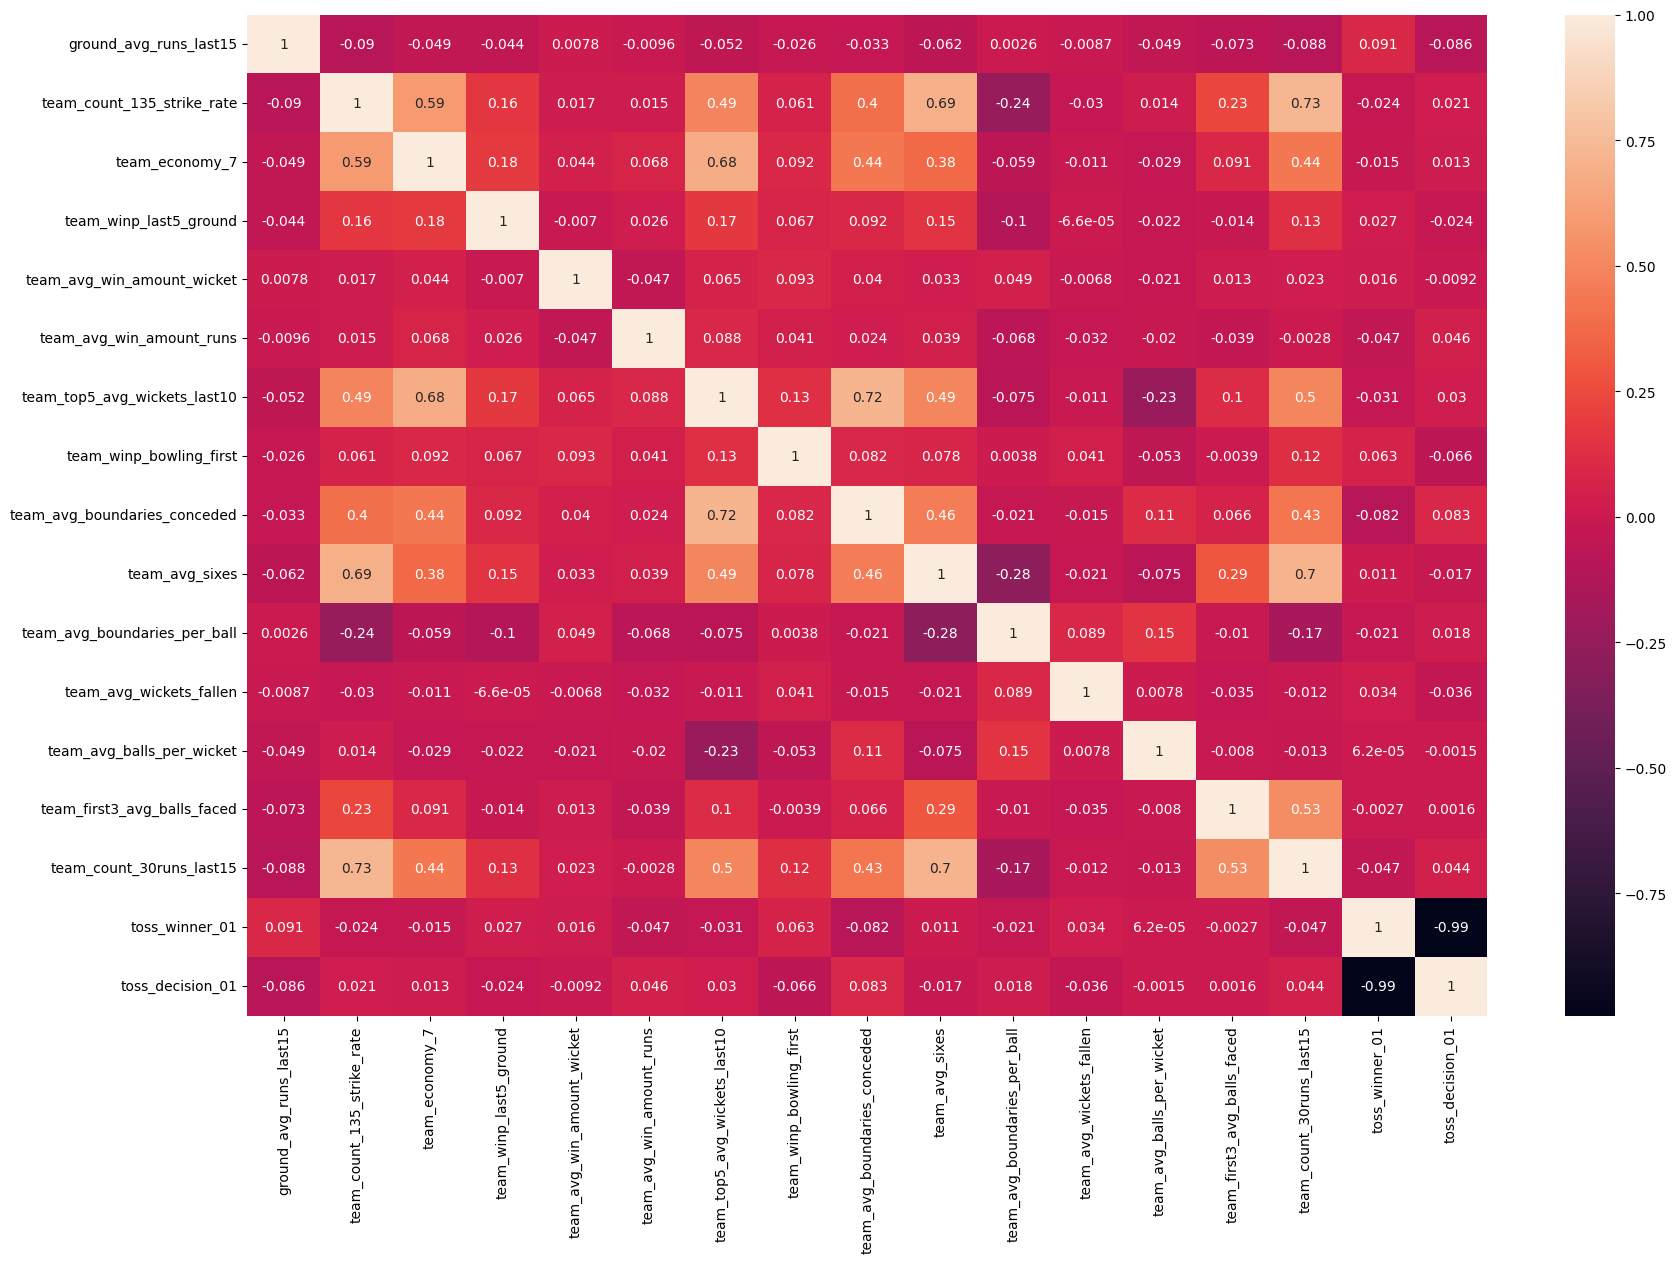

In [114]:
plt.figure(figsize=(20, 13))
sns.heatmap(X.corr(), annot= True)
plt.show()

In [115]:
#features to be removed due to high correlation, 1. team_top5_avg_runs_last10 

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
import catboost as cb
from sklearn.metrics import accuracy_score

In [235]:
params = {'depth': 4,
 'early_stopping_rounds': 5,
 'iterations': 100,
 'learning_rate': 0.05}

In [236]:
catboost = cb.CatBoostClassifier(** params)

In [237]:
catboost.fit(X_train, y_train)
y_pred_cat = catboost.predict(X_val)
y_pred_cat1 = catboost.predict(X_train)
print(accuracy_score(y_val, y_pred_cat))
print(accuracy_score(y_train, y_pred_cat1))

0:	learn: 0.6872508	total: 2.71ms	remaining: 268ms
1:	learn: 0.6825257	total: 5.56ms	remaining: 272ms
2:	learn: 0.6775246	total: 8.09ms	remaining: 262ms
3:	learn: 0.6735555	total: 10.3ms	remaining: 246ms
4:	learn: 0.6687963	total: 12.5ms	remaining: 237ms
5:	learn: 0.6661516	total: 14.8ms	remaining: 232ms
6:	learn: 0.6621561	total: 17.2ms	remaining: 228ms
7:	learn: 0.6581511	total: 19.2ms	remaining: 221ms
8:	learn: 0.6542210	total: 21.8ms	remaining: 221ms
9:	learn: 0.6505293	total: 24.1ms	remaining: 217ms
10:	learn: 0.6470715	total: 26.4ms	remaining: 213ms
11:	learn: 0.6443994	total: 28.6ms	remaining: 210ms
12:	learn: 0.6420181	total: 31ms	remaining: 207ms
13:	learn: 0.6388753	total: 33.4ms	remaining: 205ms
14:	learn: 0.6362439	total: 36.1ms	remaining: 205ms
15:	learn: 0.6338472	total: 38.4ms	remaining: 202ms
16:	learn: 0.6308073	total: 40.5ms	remaining: 198ms
17:	learn: 0.6285964	total: 42.6ms	remaining: 194ms
18:	learn: 0.6266881	total: 44.3ms	remaining: 189ms
19:	learn: 0.6241282	tot

In [238]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(catboost, X,y, cv= 5, scoring = 'accuracy'))

0:	learn: 0.6865012	total: 2.31ms	remaining: 229ms
1:	learn: 0.6814171	total: 4.5ms	remaining: 221ms
2:	learn: 0.6769104	total: 6.69ms	remaining: 216ms
3:	learn: 0.6713479	total: 8.77ms	remaining: 211ms
4:	learn: 0.6662461	total: 10.8ms	remaining: 206ms
5:	learn: 0.6610851	total: 13ms	remaining: 203ms
6:	learn: 0.6572768	total: 14.8ms	remaining: 196ms
7:	learn: 0.6533980	total: 17.1ms	remaining: 197ms
8:	learn: 0.6499649	total: 19ms	remaining: 193ms
9:	learn: 0.6472334	total: 21ms	remaining: 189ms
10:	learn: 0.6440339	total: 22.9ms	remaining: 185ms
11:	learn: 0.6413197	total: 25ms	remaining: 183ms
12:	learn: 0.6385219	total: 26.9ms	remaining: 180ms
13:	learn: 0.6358225	total: 29.1ms	remaining: 179ms
14:	learn: 0.6326306	total: 31.1ms	remaining: 176ms
15:	learn: 0.6300375	total: 33.3ms	remaining: 175ms
16:	learn: 0.6270206	total: 35.5ms	remaining: 173ms
17:	learn: 0.6241434	total: 37.4ms	remaining: 171ms
18:	learn: 0.6212553	total: 39.3ms	remaining: 167ms
19:	learn: 0.6187775	total: 41.

0.6582790309106098

Gradient Boosting

In [188]:
from sklearn.ensemble import GradientBoostingClassifier

In [229]:
# user-defined parameters

algo_name = 'GradientBoostingClassifier'
is_ensemble = 'no'
n_trees = 20
depth = 2
lr = 0.05

In [230]:
clf_gbm = GradientBoostingClassifier(n_estimators = n_trees, max_depth = depth, learning_rate = lr).fit(X_train,y_train)

In [231]:
from sklearn.metrics import classification_report

In [232]:
# Train accuracy
print(classification_report(y_val, clf_gbm.predict(X_val), labels=[0,1]))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        99
           1       0.65      0.59      0.62        91

    accuracy                           0.65       190
   macro avg       0.65      0.65      0.65       190
weighted avg       0.65      0.65      0.65       190



In [233]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, clf_gbm.predict(X_val)))
print(accuracy_score(y_train, clf_gbm.predict(X_train)))

0.6526315789473685
0.7031662269129287


XG boost

In [252]:
import xgboost as xgb

Tuning xg boost using optuna

In [194]:
import optuna

In [195]:
def objective(trial):
    param = {
        'objective': 'binary:logistic',               
        'verbosity': 0,                
        'booster': 'gbtree',           
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-3, 1.0, log=True)
    }

    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds = model.predict(X_val)
    accuracy = accuracy_score(y_val, preds)
    
    return accuracy  # or accuracy if you prefer    


In [196]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-06-23 23:08:29,816] A new study created in memory with name: no-name-d519a1eb-0896-415d-8150-07c2f7636d20
[I 2024-06-23 23:08:30,841] Trial 0 finished with value: 0.6526315789473685 and parameters: {'lambda': 0.3699072989750365, 'alpha': 0.0018362710496750863, 'colsample_bytree': 0.7700890646219487, 'subsample': 0.932743076601099, 'learning_rate': 0.08001851575285111, 'n_estimators': 572, 'max_depth': 11, 'min_child_weight': 5, 'gamma': 0.005020416185590755}. Best is trial 0 with value: 0.6526315789473685.
[I 2024-06-23 23:08:31,586] Trial 1 finished with value: 0.6842105263157895 and parameters: {'lambda': 7.171845917594508, 'alpha': 0.00869825053896962, 'colsample_bytree': 0.9093792408737609, 'subsample': 0.5828394358378863, 'learning_rate': 0.010285643547489074, 'n_estimators': 510, 'max_depth': 9, 'min_child_weight': 10, 'gamma': 0.00438964886996582}. Best is trial 1 with value: 0.6842105263157895.
[I 2024-06-23 23:08:33,095] Trial 2 finished with value: 0.6684210526315789 

In [197]:
# Print the best hyperparameters
trial = study.best_trial
print('Best trial:', trial)

Best trial: FrozenTrial(number=129, state=1, values=[0.7263157894736842], datetime_start=datetime.datetime(2024, 6, 23, 23, 11, 40, 314246), datetime_complete=datetime.datetime(2024, 6, 23, 23, 11, 41, 104694), params={'lambda': 0.019389005187387273, 'alpha': 0.068781320330697, 'colsample_bytree': 0.6150957978407239, 'subsample': 0.5001740633325487, 'learning_rate': 0.024303048431234774, 'n_estimators': 511, 'max_depth': 2, 'min_child_weight': 2, 'gamma': 0.004073454819399294}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lambda': FloatDistribution(high=10.0, log=True, low=0.001, step=None), 'alpha': FloatDistribution(high=10.0, log=True, low=0.001, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'learning_rate': FloatDistribution(high=0.1, log=True, low=0.001, step=None), 'n_estimators': IntDistribution(high=1000, log=False, low=200, step=1), 

In [198]:
best_params = trial.params

# Train the final model using the best hyperparameters
final_model_xgb = xgb.XGBClassifier(**best_params)
final_model_xgb.fit(X_train, y_train)

# Evaluate the final model on the validation set
final_preds = final_model_xgb.predict(X_val)
final_accuracy = accuracy_score(y_val, final_preds)

print(f'Final Model Accuracy: {final_accuracy}')

Final Model Accuracy: 0.7263157894736842


In [199]:
train_preds = final_model_xgb.predict(X_train)
accuracy_score(y_train, train_preds)

0.8179419525065963

In [200]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(xgb.XGBClassifier(**best_params), X,y, cv= 10, scoring = 'accuracy'))

0.6666965285554312

#Catboost

In [301]:
import catboost as cb
from catboost import CatBoostClassifier, Pool


In [307]:
from sklearn.model_selection import GridSearchCV

cb_param_grid = {
   'iterations': [100, 200, 300, 400],  # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate for boosting
    'depth': [2,3,4,5],  # Depth of trees
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization coefficient
    'subsample': [0.6, 0.8, 1.0]
}
catboost = cb.CatBoostClassifier(verbose=0)
catboost_grid = GridSearchCV(catboost, cb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
catboost_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002774F847AD0>,
             n_jobs=-1,
             param_grid={'depth': [2, 3, 4, 5],
                         'iterations': [100, 200, 300, 400],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [308]:
catboost_best = catboost_grid.best_estimator_

In [309]:
catboost_best.fit(X_train, y_train)
y_pred_cat = catboost_best.predict(X_val)
y_pred_cat1 = catboost_best.predict(X_train)
print(accuracy_score(y_val, y_pred_cat))
print(accuracy_score(y_train, y_pred_cat1))

0.6421052631578947
0.9973614775725593


In [310]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(catboost_best, X,y, cv= 5, scoring = 'accuracy'))

0.658256752993595

In [311]:
catboost_grid.best_params_

{'depth': 5,
 'iterations': 300,
 'l2_leaf_reg': 1,
 'learning_rate': 0.05,
 'subsample': 0.6}

Tuning catboost using optuna

In [218]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 50, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 2, 5),
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        "l2_leaf_reg": trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        "random_strength":trial.suggest_float("random_strength", 1e-2, 10, log=True),
        "early_stopping_rounds":trial.suggest_int("early_stopping_rounds", 1, 20)
        
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    return accuracy

In [219]:
study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(objective, n_trials=50)

[I 2024-06-23 23:25:08,621] A new study created in memory with name: no-name-d8f436f5-92ab-4fcf-bde9-fda7b2a973e2


0:	learn: 0.6908988	total: 5.49ms	remaining: 4.06s
1:	learn: 0.6886774	total: 10.8ms	remaining: 3.98s
2:	learn: 0.6865982	total: 15.9ms	remaining: 3.92s
3:	learn: 0.6849504	total: 20.9ms	remaining: 3.86s
4:	learn: 0.6823908	total: 25.8ms	remaining: 3.8s
5:	learn: 0.6797433	total: 30.7ms	remaining: 3.76s
6:	learn: 0.6776244	total: 35ms	remaining: 3.67s
7:	learn: 0.6744405	total: 39.9ms	remaining: 3.65s
8:	learn: 0.6726447	total: 44.3ms	remaining: 3.6s
9:	learn: 0.6714833	total: 48.9ms	remaining: 3.57s
10:	learn: 0.6703783	total: 53.4ms	remaining: 3.54s
11:	learn: 0.6695663	total: 57.8ms	remaining: 3.51s
12:	learn: 0.6682730	total: 61.9ms	remaining: 3.47s
13:	learn: 0.6658033	total: 66.3ms	remaining: 3.44s
14:	learn: 0.6645273	total: 70.8ms	remaining: 3.43s
15:	learn: 0.6636738	total: 74.9ms	remaining: 3.39s
16:	learn: 0.6618794	total: 78.9ms	remaining: 3.36s
17:	learn: 0.6608559	total: 83ms	remaining: 3.33s
18:	learn: 0.6591729	total: 87.3ms	remaining: 3.32s
19:	learn: 0.6570263	total: 

[I 2024-06-23 23:25:10,297] Trial 0 finished with value: 0.6894736842105263 and parameters: {'iterations': 741, 'learning_rate': 0.014935220719227515, 'depth': 5, 'subsample': 0.5450484450519035, 'l2_leaf_reg': 0.009050950151673638, 'random_strength': 4.506082850645211, 'early_stopping_rounds': 5}. Best is trial 0 with value: 0.6894736842105263.


679:	learn: 0.2567229	total: 1.4s	remaining: 126ms
680:	learn: 0.2564759	total: 1.41s	remaining: 124ms
681:	learn: 0.2560729	total: 1.41s	remaining: 122ms
682:	learn: 0.2557726	total: 1.41s	remaining: 120ms
683:	learn: 0.2550616	total: 1.41s	remaining: 118ms
684:	learn: 0.2546868	total: 1.41s	remaining: 116ms
685:	learn: 0.2542016	total: 1.42s	remaining: 114ms
686:	learn: 0.2536220	total: 1.42s	remaining: 112ms
687:	learn: 0.2533512	total: 1.42s	remaining: 109ms
688:	learn: 0.2528666	total: 1.42s	remaining: 107ms
689:	learn: 0.2525470	total: 1.42s	remaining: 105ms
690:	learn: 0.2520491	total: 1.43s	remaining: 103ms
691:	learn: 0.2513628	total: 1.43s	remaining: 101ms
692:	learn: 0.2508087	total: 1.43s	remaining: 99.1ms
693:	learn: 0.2503743	total: 1.43s	remaining: 97ms
694:	learn: 0.2498390	total: 1.43s	remaining: 94.9ms
695:	learn: 0.2493558	total: 1.44s	remaining: 92.9ms
696:	learn: 0.2487684	total: 1.44s	remaining: 90.8ms
697:	learn: 0.2484811	total: 1.44s	remaining: 88.7ms
698:	lear

[I 2024-06-23 23:25:12,770] Trial 1 finished with value: 0.6578947368421053 and parameters: {'iterations': 858, 'learning_rate': 0.0010655844103310867, 'depth': 6, 'subsample': 0.4703879977144462, 'l2_leaf_reg': 0.3730661013317639, 'random_strength': 0.6993219849170018, 'early_stopping_rounds': 14}. Best is trial 0 with value: 0.6894736842105263.


829:	learn: 0.5402670	total: 2.22s	remaining: 74.8ms
830:	learn: 0.5400797	total: 2.22s	remaining: 72.1ms
831:	learn: 0.5399736	total: 2.22s	remaining: 69.4ms
832:	learn: 0.5398285	total: 2.22s	remaining: 66.8ms
833:	learn: 0.5396654	total: 2.23s	remaining: 64.1ms
834:	learn: 0.5395357	total: 2.23s	remaining: 61.4ms
835:	learn: 0.5394129	total: 2.23s	remaining: 58.8ms
836:	learn: 0.5392601	total: 2.23s	remaining: 56.1ms
837:	learn: 0.5391543	total: 2.24s	remaining: 53.4ms
838:	learn: 0.5390118	total: 2.24s	remaining: 50.8ms
839:	learn: 0.5389188	total: 2.24s	remaining: 48.1ms
840:	learn: 0.5387615	total: 2.25s	remaining: 45.4ms
841:	learn: 0.5386637	total: 2.25s	remaining: 42.7ms
842:	learn: 0.5384929	total: 2.25s	remaining: 40.1ms
843:	learn: 0.5383748	total: 2.25s	remaining: 37.4ms
844:	learn: 0.5382671	total: 2.26s	remaining: 34.7ms
845:	learn: 0.5381599	total: 2.26s	remaining: 32.1ms
846:	learn: 0.5380544	total: 2.26s	remaining: 29.4ms
847:	learn: 0.5379488	total: 2.27s	remaining: 

[I 2024-06-23 23:25:14,052] Trial 2 finished with value: 0.6736842105263158 and parameters: {'iterations': 901, 'learning_rate': 0.05728371997382098, 'depth': 3, 'subsample': 0.6818524385180391, 'l2_leaf_reg': 0.7287487579373894, 'random_strength': 3.4798251718196482, 'early_stopping_rounds': 10}. Best is trial 0 with value: 0.6894736842105263.


814:	learn: 0.1762538	total: 1.04s	remaining: 109ms
815:	learn: 0.1759336	total: 1.04s	remaining: 108ms
816:	learn: 0.1756102	total: 1.04s	remaining: 107ms
817:	learn: 0.1752662	total: 1.04s	remaining: 106ms
818:	learn: 0.1750127	total: 1.04s	remaining: 104ms
819:	learn: 0.1747235	total: 1.04s	remaining: 103ms
820:	learn: 0.1745081	total: 1.04s	remaining: 102ms
821:	learn: 0.1743151	total: 1.04s	remaining: 100ms
822:	learn: 0.1740285	total: 1.05s	remaining: 99.2ms
823:	learn: 0.1738862	total: 1.05s	remaining: 97.9ms
824:	learn: 0.1736065	total: 1.05s	remaining: 96.7ms
825:	learn: 0.1735040	total: 1.05s	remaining: 95.4ms
826:	learn: 0.1733252	total: 1.05s	remaining: 94.1ms
827:	learn: 0.1731451	total: 1.05s	remaining: 92.8ms
828:	learn: 0.1728857	total: 1.05s	remaining: 91.6ms
829:	learn: 0.1725758	total: 1.05s	remaining: 90.3ms
830:	learn: 0.1723991	total: 1.06s	remaining: 89ms
831:	learn: 0.1720825	total: 1.06s	remaining: 87.8ms
832:	learn: 0.1719150	total: 1.06s	remaining: 86.5ms
833

[I 2024-06-23 23:25:16,484] Trial 3 finished with value: 0.631578947368421 and parameters: {'iterations': 338, 'learning_rate': 0.008065812083720167, 'depth': 8, 'subsample': 0.8312531944513977, 'l2_leaf_reg': 0.001425113865171204, 'random_strength': 1.2102989838960998, 'early_stopping_rounds': 5}. Best is trial 0 with value: 0.6894736842105263.


334:	learn: 0.0849593	total: 2.29s	remaining: 20.5ms
335:	learn: 0.0840461	total: 2.3s	remaining: 13.7ms
336:	learn: 0.0837838	total: 2.3s	remaining: 6.84ms
337:	learn: 0.0834176	total: 2.31s	remaining: 0us
0:	learn: 0.6862985	total: 2.38ms	remaining: 1.05s
1:	learn: 0.6804320	total: 4.95ms	remaining: 1.09s
2:	learn: 0.6742650	total: 7.51ms	remaining: 1.1s
3:	learn: 0.6678545	total: 10.3ms	remaining: 1.13s
4:	learn: 0.6624831	total: 12.9ms	remaining: 1.13s
5:	learn: 0.6597553	total: 15.7ms	remaining: 1.14s
6:	learn: 0.6553507	total: 18.6ms	remaining: 1.16s
7:	learn: 0.6522622	total: 21.2ms	remaining: 1.15s
8:	learn: 0.6494503	total: 23.3ms	remaining: 1.12s
9:	learn: 0.6467788	total: 25.9ms	remaining: 1.12s
10:	learn: 0.6442864	total: 28.5ms	remaining: 1.11s
11:	learn: 0.6399769	total: 30.8ms	remaining: 1.1s
12:	learn: 0.6367891	total: 33.4ms	remaining: 1.1s
13:	learn: 0.6341242	total: 36.1ms	remaining: 1.1s
14:	learn: 0.6319704	total: 38.7ms	remaining: 1.1s
15:	learn: 0.6269795	total: 

[I 2024-06-23 23:25:17,128] Trial 4 finished with value: 0.6736842105263158 and parameters: {'iterations': 442, 'learning_rate': 0.04964035551836407, 'depth': 3, 'subsample': 0.31099404078773757, 'l2_leaf_reg': 0.0013294232936300234, 'random_strength': 0.2564324629948878, 'early_stopping_rounds': 6}. Best is trial 0 with value: 0.6894736842105263.


409:	learn: 0.3684520	total: 522ms	remaining: 40.7ms
410:	learn: 0.3681545	total: 523ms	remaining: 39.5ms
411:	learn: 0.3675351	total: 525ms	remaining: 38.2ms
412:	learn: 0.3672577	total: 526ms	remaining: 36.9ms
413:	learn: 0.3669142	total: 527ms	remaining: 35.6ms
414:	learn: 0.3664029	total: 528ms	remaining: 34.4ms
415:	learn: 0.3659583	total: 529ms	remaining: 33.1ms
416:	learn: 0.3657281	total: 530ms	remaining: 31.8ms
417:	learn: 0.3654166	total: 532ms	remaining: 30.5ms
418:	learn: 0.3653048	total: 533ms	remaining: 29.2ms
419:	learn: 0.3646037	total: 534ms	remaining: 28ms
420:	learn: 0.3642865	total: 535ms	remaining: 26.7ms
421:	learn: 0.3642140	total: 536ms	remaining: 25.4ms
422:	learn: 0.3638691	total: 538ms	remaining: 24.2ms
423:	learn: 0.3637319	total: 539ms	remaining: 22.9ms
424:	learn: 0.3633104	total: 540ms	remaining: 21.6ms
425:	learn: 0.3629315	total: 541ms	remaining: 20.3ms
426:	learn: 0.3621730	total: 543ms	remaining: 19.1ms
427:	learn: 0.3616579	total: 544ms	remaining: 17

[I 2024-06-23 23:25:18,463] Trial 5 finished with value: 0.6631578947368421 and parameters: {'iterations': 968, 'learning_rate': 0.02028796278546808, 'depth': 3, 'subsample': 0.7797721640906781, 'l2_leaf_reg': 0.001464368523480038, 'random_strength': 0.15800056328429057, 'early_stopping_rounds': 12}. Best is trial 0 with value: 0.6894736842105263.


878:	learn: 0.2851924	total: 1.1s	remaining: 111ms
879:	learn: 0.2850731	total: 1.1s	remaining: 110ms
880:	learn: 0.2849480	total: 1.1s	remaining: 109ms
881:	learn: 0.2847345	total: 1.1s	remaining: 108ms
882:	learn: 0.2844911	total: 1.1s	remaining: 106ms
883:	learn: 0.2844021	total: 1.1s	remaining: 105ms
884:	learn: 0.2842526	total: 1.11s	remaining: 104ms
885:	learn: 0.2840144	total: 1.11s	remaining: 103ms
886:	learn: 0.2838353	total: 1.11s	remaining: 101ms
887:	learn: 0.2835542	total: 1.11s	remaining: 100ms
888:	learn: 0.2834491	total: 1.11s	remaining: 98.8ms
889:	learn: 0.2832208	total: 1.11s	remaining: 97.6ms
890:	learn: 0.2829910	total: 1.11s	remaining: 96.3ms
891:	learn: 0.2828492	total: 1.11s	remaining: 95.1ms
892:	learn: 0.2826791	total: 1.12s	remaining: 93.8ms
893:	learn: 0.2825058	total: 1.12s	remaining: 92.6ms
894:	learn: 0.2823610	total: 1.12s	remaining: 91.3ms
895:	learn: 0.2820588	total: 1.12s	remaining: 90ms
896:	learn: 0.2814575	total: 1.12s	remaining: 88.8ms
897:	learn:

[I 2024-06-23 23:25:19,516] Trial 6 finished with value: 0.7157894736842105 and parameters: {'iterations': 832, 'learning_rate': 0.01413985358004517, 'depth': 2, 'subsample': 0.5023995053004613, 'l2_leaf_reg': 0.9212806048051366, 'random_strength': 2.2762708148482225, 'early_stopping_rounds': 1}. Best is trial 6 with value: 0.7157894736842105.


746:	learn: 0.5393618	total: 805ms	remaining: 91.6ms
747:	learn: 0.5392860	total: 806ms	remaining: 90.5ms
748:	learn: 0.5391604	total: 807ms	remaining: 89.5ms
749:	learn: 0.5391074	total: 808ms	remaining: 88.4ms
750:	learn: 0.5389936	total: 809ms	remaining: 87.3ms
751:	learn: 0.5389025	total: 811ms	remaining: 86.2ms
752:	learn: 0.5387820	total: 812ms	remaining: 85.2ms
753:	learn: 0.5386483	total: 813ms	remaining: 84.1ms
754:	learn: 0.5384693	total: 814ms	remaining: 83ms
755:	learn: 0.5384154	total: 815ms	remaining: 82ms
756:	learn: 0.5382748	total: 817ms	remaining: 80.9ms
757:	learn: 0.5381676	total: 818ms	remaining: 79.8ms
758:	learn: 0.5381023	total: 819ms	remaining: 78.8ms
759:	learn: 0.5379408	total: 820ms	remaining: 77.7ms
760:	learn: 0.5378542	total: 821ms	remaining: 76.6ms
761:	learn: 0.5378218	total: 822ms	remaining: 75.5ms
762:	learn: 0.5377932	total: 824ms	remaining: 74.5ms
763:	learn: 0.5377390	total: 825ms	remaining: 73.4ms
764:	learn: 0.5375355	total: 826ms	remaining: 72.3

[I 2024-06-23 23:25:22,900] Trial 7 finished with value: 0.6684210526315789 and parameters: {'iterations': 705, 'learning_rate': 0.00514816904212122, 'depth': 4, 'subsample': 0.9893446957910663, 'l2_leaf_reg': 0.012097994619283986, 'random_strength': 0.26090229663715514, 'early_stopping_rounds': 7}. Best is trial 6 with value: 0.7157894736842105.


683:	learn: 0.4234265	total: 3s	remaining: 92.2ms
684:	learn: 0.4232588	total: 3.01s	remaining: 87.8ms
685:	learn: 0.4229440	total: 3.01s	remaining: 83.4ms
686:	learn: 0.4226763	total: 3.02s	remaining: 79ms
687:	learn: 0.4224267	total: 3.02s	remaining: 74.7ms
688:	learn: 0.4221825	total: 3.02s	remaining: 70.3ms
689:	learn: 0.4218397	total: 3.03s	remaining: 65.9ms
690:	learn: 0.4216314	total: 3.03s	remaining: 61.5ms
691:	learn: 0.4213201	total: 3.04s	remaining: 57.1ms
692:	learn: 0.4211372	total: 3.04s	remaining: 52.7ms
693:	learn: 0.4209136	total: 3.04s	remaining: 48.3ms
694:	learn: 0.4207528	total: 3.05s	remaining: 43.9ms
695:	learn: 0.4205620	total: 3.05s	remaining: 39.5ms
696:	learn: 0.4203294	total: 3.06s	remaining: 35.1ms
697:	learn: 0.4201683	total: 3.06s	remaining: 30.7ms
698:	learn: 0.4200214	total: 3.06s	remaining: 26.3ms
699:	learn: 0.4197092	total: 3.07s	remaining: 21.9ms
700:	learn: 0.4195713	total: 3.07s	remaining: 17.5ms
701:	learn: 0.4193036	total: 3.08s	remaining: 13.2m

[I 2024-06-23 23:25:27,191] Trial 8 finished with value: 0.6368421052631579 and parameters: {'iterations': 287, 'learning_rate': 0.0234810939154183, 'depth': 8, 'subsample': 0.21924280409649546, 'l2_leaf_reg': 0.2751140738809695, 'random_strength': 3.8054572627181638, 'early_stopping_rounds': 14}. Best is trial 6 with value: 0.7157894736842105.


0:	learn: 0.6921300	total: 3.78ms	remaining: 1.84s
1:	learn: 0.6913388	total: 7.51ms	remaining: 1.83s
2:	learn: 0.6902866	total: 11.3ms	remaining: 1.83s
3:	learn: 0.6894375	total: 15.1ms	remaining: 1.83s
4:	learn: 0.6882072	total: 20ms	remaining: 1.94s
5:	learn: 0.6872403	total: 24.1ms	remaining: 1.94s
6:	learn: 0.6863768	total: 27.8ms	remaining: 1.91s
7:	learn: 0.6855023	total: 31.6ms	remaining: 1.9s
8:	learn: 0.6848126	total: 35.6ms	remaining: 1.9s
9:	learn: 0.6828806	total: 39.5ms	remaining: 1.89s
10:	learn: 0.6823769	total: 43.5ms	remaining: 1.89s
11:	learn: 0.6815470	total: 47.5ms	remaining: 1.89s
12:	learn: 0.6808843	total: 51.1ms	remaining: 1.87s
13:	learn: 0.6804511	total: 54.3ms	remaining: 1.84s
14:	learn: 0.6797749	total: 58.2ms	remaining: 1.84s
15:	learn: 0.6791536	total: 61.6ms	remaining: 1.82s
16:	learn: 0.6783914	total: 64.8ms	remaining: 1.8s
17:	learn: 0.6778038	total: 67.8ms	remaining: 1.77s
18:	learn: 0.6771648	total: 70.1ms	remaining: 1.73s
19:	learn: 0.6757901	total:

[I 2024-06-23 23:25:28,843] Trial 9 finished with value: 0.6736842105263158 and parameters: {'iterations': 489, 'learning_rate': 0.008025082319493343, 'depth': 4, 'subsample': 0.20807726937090987, 'l2_leaf_reg': 0.0049201804445868315, 'random_strength': 5.4463962515447495, 'early_stopping_rounds': 10}. Best is trial 6 with value: 0.7157894736842105.


440:	learn: 0.5357739	total: 1.35s	remaining: 148ms
441:	learn: 0.5356175	total: 1.36s	remaining: 144ms
442:	learn: 0.5353312	total: 1.36s	remaining: 141ms
443:	learn: 0.5352370	total: 1.36s	remaining: 138ms
444:	learn: 0.5349398	total: 1.37s	remaining: 135ms
445:	learn: 0.5346017	total: 1.37s	remaining: 132ms
446:	learn: 0.5344362	total: 1.37s	remaining: 129ms
447:	learn: 0.5343838	total: 1.37s	remaining: 126ms
448:	learn: 0.5342601	total: 1.38s	remaining: 123ms
449:	learn: 0.5341231	total: 1.38s	remaining: 120ms
450:	learn: 0.5339240	total: 1.38s	remaining: 116ms
451:	learn: 0.5336625	total: 1.38s	remaining: 113ms
452:	learn: 0.5335710	total: 1.39s	remaining: 110ms
453:	learn: 0.5333884	total: 1.39s	remaining: 107ms
454:	learn: 0.5332532	total: 1.39s	remaining: 104ms
455:	learn: 0.5329905	total: 1.4s	remaining: 101ms
456:	learn: 0.5328619	total: 1.4s	remaining: 97.9ms
457:	learn: 0.5327486	total: 1.4s	remaining: 94.8ms
458:	learn: 0.5326647	total: 1.4s	remaining: 91.8ms
459:	learn: 0

[I 2024-06-23 23:26:02,070] Trial 10 finished with value: 0.6421052631578947 and parameters: {'iterations': 609, 'learning_rate': 0.002449081069392614, 'depth': 10, 'subsample': 0.40321938767190635, 'l2_leaf_reg': 7.1741178889142825, 'random_strength': 0.03844492561062701, 'early_stopping_rounds': 1}. Best is trial 6 with value: 0.7157894736842105.


0:	learn: 0.6875168	total: 4.87ms	remaining: 3.75s
1:	learn: 0.6822514	total: 9.21ms	remaining: 3.55s
2:	learn: 0.6800991	total: 13.6ms	remaining: 3.5s
3:	learn: 0.6754901	total: 18ms	remaining: 3.45s
4:	learn: 0.6715353	total: 22.2ms	remaining: 3.4s
5:	learn: 0.6700094	total: 26.9ms	remaining: 3.44s
6:	learn: 0.6672264	total: 31.5ms	remaining: 3.45s
7:	learn: 0.6634738	total: 36ms	remaining: 3.44s
8:	learn: 0.6610178	total: 40.5ms	remaining: 3.43s
9:	learn: 0.6588044	total: 45.1ms	remaining: 3.44s
10:	learn: 0.6560979	total: 49.7ms	remaining: 3.44s
11:	learn: 0.6522616	total: 54.1ms	remaining: 3.42s
12:	learn: 0.6494732	total: 58.5ms	remaining: 3.42s
13:	learn: 0.6457657	total: 62.6ms	remaining: 3.39s
14:	learn: 0.6425165	total: 66.8ms	remaining: 3.37s
15:	learn: 0.6394000	total: 70.8ms	remaining: 3.34s
16:	learn: 0.6372470	total: 76.3ms	remaining: 3.39s
17:	learn: 0.6337401	total: 80.2ms	remaining: 3.36s
18:	learn: 0.6311110	total: 84.4ms	remaining: 3.35s
19:	learn: 0.6266729	total: 

[I 2024-06-23 23:26:05,855] Trial 11 finished with value: 0.6526315789473685 and parameters: {'iterations': 772, 'learning_rate': 0.021508188831304762, 'depth': 6, 'subsample': 0.5500404901336772, 'l2_leaf_reg': 0.046420202949227315, 'random_strength': 8.668374138083754, 'early_stopping_rounds': 1}. Best is trial 6 with value: 0.7157894736842105.


750:	learn: 0.0621131	total: 3.42s	remaining: 95.8ms
751:	learn: 0.0620032	total: 3.43s	remaining: 91.2ms
752:	learn: 0.0618385	total: 3.43s	remaining: 86.7ms
753:	learn: 0.0616862	total: 3.44s	remaining: 82.1ms
754:	learn: 0.0615193	total: 3.44s	remaining: 77.5ms
755:	learn: 0.0613412	total: 3.45s	remaining: 73ms
756:	learn: 0.0611649	total: 3.45s	remaining: 68.4ms
757:	learn: 0.0609364	total: 3.46s	remaining: 63.8ms
758:	learn: 0.0606535	total: 3.46s	remaining: 59.3ms
759:	learn: 0.0603799	total: 3.46s	remaining: 54.7ms
760:	learn: 0.0601393	total: 3.47s	remaining: 50.1ms
761:	learn: 0.0600793	total: 3.47s	remaining: 45.6ms
762:	learn: 0.0599393	total: 3.48s	remaining: 41ms
763:	learn: 0.0597174	total: 3.48s	remaining: 36.5ms
764:	learn: 0.0595574	total: 3.49s	remaining: 31.9ms
765:	learn: 0.0591890	total: 3.49s	remaining: 27.4ms
766:	learn: 0.0589050	total: 3.5s	remaining: 22.8ms
767:	learn: 0.0586479	total: 3.5s	remaining: 18.2ms
768:	learn: 0.0583561	total: 3.51s	remaining: 13.7ms

[I 2024-06-23 23:26:07,356] Trial 12 finished with value: 0.7157894736842105 and parameters: {'iterations': 719, 'learning_rate': 0.01527104423981093, 'depth': 2, 'subsample': 0.5851934203058791, 'l2_leaf_reg': 2.709958153950708, 'random_strength': 1.4034729432339537, 'early_stopping_rounds': 20}. Best is trial 6 with value: 0.7157894736842105.


649:	learn: 0.5320790	total: 1.17s	remaining: 124ms
650:	learn: 0.5319317	total: 1.17s	remaining: 122ms
651:	learn: 0.5317377	total: 1.17s	remaining: 120ms
652:	learn: 0.5314171	total: 1.17s	remaining: 119ms
653:	learn: 0.5313172	total: 1.18s	remaining: 117ms
654:	learn: 0.5312621	total: 1.18s	remaining: 115ms
655:	learn: 0.5310449	total: 1.18s	remaining: 113ms
656:	learn: 0.5309166	total: 1.18s	remaining: 112ms
657:	learn: 0.5307582	total: 1.18s	remaining: 110ms
658:	learn: 0.5306438	total: 1.19s	remaining: 108ms
659:	learn: 0.5305573	total: 1.19s	remaining: 106ms
660:	learn: 0.5304014	total: 1.19s	remaining: 104ms
661:	learn: 0.5303805	total: 1.19s	remaining: 103ms
662:	learn: 0.5303128	total: 1.19s	remaining: 101ms
663:	learn: 0.5302058	total: 1.2s	remaining: 99.1ms
664:	learn: 0.5300635	total: 1.2s	remaining: 97.3ms
665:	learn: 0.5299144	total: 1.2s	remaining: 95.5ms
666:	learn: 0.5297108	total: 1.2s	remaining: 93.7ms
667:	learn: 0.5295302	total: 1.2s	remaining: 91.9ms
668:	learn: 

[I 2024-06-23 23:26:08,989] Trial 13 finished with value: 0.6789473684210526 and parameters: {'iterations': 817, 'learning_rate': 0.0032938755126035103, 'depth': 2, 'subsample': 0.6511154096343179, 'l2_leaf_reg': 4.336544392501494, 'random_strength': 1.1570745358005023, 'early_stopping_rounds': 19}. Best is trial 6 with value: 0.7157894736842105.


798:	learn: 0.5992136	total: 1.36s	remaining: 30.7ms
799:	learn: 0.5991844	total: 1.37s	remaining: 29ms
800:	learn: 0.5991242	total: 1.37s	remaining: 27.3ms
801:	learn: 0.5990937	total: 1.37s	remaining: 25.6ms
802:	learn: 0.5990497	total: 1.37s	remaining: 23.9ms
803:	learn: 0.5989841	total: 1.37s	remaining: 22.2ms
804:	learn: 0.5989188	total: 1.37s	remaining: 20.5ms
805:	learn: 0.5988638	total: 1.38s	remaining: 18.8ms
806:	learn: 0.5988181	total: 1.38s	remaining: 17.1ms
807:	learn: 0.5987585	total: 1.38s	remaining: 15.4ms
808:	learn: 0.5986905	total: 1.38s	remaining: 13.7ms
809:	learn: 0.5986204	total: 1.38s	remaining: 11.9ms
810:	learn: 0.5985515	total: 1.38s	remaining: 10.2ms
811:	learn: 0.5985097	total: 1.38s	remaining: 8.53ms
812:	learn: 0.5984532	total: 1.39s	remaining: 6.82ms
813:	learn: 0.5984269	total: 1.39s	remaining: 5.12ms
814:	learn: 0.5983887	total: 1.39s	remaining: 3.41ms
815:	learn: 0.5983290	total: 1.39s	remaining: 1.7ms
816:	learn: 0.5982619	total: 1.39s	remaining: 0us

[I 2024-06-23 23:26:10,649] Trial 14 finished with value: 0.7 and parameters: {'iterations': 650, 'learning_rate': 0.09419556631286546, 'depth': 2, 'subsample': 0.39888044903839776, 'l2_leaf_reg': 1.647383210017989, 'random_strength': 1.6436849708629198, 'early_stopping_rounds': 20}. Best is trial 6 with value: 0.7157894736842105.


642:	learn: 0.3530342	total: 1.39s	remaining: 15.1ms
643:	learn: 0.3528247	total: 1.39s	remaining: 12.9ms
644:	learn: 0.3526923	total: 1.39s	remaining: 10.8ms
645:	learn: 0.3525452	total: 1.4s	remaining: 8.64ms
646:	learn: 0.3516899	total: 1.4s	remaining: 6.48ms
647:	learn: 0.3514603	total: 1.4s	remaining: 4.33ms
648:	learn: 0.3511382	total: 1.4s	remaining: 2.16ms
649:	learn: 0.3507212	total: 1.41s	remaining: 0us
0:	learn: 0.6878533	total: 3.22ms	remaining: 1.7s
1:	learn: 0.6833804	total: 6.54ms	remaining: 1.72s
2:	learn: 0.6786558	total: 9.2ms	remaining: 1.61s
3:	learn: 0.6745578	total: 12.2ms	remaining: 1.6s
4:	learn: 0.6705545	total: 14.8ms	remaining: 1.55s
5:	learn: 0.6668105	total: 17.7ms	remaining: 1.54s
6:	learn: 0.6630912	total: 20.5ms	remaining: 1.53s
7:	learn: 0.6598033	total: 23.5ms	remaining: 1.53s
8:	learn: 0.6572928	total: 26.4ms	remaining: 1.52s
9:	learn: 0.6550368	total: 29.3ms	remaining: 1.52s
10:	learn: 0.6526764	total: 32ms	remaining: 1.51s
11:	learn: 0.6502167	total

[I 2024-06-23 23:26:12,237] Trial 15 finished with value: 0.7263157894736842 and parameters: {'iterations': 529, 'learning_rate': 0.03759688293948012, 'depth': 2, 'subsample': 0.7459843722579319, 'l2_leaf_reg': 1.937864674406293, 'random_strength': 0.060166971811574585, 'early_stopping_rounds': 17}. Best is trial 15 with value: 0.7263157894736842.


476:	learn: 0.4382396	total: 1.19s	remaining: 130ms
477:	learn: 0.4380249	total: 1.2s	remaining: 128ms
478:	learn: 0.4377198	total: 1.2s	remaining: 125ms
479:	learn: 0.4376208	total: 1.2s	remaining: 123ms
480:	learn: 0.4373393	total: 1.2s	remaining: 120ms
481:	learn: 0.4370555	total: 1.2s	remaining: 117ms
482:	learn: 0.4369922	total: 1.21s	remaining: 115ms
483:	learn: 0.4368959	total: 1.21s	remaining: 112ms
484:	learn: 0.4368626	total: 1.21s	remaining: 110ms
485:	learn: 0.4365115	total: 1.21s	remaining: 107ms
486:	learn: 0.4362423	total: 1.22s	remaining: 105ms
487:	learn: 0.4361158	total: 1.22s	remaining: 102ms
488:	learn: 0.4358606	total: 1.22s	remaining: 99.8ms
489:	learn: 0.4356510	total: 1.22s	remaining: 97.3ms
490:	learn: 0.4354477	total: 1.22s	remaining: 94.8ms
491:	learn: 0.4353873	total: 1.23s	remaining: 92.3ms
492:	learn: 0.4351200	total: 1.23s	remaining: 89.8ms
493:	learn: 0.4347502	total: 1.23s	remaining: 87.2ms
494:	learn: 0.4346254	total: 1.23s	remaining: 84.7ms
495:	learn

[I 2024-06-23 23:26:14,453] Trial 16 finished with value: 0.6578947368421053 and parameters: {'iterations': 506, 'learning_rate': 0.03677969228077428, 'depth': 4, 'subsample': 0.7775928124490162, 'l2_leaf_reg': 0.07460330770287267, 'random_strength': 0.010021948883160579, 'early_stopping_rounds': 15}. Best is trial 15 with value: 0.7263157894736842.


0:	learn: 0.6430511	total: 15.7ms	remaining: 6.21s
1:	learn: 0.6059223	total: 29.9ms	remaining: 5.91s
2:	learn: 0.5729958	total: 44.2ms	remaining: 5.8s
3:	learn: 0.5397577	total: 58.8ms	remaining: 5.78s
4:	learn: 0.5140169	total: 72.7ms	remaining: 5.7s
5:	learn: 0.4852258	total: 87.4ms	remaining: 5.7s
6:	learn: 0.4650314	total: 101ms	remaining: 5.65s
7:	learn: 0.4454783	total: 115ms	remaining: 5.61s
8:	learn: 0.4312503	total: 129ms	remaining: 5.58s
9:	learn: 0.4144808	total: 143ms	remaining: 5.53s
10:	learn: 0.3970061	total: 156ms	remaining: 5.47s
11:	learn: 0.3844467	total: 169ms	remaining: 5.43s
12:	learn: 0.3690406	total: 183ms	remaining: 5.41s
13:	learn: 0.3572198	total: 196ms	remaining: 5.37s
14:	learn: 0.3481358	total: 210ms	remaining: 5.36s
15:	learn: 0.3373497	total: 224ms	remaining: 5.32s
16:	learn: 0.3290054	total: 237ms	remaining: 5.29s
17:	learn: 0.3214225	total: 249ms	remaining: 5.25s
18:	learn: 0.3083592	total: 262ms	remaining: 5.22s
19:	learn: 0.2953557	total: 275ms	rema

[I 2024-06-23 23:26:19,908] Trial 17 finished with value: 0.6263157894736842 and parameters: {'iterations': 397, 'learning_rate': 0.08780301792594361, 'depth': 8, 'subsample': 0.9513715137392641, 'l2_leaf_reg': 1.2861658057117011, 'random_strength': 0.0691810869166317, 'early_stopping_rounds': 16}. Best is trial 15 with value: 0.7263157894736842.


395:	learn: 0.0048567	total: 5.17s	remaining: 13ms
396:	learn: 0.0048384	total: 5.18s	remaining: 0us
0:	learn: 0.6840691	total: 4.99ms	remaining: 2.84s
1:	learn: 0.6761391	total: 9.34ms	remaining: 2.65s
2:	learn: 0.6697436	total: 13.5ms	remaining: 2.56s
3:	learn: 0.6618575	total: 18.4ms	remaining: 2.6s
4:	learn: 0.6539736	total: 23.3ms	remaining: 2.64s
5:	learn: 0.6468085	total: 28ms	remaining: 2.63s
6:	learn: 0.6401806	total: 32.6ms	remaining: 2.62s
7:	learn: 0.6344963	total: 38.5ms	remaining: 2.7s
8:	learn: 0.6278657	total: 43.2ms	remaining: 2.69s
9:	learn: 0.6218120	total: 48ms	remaining: 2.69s
10:	learn: 0.6171644	total: 52.2ms	remaining: 2.65s
11:	learn: 0.6106876	total: 56.3ms	remaining: 2.62s
12:	learn: 0.6048301	total: 60ms	remaining: 2.57s
13:	learn: 0.5994980	total: 63.7ms	remaining: 2.53s
14:	learn: 0.5925487	total: 67.5ms	remaining: 2.5s
15:	learn: 0.5880155	total: 71.3ms	remaining: 2.47s
16:	learn: 0.5833995	total: 75ms	remaining: 2.44s
17:	learn: 0.5788533	total: 79.1ms	r

[I 2024-06-23 23:26:22,530] Trial 18 finished with value: 0.6578947368421053 and parameters: {'iterations': 570, 'learning_rate': 0.03490573039282807, 'depth': 5, 'subsample': 0.6918792200443701, 'l2_leaf_reg': 0.2140793767791912, 'random_strength': 0.04233569930221956, 'early_stopping_rounds': 17}. Best is trial 15 with value: 0.7263157894736842.


0:	learn: 0.6914184	total: 2.99ms	remaining: 2.75s
1:	learn: 0.6898382	total: 6.15ms	remaining: 2.82s
2:	learn: 0.6883482	total: 8.86ms	remaining: 2.71s
3:	learn: 0.6867283	total: 11.4ms	remaining: 2.62s
4:	learn: 0.6851283	total: 14.2ms	remaining: 2.59s
5:	learn: 0.6836671	total: 17.1ms	remaining: 2.6s
6:	learn: 0.6822298	total: 19.8ms	remaining: 2.59s
7:	learn: 0.6807680	total: 22.8ms	remaining: 2.6s
8:	learn: 0.6792989	total: 25.7ms	remaining: 2.6s
9:	learn: 0.6779095	total: 28.4ms	remaining: 2.59s
10:	learn: 0.6765139	total: 31.2ms	remaining: 2.58s
11:	learn: 0.6752283	total: 34ms	remaining: 2.58s
12:	learn: 0.6739252	total: 36.8ms	remaining: 2.57s
13:	learn: 0.6726246	total: 39.5ms	remaining: 2.56s
14:	learn: 0.6713974	total: 42.3ms	remaining: 2.56s
15:	learn: 0.6702065	total: 44.8ms	remaining: 2.54s
16:	learn: 0.6689754	total: 47.6ms	remaining: 2.53s
17:	learn: 0.6677791	total: 50.6ms	remaining: 2.54s
18:	learn: 0.6666312	total: 53.3ms	remaining: 2.53s
19:	learn: 0.6655438	total:

[I 2024-06-23 23:26:24,841] Trial 19 finished with value: 0.7 and parameters: {'iterations': 921, 'learning_rate': 0.011705023993539792, 'depth': 2, 'subsample': 0.9048885637147766, 'l2_leaf_reg': 8.551817371281814, 'random_strength': 0.010575527229591328, 'early_stopping_rounds': 9}. Best is trial 15 with value: 0.7263157894736842.


904:	learn: 0.4807491	total: 1.96s	remaining: 34.6ms
905:	learn: 0.4806857	total: 1.96s	remaining: 32.5ms
906:	learn: 0.4805704	total: 1.96s	remaining: 30.3ms
907:	learn: 0.4804960	total: 1.96s	remaining: 28.1ms
908:	learn: 0.4804876	total: 1.97s	remaining: 26ms
909:	learn: 0.4803813	total: 1.97s	remaining: 23.8ms
910:	learn: 0.4802660	total: 1.97s	remaining: 21.6ms
911:	learn: 0.4801539	total: 1.97s	remaining: 19.5ms
912:	learn: 0.4800881	total: 1.98s	remaining: 17.3ms
913:	learn: 0.4799758	total: 1.98s	remaining: 15.2ms
914:	learn: 0.4798541	total: 1.98s	remaining: 13ms
915:	learn: 0.4797732	total: 1.98s	remaining: 10.8ms
916:	learn: 0.4796636	total: 1.98s	remaining: 8.66ms
917:	learn: 0.4795539	total: 1.99s	remaining: 6.49ms
918:	learn: 0.4794346	total: 1.99s	remaining: 4.33ms
919:	learn: 0.4794160	total: 1.99s	remaining: 2.16ms
920:	learn: 0.4793412	total: 1.99s	remaining: 0us
0:	learn: 0.6809403	total: 12.6ms	remaining: 7.07s
1:	learn: 0.6700734	total: 22.9ms	remaining: 6.45s
2:	l

[I 2024-06-23 23:26:29,309] Trial 20 finished with value: 0.6631578947368421 and parameters: {'iterations': 564, 'learning_rate': 0.030604225932424043, 'depth': 7, 'subsample': 0.46907355846344506, 'l2_leaf_reg': 0.6783476096645812, 'random_strength': 0.1198524039471599, 'early_stopping_rounds': 3}. Best is trial 15 with value: 0.7263157894736842.


549:	learn: 0.0284095	total: 4.08s	remaining: 104ms
550:	learn: 0.0283313	total: 4.09s	remaining: 96.4ms
551:	learn: 0.0281970	total: 4.09s	remaining: 89ms
552:	learn: 0.0280723	total: 4.1s	remaining: 81.6ms
553:	learn: 0.0280023	total: 4.11s	remaining: 74.2ms
554:	learn: 0.0279449	total: 4.12s	remaining: 66.8ms
555:	learn: 0.0277990	total: 4.13s	remaining: 59.4ms
556:	learn: 0.0276587	total: 4.13s	remaining: 52ms
557:	learn: 0.0275794	total: 4.14s	remaining: 44.5ms
558:	learn: 0.0274941	total: 4.15s	remaining: 37.1ms
559:	learn: 0.0273971	total: 4.16s	remaining: 29.7ms
560:	learn: 0.0273079	total: 4.17s	remaining: 22.3ms
561:	learn: 0.0272295	total: 4.17s	remaining: 14.9ms
562:	learn: 0.0271498	total: 4.18s	remaining: 7.43ms
563:	learn: 0.0269940	total: 4.19s	remaining: 0us
0:	learn: 0.6920991	total: 2.46ms	remaining: 1.68s
1:	learn: 0.6905650	total: 4.83ms	remaining: 1.64s
2:	learn: 0.6894670	total: 7.07ms	remaining: 1.6s
3:	learn: 0.6880993	total: 9.36ms	remaining: 1.58s
4:	learn: 0

[I 2024-06-23 23:26:31,023] Trial 21 finished with value: 0.7210526315789474 and parameters: {'iterations': 681, 'learning_rate': 0.013567853080792667, 'depth': 2, 'subsample': 0.5963538302794259, 'l2_leaf_reg': 2.5058351820280067, 'random_strength': 0.553856270677497, 'early_stopping_rounds': 18}. Best is trial 15 with value: 0.7263157894736842.


626:	learn: 0.5307358	total: 1.35s	remaining: 116ms
627:	learn: 0.5306730	total: 1.35s	remaining: 114ms
628:	learn: 0.5304684	total: 1.35s	remaining: 112ms
629:	learn: 0.5302430	total: 1.36s	remaining: 110ms
630:	learn: 0.5301540	total: 1.36s	remaining: 108ms
631:	learn: 0.5300855	total: 1.36s	remaining: 106ms
632:	learn: 0.5300433	total: 1.36s	remaining: 103ms
633:	learn: 0.5300023	total: 1.36s	remaining: 101ms
634:	learn: 0.5299155	total: 1.37s	remaining: 99ms
635:	learn: 0.5297446	total: 1.37s	remaining: 96.8ms
636:	learn: 0.5296138	total: 1.37s	remaining: 94.7ms
637:	learn: 0.5294763	total: 1.37s	remaining: 92.5ms
638:	learn: 0.5292366	total: 1.37s	remaining: 90.4ms
639:	learn: 0.5290660	total: 1.38s	remaining: 88.2ms
640:	learn: 0.5288658	total: 1.38s	remaining: 86ms
641:	learn: 0.5288315	total: 1.38s	remaining: 83.9ms
642:	learn: 0.5286375	total: 1.38s	remaining: 81.7ms
643:	learn: 0.5284995	total: 1.38s	remaining: 79.6ms
644:	learn: 0.5284363	total: 1.39s	remaining: 77.4ms
645:	

[I 2024-06-23 23:26:32,842] Trial 22 finished with value: 0.6842105263157895 and parameters: {'iterations': 679, 'learning_rate': 0.005445692296038173, 'depth': 3, 'subsample': 0.6348175058351233, 'l2_leaf_reg': 2.776028901928257, 'random_strength': 0.525430469542526, 'early_stopping_rounds': 18}. Best is trial 15 with value: 0.7263157894736842.


657:	learn: 0.5441526	total: 1.55s	remaining: 49.6ms
658:	learn: 0.5440927	total: 1.55s	remaining: 47.2ms
659:	learn: 0.5439929	total: 1.56s	remaining: 44.9ms
660:	learn: 0.5439059	total: 1.56s	remaining: 42.5ms
661:	learn: 0.5437487	total: 1.56s	remaining: 40.1ms
662:	learn: 0.5436482	total: 1.56s	remaining: 37.8ms
663:	learn: 0.5435505	total: 1.57s	remaining: 35.4ms
664:	learn: 0.5434849	total: 1.57s	remaining: 33.1ms
665:	learn: 0.5433824	total: 1.57s	remaining: 30.7ms
666:	learn: 0.5432997	total: 1.57s	remaining: 28.3ms
667:	learn: 0.5432221	total: 1.58s	remaining: 26ms
668:	learn: 0.5431523	total: 1.58s	remaining: 23.6ms
669:	learn: 0.5430796	total: 1.58s	remaining: 21.2ms
670:	learn: 0.5429483	total: 1.58s	remaining: 18.9ms
671:	learn: 0.5427546	total: 1.59s	remaining: 16.5ms
672:	learn: 0.5426604	total: 1.59s	remaining: 14.2ms
673:	learn: 0.5425723	total: 1.59s	remaining: 11.8ms
674:	learn: 0.5424988	total: 1.59s	remaining: 9.44ms
675:	learn: 0.5423786	total: 1.6s	remaining: 7.0

[I 2024-06-23 23:26:33,367] Trial 23 finished with value: 0.6894736842105263 and parameters: {'iterations': 205, 'learning_rate': 0.013556636771914203, 'depth': 2, 'subsample': 0.7255507638631827, 'l2_leaf_reg': 1.4047033242121398, 'random_strength': 0.4736186369379941, 'early_stopping_rounds': 13}. Best is trial 15 with value: 0.7263157894736842.


122:	learn: 0.6075369	total: 233ms	remaining: 155ms
123:	learn: 0.6072081	total: 235ms	remaining: 153ms
124:	learn: 0.6068806	total: 237ms	remaining: 151ms
125:	learn: 0.6066464	total: 238ms	remaining: 149ms
126:	learn: 0.6063909	total: 240ms	remaining: 147ms
127:	learn: 0.6060976	total: 241ms	remaining: 145ms
128:	learn: 0.6059291	total: 243ms	remaining: 143ms
129:	learn: 0.6056263	total: 245ms	remaining: 141ms
130:	learn: 0.6053069	total: 247ms	remaining: 139ms
131:	learn: 0.6049945	total: 248ms	remaining: 137ms
132:	learn: 0.6047617	total: 250ms	remaining: 135ms
133:	learn: 0.6046079	total: 252ms	remaining: 133ms
134:	learn: 0.6043503	total: 253ms	remaining: 131ms
135:	learn: 0.6041910	total: 255ms	remaining: 129ms
136:	learn: 0.6039496	total: 257ms	remaining: 128ms
137:	learn: 0.6037105	total: 259ms	remaining: 126ms
138:	learn: 0.6034958	total: 261ms	remaining: 124ms
139:	learn: 0.6031436	total: 262ms	remaining: 122ms
140:	learn: 0.6028377	total: 264ms	remaining: 120ms
141:	learn: 

[I 2024-06-23 23:26:35,331] Trial 24 finished with value: 0.6842105263157895 and parameters: {'iterations': 806, 'learning_rate': 0.0608853317950331, 'depth': 3, 'subsample': 0.5041541544872593, 'l2_leaf_reg': 0.13217162102507934, 'random_strength': 2.213415105797457, 'early_stopping_rounds': 17}. Best is trial 15 with value: 0.7263157894736842.


729:	learn: 0.2094003	total: 1.57s	remaining: 163ms
730:	learn: 0.2091418	total: 1.57s	remaining: 161ms
731:	learn: 0.2088389	total: 1.57s	remaining: 159ms
732:	learn: 0.2085320	total: 1.57s	remaining: 157ms
733:	learn: 0.2084028	total: 1.57s	remaining: 155ms
734:	learn: 0.2080821	total: 1.58s	remaining: 152ms
735:	learn: 0.2078436	total: 1.58s	remaining: 150ms
736:	learn: 0.2075624	total: 1.58s	remaining: 148ms
737:	learn: 0.2072954	total: 1.58s	remaining: 146ms
738:	learn: 0.2071939	total: 1.58s	remaining: 144ms
739:	learn: 0.2068319	total: 1.59s	remaining: 142ms
740:	learn: 0.2067688	total: 1.59s	remaining: 139ms
741:	learn: 0.2065410	total: 1.59s	remaining: 137ms
742:	learn: 0.2060166	total: 1.59s	remaining: 135ms
743:	learn: 0.2057680	total: 1.59s	remaining: 133ms
744:	learn: 0.2054324	total: 1.6s	remaining: 131ms
745:	learn: 0.2051743	total: 1.6s	remaining: 129ms
746:	learn: 0.2049156	total: 1.6s	remaining: 127ms
747:	learn: 0.2044333	total: 1.6s	remaining: 124ms
748:	learn: 0.20

[I 2024-06-23 23:26:37,012] Trial 25 finished with value: 0.6789473684210526 and parameters: {'iterations': 624, 'learning_rate': 0.006982761868075423, 'depth': 4, 'subsample': 0.8554034566487185, 'l2_leaf_reg': 0.48960733888066477, 'random_strength': 0.025972211930633014, 'early_stopping_rounds': 12}. Best is trial 15 with value: 0.7263157894736842.


575:	learn: 0.4221010	total: 1.38s	remaining: 115ms
576:	learn: 0.4218096	total: 1.39s	remaining: 113ms
577:	learn: 0.4216016	total: 1.39s	remaining: 111ms
578:	learn: 0.4213723	total: 1.39s	remaining: 108ms
579:	learn: 0.4211606	total: 1.39s	remaining: 106ms
580:	learn: 0.4209104	total: 1.4s	remaining: 103ms
581:	learn: 0.4206557	total: 1.4s	remaining: 101ms
582:	learn: 0.4204645	total: 1.4s	remaining: 98.6ms
583:	learn: 0.4202572	total: 1.4s	remaining: 96.1ms
584:	learn: 0.4200541	total: 1.41s	remaining: 93.7ms
585:	learn: 0.4197668	total: 1.41s	remaining: 91.3ms
586:	learn: 0.4195263	total: 1.41s	remaining: 88.9ms
587:	learn: 0.4193500	total: 1.41s	remaining: 86.5ms
588:	learn: 0.4191856	total: 1.42s	remaining: 84.1ms
589:	learn: 0.4189922	total: 1.42s	remaining: 81.7ms
590:	learn: 0.4187444	total: 1.42s	remaining: 79.3ms
591:	learn: 0.4185300	total: 1.42s	remaining: 76.9ms
592:	learn: 0.4183399	total: 1.42s	remaining: 74.5ms
593:	learn: 0.4181103	total: 1.43s	remaining: 72.1ms
594:

[I 2024-06-23 23:26:39,192] Trial 26 finished with value: 0.6473684210526316 and parameters: {'iterations': 524, 'learning_rate': 0.02351007046019615, 'depth': 5, 'subsample': 0.6029590481815378, 'l2_leaf_reg': 4.45463101226081, 'random_strength': 0.11956281625601432, 'early_stopping_rounds': 18}. Best is trial 15 with value: 0.7263157894736842.


0:	learn: 0.6922547	total: 2.38ms	remaining: 2.06s
1:	learn: 0.6909810	total: 5.28ms	remaining: 2.29s
2:	learn: 0.6896795	total: 7.43ms	remaining: 2.14s
3:	learn: 0.6890250	total: 9.92ms	remaining: 2.14s
4:	learn: 0.6879374	total: 12.6ms	remaining: 2.17s
5:	learn: 0.6866082	total: 14.9ms	remaining: 2.14s
6:	learn: 0.6854695	total: 17.6ms	remaining: 2.17s
7:	learn: 0.6844980	total: 20.5ms	remaining: 2.2s
8:	learn: 0.6836421	total: 23.9ms	remaining: 2.28s
9:	learn: 0.6829186	total: 26.8ms	remaining: 2.3s
10:	learn: 0.6822626	total: 29.8ms	remaining: 2.32s
11:	learn: 0.6809600	total: 32.4ms	remaining: 2.31s
12:	learn: 0.6802410	total: 34.9ms	remaining: 2.29s
13:	learn: 0.6792082	total: 37.5ms	remaining: 2.29s
14:	learn: 0.6782303	total: 39.9ms	remaining: 2.27s
15:	learn: 0.6775815	total: 42.5ms	remaining: 2.27s
16:	learn: 0.6763319	total: 44.5ms	remaining: 2.23s
17:	learn: 0.6758037	total: 46.7ms	remaining: 2.21s
18:	learn: 0.6749711	total: 48.8ms	remaining: 2.18s
19:	learn: 0.6742038	tot

[I 2024-06-23 23:26:41,169] Trial 27 finished with value: 0.7105263157894737 and parameters: {'iterations': 868, 'learning_rate': 0.010736863312578268, 'depth': 2, 'subsample': 0.42034704214397844, 'l2_leaf_reg': 0.9253512574657566, 'random_strength': 0.5719121509905394, 'early_stopping_rounds': 8}. Best is trial 15 with value: 0.7263157894736842.


770:	learn: 0.5439184	total: 1.55s	remaining: 195ms
771:	learn: 0.5438199	total: 1.55s	remaining: 193ms
772:	learn: 0.5436017	total: 1.55s	remaining: 190ms
773:	learn: 0.5434863	total: 1.55s	remaining: 188ms
774:	learn: 0.5434555	total: 1.55s	remaining: 186ms
775:	learn: 0.5433216	total: 1.55s	remaining: 184ms
776:	learn: 0.5432529	total: 1.56s	remaining: 182ms
777:	learn: 0.5431481	total: 1.56s	remaining: 180ms
778:	learn: 0.5430540	total: 1.56s	remaining: 178ms
779:	learn: 0.5430030	total: 1.56s	remaining: 176ms
780:	learn: 0.5429695	total: 1.56s	remaining: 174ms
781:	learn: 0.5429088	total: 1.56s	remaining: 172ms
782:	learn: 0.5428433	total: 1.56s	remaining: 170ms
783:	learn: 0.5427188	total: 1.57s	remaining: 168ms
784:	learn: 0.5426599	total: 1.57s	remaining: 166ms
785:	learn: 0.5425893	total: 1.57s	remaining: 164ms
786:	learn: 0.5424336	total: 1.57s	remaining: 162ms
787:	learn: 0.5423760	total: 1.57s	remaining: 160ms
788:	learn: 0.5423074	total: 1.57s	remaining: 158ms
789:	learn: 

[I 2024-06-23 23:26:44,149] Trial 28 finished with value: 0.6947368421052632 and parameters: {'iterations': 998, 'learning_rate': 0.00394634678848468, 'depth': 3, 'subsample': 0.33290234340753705, 'l2_leaf_reg': 2.5575134026145894, 'random_strength': 0.8533629651695896, 'early_stopping_rounds': 3}. Best is trial 15 with value: 0.7263157894736842.


995:	learn: 0.5595648	total: 2.67s	remaining: 5.36ms
996:	learn: 0.5594952	total: 2.67s	remaining: 2.68ms
997:	learn: 0.5593976	total: 2.67s	remaining: 0us
0:	learn: 0.6909665	total: 4.27ms	remaining: 3.29s
1:	learn: 0.6889478	total: 8.57ms	remaining: 3.31s
2:	learn: 0.6857064	total: 13.2ms	remaining: 3.38s
3:	learn: 0.6826940	total: 17.4ms	remaining: 3.35s
4:	learn: 0.6806723	total: 21.6ms	remaining: 3.32s
5:	learn: 0.6788233	total: 25.7ms	remaining: 3.29s
6:	learn: 0.6764917	total: 29.9ms	remaining: 3.27s
7:	learn: 0.6733480	total: 33.5ms	remaining: 3.21s
8:	learn: 0.6713606	total: 36.7ms	remaining: 3.12s
9:	learn: 0.6689452	total: 39.8ms	remaining: 3.03s
10:	learn: 0.6665186	total: 43ms	remaining: 2.98s
11:	learn: 0.6651289	total: 46.2ms	remaining: 2.93s
12:	learn: 0.6630062	total: 49.3ms	remaining: 2.88s
13:	learn: 0.6597425	total: 52.4ms	remaining: 2.84s
14:	learn: 0.6579621	total: 55.9ms	remaining: 2.82s
15:	learn: 0.6553073	total: 59.1ms	remaining: 2.79s
16:	learn: 0.6535637	tot

[I 2024-06-23 23:26:47,329] Trial 29 finished with value: 0.6684210526315789 and parameters: {'iterations': 773, 'learning_rate': 0.014425175250288505, 'depth': 5, 'subsample': 0.5270216870788201, 'l2_leaf_reg': 0.0349385852878926, 'random_strength': 2.218319724724903, 'early_stopping_rounds': 16}. Best is trial 15 with value: 0.7263157894736842.


755:	learn: 0.2280160	total: 2.85s	remaining: 64ms
756:	learn: 0.2274161	total: 2.85s	remaining: 60.2ms
757:	learn: 0.2269111	total: 2.85s	remaining: 56.4ms
758:	learn: 0.2267666	total: 2.85s	remaining: 52.7ms
759:	learn: 0.2265084	total: 2.86s	remaining: 48.9ms
760:	learn: 0.2262009	total: 2.86s	remaining: 45.1ms
761:	learn: 0.2256461	total: 2.87s	remaining: 41.4ms
762:	learn: 0.2254351	total: 2.87s	remaining: 37.6ms
763:	learn: 0.2250280	total: 2.87s	remaining: 33.8ms
764:	learn: 0.2247021	total: 2.88s	remaining: 30.1ms
765:	learn: 0.2244208	total: 2.88s	remaining: 26.3ms
766:	learn: 0.2241268	total: 2.88s	remaining: 22.6ms
767:	learn: 0.2238265	total: 2.89s	remaining: 18.8ms
768:	learn: 0.2234490	total: 2.89s	remaining: 15ms
769:	learn: 0.2230344	total: 2.89s	remaining: 11.3ms
770:	learn: 0.2227131	total: 2.9s	remaining: 7.52ms
771:	learn: 0.2223166	total: 2.9s	remaining: 3.76ms
772:	learn: 0.2219349	total: 2.9s	remaining: 0us
0:	learn: 0.6874945	total: 56.4ms	remaining: 38.3s
1:	le

[I 2024-06-23 23:27:19,012] Trial 30 finished with value: 0.631578947368421 and parameters: {'iterations': 680, 'learning_rate': 0.01707532705366058, 'depth': 10, 'subsample': 0.5751570596183315, 'l2_leaf_reg': 4.905986516728876, 'random_strength': 0.3100910868168943, 'early_stopping_rounds': 12}. Best is trial 15 with value: 0.7263157894736842.


0:	learn: 0.6920105	total: 2.08ms	remaining: 1.51s
1:	learn: 0.6911895	total: 4.56ms	remaining: 1.66s
2:	learn: 0.6902389	total: 6.64ms	remaining: 1.6s
3:	learn: 0.6896522	total: 8.38ms	remaining: 1.52s
4:	learn: 0.6889563	total: 10ms	remaining: 1.45s
5:	learn: 0.6874820	total: 11.9ms	remaining: 1.43s
6:	learn: 0.6860293	total: 13.6ms	remaining: 1.4s
7:	learn: 0.6852025	total: 15.5ms	remaining: 1.39s
8:	learn: 0.6831369	total: 17.5ms	remaining: 1.4s
9:	learn: 0.6822214	total: 19.4ms	remaining: 1.39s
10:	learn: 0.6814241	total: 21.1ms	remaining: 1.38s
11:	learn: 0.6799393	total: 23.1ms	remaining: 1.38s
12:	learn: 0.6790801	total: 25ms	remaining: 1.38s
13:	learn: 0.6780322	total: 27.3ms	remaining: 1.39s
14:	learn: 0.6775074	total: 29.4ms	remaining: 1.4s
15:	learn: 0.6762991	total: 32ms	remaining: 1.42s
16:	learn: 0.6755937	total: 34.4ms	remaining: 1.44s
17:	learn: 0.6743955	total: 37.6ms	remaining: 1.49s
18:	learn: 0.6739194	total: 40.1ms	remaining: 1.5s
19:	learn: 0.6735866	total: 42.5m

[I 2024-06-23 23:27:20,607] Trial 31 finished with value: 0.7210526315789474 and parameters: {'iterations': 729, 'learning_rate': 0.015902712878773467, 'depth': 2, 'subsample': 0.6030188839823641, 'l2_leaf_reg': 2.0593558418331206, 'random_strength': 2.0694387121377162, 'early_stopping_rounds': 20}. Best is trial 15 with value: 0.7263157894736842.


0:	learn: 0.6926282	total: 2.45ms	remaining: 1.84s
1:	learn: 0.6924346	total: 4.75ms	remaining: 1.78s
2:	learn: 0.6921213	total: 6.9ms	remaining: 1.72s
3:	learn: 0.6919271	total: 9.14ms	remaining: 1.71s
4:	learn: 0.6914630	total: 11.7ms	remaining: 1.75s
5:	learn: 0.6910408	total: 14.3ms	remaining: 1.78s
6:	learn: 0.6904077	total: 16.7ms	remaining: 1.78s
7:	learn: 0.6901170	total: 19.2ms	remaining: 1.79s
8:	learn: 0.6895395	total: 21.9ms	remaining: 1.81s
9:	learn: 0.6894527	total: 24.1ms	remaining: 1.79s
10:	learn: 0.6892082	total: 26.1ms	remaining: 1.76s
11:	learn: 0.6886909	total: 28ms	remaining: 1.73s
12:	learn: 0.6874827	total: 29.9ms	remaining: 1.7s
13:	learn: 0.6870374	total: 31.8ms	remaining: 1.68s
14:	learn: 0.6866840	total: 33.6ms	remaining: 1.65s
15:	learn: 0.6865143	total: 35.6ms	remaining: 1.64s
16:	learn: 0.6857418	total: 37.7ms	remaining: 1.63s
17:	learn: 0.6853632	total: 39.6ms	remaining: 1.62s
18:	learn: 0.6847649	total: 41.8ms	remaining: 1.61s
19:	learn: 0.6843043	total

[I 2024-06-23 23:27:22,295] Trial 32 finished with value: 0.6894736842105263 and parameters: {'iterations': 753, 'learning_rate': 0.010177994568818282, 'depth': 2, 'subsample': 0.733212240927611, 'l2_leaf_reg': 0.45155930773742864, 'random_strength': 9.934375348410386, 'early_stopping_rounds': 19}. Best is trial 15 with value: 0.7263157894736842.


697:	learn: 0.5856238	total: 1.34s	remaining: 106ms
698:	learn: 0.5855783	total: 1.34s	remaining: 104ms
699:	learn: 0.5854673	total: 1.35s	remaining: 102ms
700:	learn: 0.5854220	total: 1.35s	remaining: 100ms
701:	learn: 0.5853328	total: 1.35s	remaining: 98.1ms
702:	learn: 0.5853072	total: 1.35s	remaining: 96.2ms
703:	learn: 0.5852784	total: 1.35s	remaining: 94.3ms
704:	learn: 0.5852286	total: 1.36s	remaining: 92.4ms
705:	learn: 0.5852148	total: 1.36s	remaining: 90.4ms
706:	learn: 0.5851197	total: 1.36s	remaining: 88.5ms
707:	learn: 0.5850743	total: 1.36s	remaining: 86.6ms
708:	learn: 0.5850242	total: 1.36s	remaining: 84.7ms
709:	learn: 0.5849500	total: 1.36s	remaining: 82.7ms
710:	learn: 0.5847799	total: 1.37s	remaining: 80.8ms
711:	learn: 0.5846987	total: 1.37s	remaining: 78.9ms
712:	learn: 0.5846147	total: 1.37s	remaining: 76.9ms
713:	learn: 0.5845798	total: 1.37s	remaining: 75ms
714:	learn: 0.5845047	total: 1.37s	remaining: 73.1ms
715:	learn: 0.5844669	total: 1.38s	remaining: 71.1ms

[I 2024-06-23 23:27:24,558] Trial 33 finished with value: 0.6894736842105263 and parameters: {'iterations': 830, 'learning_rate': 0.028890338223875184, 'depth': 3, 'subsample': 0.48144471141859135, 'l2_leaf_reg': 2.413322610306586, 'random_strength': 0.8505040821718223, 'early_stopping_rounds': 20}. Best is trial 15 with value: 0.7263157894736842.


783:	learn: 0.3525902	total: 1.88s	remaining: 110ms
784:	learn: 0.3524318	total: 1.88s	remaining: 108ms
785:	learn: 0.3523102	total: 1.89s	remaining: 106ms
786:	learn: 0.3521998	total: 1.89s	remaining: 103ms
787:	learn: 0.3521429	total: 1.89s	remaining: 101ms
788:	learn: 0.3518129	total: 1.89s	remaining: 98.5ms
789:	learn: 0.3517967	total: 1.9s	remaining: 96.1ms
790:	learn: 0.3516106	total: 1.9s	remaining: 93.7ms
791:	learn: 0.3514545	total: 1.9s	remaining: 91.3ms
792:	learn: 0.3512120	total: 1.9s	remaining: 88.9ms
793:	learn: 0.3511708	total: 1.91s	remaining: 86.5ms
794:	learn: 0.3510452	total: 1.91s	remaining: 84.1ms
795:	learn: 0.3508585	total: 1.91s	remaining: 81.7ms
796:	learn: 0.3506142	total: 1.91s	remaining: 79.3ms
797:	learn: 0.3504220	total: 1.92s	remaining: 76.9ms
798:	learn: 0.3502293	total: 1.92s	remaining: 74.5ms
799:	learn: 0.3500602	total: 1.92s	remaining: 72.1ms
800:	learn: 0.3498838	total: 1.92s	remaining: 69.7ms
801:	learn: 0.3495918	total: 1.93s	remaining: 67.3ms
80

[I 2024-06-23 23:27:26,286] Trial 34 finished with value: 0.7157894736842105 and parameters: {'iterations': 887, 'learning_rate': 0.04686533604902248, 'depth': 2, 'subsample': 0.6430872539572824, 'l2_leaf_reg': 0.9720913164049472, 'random_strength': 2.311425287498634, 'early_stopping_rounds': 17}. Best is trial 15 with value: 0.7263157894736842.


787:	learn: 0.3842350	total: 1.34s	remaining: 169ms
788:	learn: 0.3840489	total: 1.34s	remaining: 167ms
789:	learn: 0.3836496	total: 1.34s	remaining: 165ms
790:	learn: 0.3833818	total: 1.35s	remaining: 163ms
791:	learn: 0.3831325	total: 1.35s	remaining: 162ms
792:	learn: 0.3830407	total: 1.35s	remaining: 160ms
793:	learn: 0.3828800	total: 1.35s	remaining: 158ms
794:	learn: 0.3828375	total: 1.35s	remaining: 157ms
795:	learn: 0.3827980	total: 1.35s	remaining: 155ms
796:	learn: 0.3827013	total: 1.35s	remaining: 153ms
797:	learn: 0.3826308	total: 1.36s	remaining: 151ms
798:	learn: 0.3825838	total: 1.36s	remaining: 150ms
799:	learn: 0.3823084	total: 1.36s	remaining: 148ms
800:	learn: 0.3820932	total: 1.36s	remaining: 146ms
801:	learn: 0.3817023	total: 1.36s	remaining: 145ms
802:	learn: 0.3816055	total: 1.36s	remaining: 143ms
803:	learn: 0.3815683	total: 1.37s	remaining: 141ms
804:	learn: 0.3815217	total: 1.37s	remaining: 139ms
805:	learn: 0.3814772	total: 1.37s	remaining: 138ms
806:	learn: 

[I 2024-06-23 23:27:27,536] Trial 35 finished with value: 0.6789473684210526 and parameters: {'iterations': 562, 'learning_rate': 0.001851826762327197, 'depth': 3, 'subsample': 0.7047736958901417, 'l2_leaf_reg': 9.693812682870202, 'random_strength': 5.636354168963665, 'early_stopping_rounds': 15}. Best is trial 15 with value: 0.7263157894736842.


509:	learn: 0.6444995	total: 951ms	remaining: 96.9ms
510:	learn: 0.6444178	total: 953ms	remaining: 95.1ms
511:	learn: 0.6443875	total: 955ms	remaining: 93.2ms
512:	learn: 0.6442742	total: 957ms	remaining: 91.4ms
513:	learn: 0.6441937	total: 959ms	remaining: 89.5ms
514:	learn: 0.6441209	total: 960ms	remaining: 87.7ms
515:	learn: 0.6440713	total: 962ms	remaining: 85.8ms
516:	learn: 0.6440280	total: 964ms	remaining: 83.9ms
517:	learn: 0.6439517	total: 966ms	remaining: 82.1ms
518:	learn: 0.6438608	total: 968ms	remaining: 80.2ms
519:	learn: 0.6437345	total: 970ms	remaining: 78.3ms
520:	learn: 0.6436030	total: 971ms	remaining: 76.4ms
521:	learn: 0.6435291	total: 973ms	remaining: 74.6ms
522:	learn: 0.6434563	total: 975ms	remaining: 72.7ms
523:	learn: 0.6433259	total: 976ms	remaining: 70.8ms
524:	learn: 0.6432542	total: 978ms	remaining: 68.9ms
525:	learn: 0.6431441	total: 980ms	remaining: 67.1ms
526:	learn: 0.6430629	total: 982ms	remaining: 65.2ms
527:	learn: 0.6430033	total: 984ms	remaining: 

[I 2024-06-23 23:27:28,740] Trial 36 finished with value: 0.6421052631578947 and parameters: {'iterations': 427, 'learning_rate': 0.06873734183282522, 'depth': 4, 'subsample': 0.7632665270170453, 'l2_leaf_reg': 1.7205970639917496, 'random_strength': 3.056465723452379, 'early_stopping_rounds': 18}. Best is trial 15 with value: 0.7263157894736842.


400:	learn: 0.1580320	total: 970ms	remaining: 62.9ms
401:	learn: 0.1574335	total: 973ms	remaining: 60.5ms
402:	learn: 0.1569584	total: 975ms	remaining: 58.1ms
403:	learn: 0.1560245	total: 977ms	remaining: 55.6ms
404:	learn: 0.1559624	total: 980ms	remaining: 53.2ms
405:	learn: 0.1554703	total: 982ms	remaining: 50.8ms
406:	learn: 0.1547946	total: 985ms	remaining: 48.4ms
407:	learn: 0.1542474	total: 987ms	remaining: 46ms
408:	learn: 0.1537344	total: 990ms	remaining: 43.5ms
409:	learn: 0.1531510	total: 992ms	remaining: 41.1ms
410:	learn: 0.1526426	total: 994ms	remaining: 38.7ms
411:	learn: 0.1520346	total: 997ms	remaining: 36.3ms
412:	learn: 0.1515941	total: 999ms	remaining: 33.9ms
413:	learn: 0.1512333	total: 1s	remaining: 31.4ms
414:	learn: 0.1509142	total: 1s	remaining: 29ms
415:	learn: 0.1505360	total: 1.01s	remaining: 26.6ms
416:	learn: 0.1498565	total: 1.01s	remaining: 24.2ms
417:	learn: 0.1494886	total: 1.01s	remaining: 21.8ms
418:	learn: 0.1491068	total: 1.01s	remaining: 19.4ms
419

[I 2024-06-23 23:27:30,323] Trial 37 finished with value: 0.6842105263157895 and parameters: {'iterations': 661, 'learning_rate': 0.018959659257759172, 'depth': 3, 'subsample': 0.44684647857570564, 'l2_leaf_reg': 0.6101092677588673, 'random_strength': 0.3960635405061776, 'early_stopping_rounds': 4}. Best is trial 15 with value: 0.7263157894736842.


0:	learn: 0.6870108	total: 2.16ms	remaining: 2.03s
1:	learn: 0.6827401	total: 4.25ms	remaining: 1.99s
2:	learn: 0.6777791	total: 6.27ms	remaining: 1.96s
3:	learn: 0.6731451	total: 8.44ms	remaining: 1.97s
4:	learn: 0.6691125	total: 10.6ms	remaining: 1.97s
5:	learn: 0.6648050	total: 13ms	remaining: 2.02s
6:	learn: 0.6607068	total: 15.3ms	remaining: 2.03s
7:	learn: 0.6575232	total: 17.4ms	remaining: 2.02s
8:	learn: 0.6546931	total: 19.9ms	remaining: 2.06s
9:	learn: 0.6514497	total: 22.2ms	remaining: 2.06s
10:	learn: 0.6488100	total: 24.6ms	remaining: 2.07s
11:	learn: 0.6460185	total: 26.7ms	remaining: 2.06s
12:	learn: 0.6436748	total: 28.9ms	remaining: 2.06s
13:	learn: 0.6413027	total: 31.1ms	remaining: 2.05s
14:	learn: 0.6393261	total: 33.1ms	remaining: 2.04s
15:	learn: 0.6375121	total: 35.3ms	remaining: 2.04s
16:	learn: 0.6356618	total: 37.4ms	remaining: 2.03s
17:	learn: 0.6332743	total: 39.5ms	remaining: 2.02s
18:	learn: 0.6312938	total: 41.6ms	remaining: 2.01s
19:	learn: 0.6283602	tot

[I 2024-06-23 23:27:31,954] Trial 38 finished with value: 0.6894736842105263 and parameters: {'iterations': 939, 'learning_rate': 0.042711756875549955, 'depth': 2, 'subsample': 0.8259591718590935, 'l2_leaf_reg': 0.2042837094939832, 'random_strength': 0.21561913315614226, 'early_stopping_rounds': 19}. Best is trial 15 with value: 0.7263157894736842.


899:	learn: 0.3318989	total: 1.34s	remaining: 58ms
900:	learn: 0.3316300	total: 1.34s	remaining: 56.5ms
901:	learn: 0.3314191	total: 1.34s	remaining: 55ms
902:	learn: 0.3311462	total: 1.34s	remaining: 53.5ms
903:	learn: 0.3310388	total: 1.34s	remaining: 52ms
904:	learn: 0.3308413	total: 1.34s	remaining: 50.5ms
905:	learn: 0.3307449	total: 1.35s	remaining: 49ms
906:	learn: 0.3307182	total: 1.35s	remaining: 47.6ms
907:	learn: 0.3306299	total: 1.35s	remaining: 46.1ms
908:	learn: 0.3304636	total: 1.35s	remaining: 44.6ms
909:	learn: 0.3302602	total: 1.35s	remaining: 43.1ms
910:	learn: 0.3300361	total: 1.35s	remaining: 41.6ms
911:	learn: 0.3298779	total: 1.35s	remaining: 40.1ms
912:	learn: 0.3298048	total: 1.36s	remaining: 38.6ms
913:	learn: 0.3297161	total: 1.36s	remaining: 37.2ms
914:	learn: 0.3295886	total: 1.36s	remaining: 35.7ms
915:	learn: 0.3293901	total: 1.36s	remaining: 34.2ms
916:	learn: 0.3292296	total: 1.36s	remaining: 32.7ms
917:	learn: 0.3290842	total: 1.36s	remaining: 31.2ms
9

[I 2024-06-23 23:27:46,007] Trial 39 finished with value: 0.6684210526315789 and parameters: {'iterations': 724, 'learning_rate': 0.008158438630097119, 'depth': 9, 'subsample': 0.35183612932211844, 'l2_leaf_reg': 0.33183201324487366, 'random_strength': 0.18212158475784945, 'early_stopping_rounds': 6}. Best is trial 15 with value: 0.7263157894736842.


722:	learn: 0.0378064	total: 13.6s	remaining: 18.9ms
723:	learn: 0.0377220	total: 13.6s	remaining: 0us
0:	learn: 0.6869596	total: 8.85ms	remaining: 7.53s
1:	learn: 0.6818760	total: 17.2ms	remaining: 7.32s
2:	learn: 0.6751951	total: 26.1ms	remaining: 7.37s
3:	learn: 0.6688359	total: 34.1ms	remaining: 7.24s
4:	learn: 0.6628392	total: 42.6ms	remaining: 7.21s
5:	learn: 0.6570825	total: 50.3ms	remaining: 7.1s
6:	learn: 0.6530576	total: 58.5ms	remaining: 7.06s
7:	learn: 0.6474443	total: 66.4ms	remaining: 7.01s
8:	learn: 0.6425696	total: 74ms	remaining: 6.93s
9:	learn: 0.6377974	total: 80.8ms	remaining: 6.8s
10:	learn: 0.6329643	total: 87.3ms	remaining: 6.67s
11:	learn: 0.6286400	total: 93.6ms	remaining: 6.55s
12:	learn: 0.6241634	total: 99.3ms	remaining: 6.41s
13:	learn: 0.6203417	total: 104ms	remaining: 6.25s
14:	learn: 0.6178689	total: 109ms	remaining: 6.1s
15:	learn: 0.6151519	total: 115ms	remaining: 5.99s
16:	learn: 0.6104644	total: 120ms	remaining: 5.88s
17:	learn: 0.6070016	total: 125m

[I 2024-06-23 23:27:53,095] Trial 40 finished with value: 0.6421052631578947 and parameters: {'iterations': 852, 'learning_rate': 0.026153225519720626, 'depth': 7, 'subsample': 0.5400233787556575, 'l2_leaf_reg': 5.52385822729286, 'random_strength': 0.8096007933599995, 'early_stopping_rounds': 14}. Best is trial 15 with value: 0.7263157894736842.


844:	learn: 0.0621797	total: 6.65s	remaining: 55.1ms
845:	learn: 0.0620545	total: 6.66s	remaining: 47.3ms
846:	learn: 0.0619509	total: 6.67s	remaining: 39.4ms
847:	learn: 0.0618491	total: 6.68s	remaining: 31.5ms
848:	learn: 0.0617436	total: 6.69s	remaining: 23.6ms
849:	learn: 0.0616153	total: 6.7s	remaining: 15.8ms
850:	learn: 0.0614630	total: 6.71s	remaining: 7.88ms
851:	learn: 0.0613377	total: 6.72s	remaining: 0us
0:	learn: 0.6922554	total: 3.07ms	remaining: 2.23s
1:	learn: 0.6908116	total: 5.88ms	remaining: 2.14s
2:	learn: 0.6894801	total: 8.86ms	remaining: 2.15s
3:	learn: 0.6885111	total: 12.1ms	remaining: 2.2s
4:	learn: 0.6876013	total: 14.9ms	remaining: 2.17s
5:	learn: 0.6863679	total: 18ms	remaining: 2.17s
6:	learn: 0.6853533	total: 20.6ms	remaining: 2.12s
7:	learn: 0.6839645	total: 23.3ms	remaining: 2.1s
8:	learn: 0.6823324	total: 25.7ms	remaining: 2.06s
9:	learn: 0.6809780	total: 28.8ms	remaining: 2.07s
10:	learn: 0.6796812	total: 31.3ms	remaining: 2.04s
11:	learn: 0.6782323	t

[I 2024-06-23 23:27:55,162] Trial 41 finished with value: 0.7157894736842105 and parameters: {'iterations': 730, 'learning_rate': 0.01591129981389583, 'depth': 2, 'subsample': 0.5935028900390422, 'l2_leaf_reg': 2.927180665661037, 'random_strength': 1.5143309382394978, 'early_stopping_rounds': 20}. Best is trial 15 with value: 0.7263157894736842.


714:	learn: 0.5230237	total: 1.73s	remaining: 36.2ms
715:	learn: 0.5228625	total: 1.73s	remaining: 33.8ms
716:	learn: 0.5226106	total: 1.73s	remaining: 31.4ms
717:	learn: 0.5224678	total: 1.73s	remaining: 29ms
718:	learn: 0.5222865	total: 1.74s	remaining: 26.6ms
719:	learn: 0.5221441	total: 1.74s	remaining: 24.2ms
720:	learn: 0.5218988	total: 1.74s	remaining: 21.7ms
721:	learn: 0.5218620	total: 1.75s	remaining: 19.3ms
722:	learn: 0.5217281	total: 1.75s	remaining: 16.9ms
723:	learn: 0.5215810	total: 1.75s	remaining: 14.5ms
724:	learn: 0.5214649	total: 1.75s	remaining: 12.1ms
725:	learn: 0.5213064	total: 1.75s	remaining: 9.67ms
726:	learn: 0.5211961	total: 1.76s	remaining: 7.25ms
727:	learn: 0.5211622	total: 1.76s	remaining: 4.84ms
728:	learn: 0.5210957	total: 1.76s	remaining: 2.42ms
729:	learn: 0.5210168	total: 1.77s	remaining: 0us
0:	learn: 0.6920215	total: 3.42ms	remaining: 2.69s
1:	learn: 0.6907863	total: 7.13ms	remaining: 2.81s
2:	learn: 0.6888859	total: 10.4ms	remaining: 2.72s
3:	l

[I 2024-06-23 23:27:57,784] Trial 42 finished with value: 0.7052631578947368 and parameters: {'iterations': 789, 'learning_rate': 0.013139231949406999, 'depth': 3, 'subsample': 0.6130456661211846, 'l2_leaf_reg': 3.3744817119355406, 'random_strength': 1.2392756860327292, 'early_stopping_rounds': 20}. Best is trial 15 with value: 0.7263157894736842.


0:	learn: 0.6925399	total: 3.06ms	remaining: 2.16s
1:	learn: 0.6915366	total: 6.27ms	remaining: 2.21s
2:	learn: 0.6907125	total: 9.89ms	remaining: 2.32s
3:	learn: 0.6898365	total: 12.8ms	remaining: 2.26s
4:	learn: 0.6881125	total: 15.9ms	remaining: 2.23s
5:	learn: 0.6874122	total: 19.1ms	remaining: 2.24s
6:	learn: 0.6866443	total: 21.9ms	remaining: 2.19s
7:	learn: 0.6850836	total: 24.7ms	remaining: 2.16s
8:	learn: 0.6843275	total: 27.7ms	remaining: 2.14s
9:	learn: 0.6833172	total: 30.5ms	remaining: 2.13s
10:	learn: 0.6829032	total: 33.3ms	remaining: 2.1s
11:	learn: 0.6824994	total: 36.4ms	remaining: 2.11s
12:	learn: 0.6816899	total: 39.2ms	remaining: 2.09s
13:	learn: 0.6797440	total: 42.3ms	remaining: 2.09s
14:	learn: 0.6782083	total: 45.1ms	remaining: 2.08s
15:	learn: 0.6769793	total: 48ms	remaining: 2.07s
16:	learn: 0.6755976	total: 50.5ms	remaining: 2.05s
17:	learn: 0.6748722	total: 53.4ms	remaining: 2.04s
18:	learn: 0.6732206	total: 56.5ms	remaining: 2.04s
19:	learn: 0.6719127	tota

[I 2024-06-23 23:27:59,680] Trial 43 finished with value: 0.7105263157894737 and parameters: {'iterations': 707, 'learning_rate': 0.017736120127834442, 'depth': 2, 'subsample': 0.5727393561215759, 'l2_leaf_reg': 2.0936338094088227, 'random_strength': 3.3226268631617377, 'early_stopping_rounds': 19}. Best is trial 15 with value: 0.7263157894736842.


686:	learn: 0.5275580	total: 1.53s	remaining: 44.5ms
687:	learn: 0.5274510	total: 1.53s	remaining: 42.3ms
688:	learn: 0.5272362	total: 1.53s	remaining: 40.1ms
689:	learn: 0.5271478	total: 1.54s	remaining: 37.8ms
690:	learn: 0.5270454	total: 1.54s	remaining: 35.6ms
691:	learn: 0.5268595	total: 1.54s	remaining: 33.4ms
692:	learn: 0.5267735	total: 1.54s	remaining: 31.2ms
693:	learn: 0.5267434	total: 1.54s	remaining: 28.9ms
694:	learn: 0.5266544	total: 1.55s	remaining: 26.7ms
695:	learn: 0.5265609	total: 1.55s	remaining: 24.5ms
696:	learn: 0.5263269	total: 1.55s	remaining: 22.3ms
697:	learn: 0.5261109	total: 1.55s	remaining: 20ms
698:	learn: 0.5258196	total: 1.56s	remaining: 17.8ms
699:	learn: 0.5257368	total: 1.56s	remaining: 15.6ms
700:	learn: 0.5255977	total: 1.56s	remaining: 13.4ms
701:	learn: 0.5255186	total: 1.57s	remaining: 11.2ms
702:	learn: 0.5254553	total: 1.57s	remaining: 8.93ms
703:	learn: 0.5253112	total: 1.57s	remaining: 6.7ms
704:	learn: 0.5251312	total: 1.57s	remaining: 4.4

[I 2024-06-23 23:28:01,325] Trial 44 finished with value: 0.6894736842105263 and parameters: {'iterations': 465, 'learning_rate': 0.008954056045192282, 'depth': 2, 'subsample': 0.6690635279997352, 'l2_leaf_reg': 1.0638941612987947, 'random_strength': 5.926102596000136, 'early_stopping_rounds': 18}. Best is trial 15 with value: 0.7263157894736842.


456:	learn: 0.6044872	total: 1.35s	remaining: 23.6ms
457:	learn: 0.6044563	total: 1.35s	remaining: 20.6ms
458:	learn: 0.6044018	total: 1.35s	remaining: 17.7ms
459:	learn: 0.6041340	total: 1.35s	remaining: 14.7ms
460:	learn: 0.6040515	total: 1.36s	remaining: 11.8ms
461:	learn: 0.6039715	total: 1.36s	remaining: 8.84ms
462:	learn: 0.6038707	total: 1.36s	remaining: 5.89ms
463:	learn: 0.6038051	total: 1.36s	remaining: 2.94ms
464:	learn: 0.6037560	total: 1.37s	remaining: 0us
0:	learn: 0.6924860	total: 2.81ms	remaining: 1.74s
1:	learn: 0.6916450	total: 5.35ms	remaining: 1.65s
2:	learn: 0.6907941	total: 8.49ms	remaining: 1.74s
3:	learn: 0.6899783	total: 11.7ms	remaining: 1.8s
4:	learn: 0.6894427	total: 14.5ms	remaining: 1.78s
5:	learn: 0.6887636	total: 17.3ms	remaining: 1.76s
6:	learn: 0.6883196	total: 20.3ms	remaining: 1.77s
7:	learn: 0.6878333	total: 23.4ms	remaining: 1.79s
8:	learn: 0.6871531	total: 26.3ms	remaining: 1.78s
9:	learn: 0.6862315	total: 29.3ms	remaining: 1.78s
10:	learn: 0.6855

[I 2024-06-23 23:28:03,171] Trial 45 finished with value: 0.6894736842105263 and parameters: {'iterations': 619, 'learning_rate': 0.006208334732547348, 'depth': 3, 'subsample': 0.5153810308085804, 'l2_leaf_reg': 6.472894724187063, 'random_strength': 1.097922031408023, 'early_stopping_rounds': 16}. Best is trial 15 with value: 0.7263157894736842.


616:	learn: 0.5617902	total: 1.59s	remaining: 5.15ms
617:	learn: 0.5616428	total: 1.59s	remaining: 2.58ms
618:	learn: 0.5615761	total: 1.59s	remaining: 0us
0:	learn: 0.6914860	total: 2.29ms	remaining: 1.34s
1:	learn: 0.6895222	total: 4.42ms	remaining: 1.29s
2:	learn: 0.6877255	total: 6.38ms	remaining: 1.24s
3:	learn: 0.6865682	total: 8.45ms	remaining: 1.23s
4:	learn: 0.6858117	total: 10.5ms	remaining: 1.22s
5:	learn: 0.6832225	total: 12.4ms	remaining: 1.21s
6:	learn: 0.6817019	total: 14.6ms	remaining: 1.21s
7:	learn: 0.6800694	total: 16.4ms	remaining: 1.19s
8:	learn: 0.6787389	total: 18.6ms	remaining: 1.19s
9:	learn: 0.6775494	total: 20.9ms	remaining: 1.2s
10:	learn: 0.6761437	total: 23.1ms	remaining: 1.21s
11:	learn: 0.6746044	total: 25.4ms	remaining: 1.22s
12:	learn: 0.6731073	total: 27.6ms	remaining: 1.22s
13:	learn: 0.6715382	total: 29.8ms	remaining: 1.22s
14:	learn: 0.6702261	total: 32ms	remaining: 1.22s
15:	learn: 0.6690204	total: 34.2ms	remaining: 1.22s
16:	learn: 0.6683892	tota

[I 2024-06-23 23:28:04,458] Trial 46 finished with value: 0.7210526315789474 and parameters: {'iterations': 587, 'learning_rate': 0.02175131143939272, 'depth': 2, 'subsample': 0.5578888092151246, 'l2_leaf_reg': 1.7791647566276512, 'random_strength': 1.8514095114992941, 'early_stopping_rounds': 11}. Best is trial 15 with value: 0.7263157894736842.


554:	learn: 0.5254036	total: 1.01s	remaining: 58.4ms
555:	learn: 0.5252571	total: 1.01s	remaining: 56.6ms
556:	learn: 0.5245281	total: 1.01s	remaining: 54.7ms
557:	learn: 0.5242873	total: 1.02s	remaining: 52.9ms
558:	learn: 0.5238693	total: 1.02s	remaining: 51ms
559:	learn: 0.5237543	total: 1.02s	remaining: 49.2ms
560:	learn: 0.5235752	total: 1.02s	remaining: 47.4ms
561:	learn: 0.5234984	total: 1.02s	remaining: 45.5ms
562:	learn: 0.5234003	total: 1.02s	remaining: 43.7ms
563:	learn: 0.5231554	total: 1.03s	remaining: 41.9ms
564:	learn: 0.5231130	total: 1.03s	remaining: 40ms
565:	learn: 0.5228244	total: 1.03s	remaining: 38.2ms
566:	learn: 0.5227505	total: 1.03s	remaining: 36.4ms
567:	learn: 0.5226828	total: 1.03s	remaining: 34.5ms
568:	learn: 0.5226049	total: 1.03s	remaining: 32.7ms
569:	learn: 0.5219095	total: 1.04s	remaining: 30.9ms
570:	learn: 0.5216083	total: 1.04s	remaining: 29.1ms
571:	learn: 0.5212623	total: 1.04s	remaining: 27.3ms
572:	learn: 0.5212244	total: 1.04s	remaining: 25.4

[I 2024-06-23 23:28:06,041] Trial 47 finished with value: 0.6842105263157895 and parameters: {'iterations': 533, 'learning_rate': 0.022803983616242567, 'depth': 4, 'subsample': 0.5544571803344017, 'l2_leaf_reg': 0.0032564818698602544, 'random_strength': 2.005333044866316, 'early_stopping_rounds': 11}. Best is trial 15 with value: 0.7263157894736842.


532:	learn: 0.3096247	total: 1.38s	remaining: 0us
0:	learn: 0.6915285	total: 2.74ms	remaining: 1.74s
1:	learn: 0.6881010	total: 5.36ms	remaining: 1.7s
2:	learn: 0.6859278	total: 7.79ms	remaining: 1.65s
3:	learn: 0.6851560	total: 10.3ms	remaining: 1.63s
4:	learn: 0.6839717	total: 12.9ms	remaining: 1.63s
5:	learn: 0.6812345	total: 15.4ms	remaining: 1.62s
6:	learn: 0.6799951	total: 17.8ms	remaining: 1.6s
7:	learn: 0.6777609	total: 19.9ms	remaining: 1.56s
8:	learn: 0.6752437	total: 22.2ms	remaining: 1.55s
9:	learn: 0.6716950	total: 24.5ms	remaining: 1.53s
10:	learn: 0.6699599	total: 26.6ms	remaining: 1.51s
11:	learn: 0.6682365	total: 28.8ms	remaining: 1.5s
12:	learn: 0.6651231	total: 30.7ms	remaining: 1.47s
13:	learn: 0.6624992	total: 32.6ms	remaining: 1.45s
14:	learn: 0.6613129	total: 34.5ms	remaining: 1.43s
15:	learn: 0.6605170	total: 36.3ms	remaining: 1.41s
16:	learn: 0.6583222	total: 38ms	remaining: 1.39s
17:	learn: 0.6570705	total: 39.8ms	remaining: 1.37s
18:	learn: 0.6560255	total: 4

[I 2024-06-23 23:28:07,400] Trial 48 finished with value: 0.6947368421052632 and parameters: {'iterations': 637, 'learning_rate': 0.03327092671293528, 'depth': 3, 'subsample': 0.4932926947921371, 'l2_leaf_reg': 1.597810801197692, 'random_strength': 3.9437751334854236, 'early_stopping_rounds': 9}. Best is trial 15 with value: 0.7263157894736842.


572:	learn: 0.3993153	total: 1.04s	remaining: 116ms
573:	learn: 0.3990386	total: 1.04s	remaining: 114ms
574:	learn: 0.3987417	total: 1.04s	remaining: 112ms
575:	learn: 0.3985311	total: 1.04s	remaining: 111ms
576:	learn: 0.3982951	total: 1.04s	remaining: 109ms
577:	learn: 0.3978494	total: 1.05s	remaining: 107ms
578:	learn: 0.3976551	total: 1.05s	remaining: 105ms
579:	learn: 0.3974833	total: 1.05s	remaining: 103ms
580:	learn: 0.3969537	total: 1.05s	remaining: 102ms
581:	learn: 0.3965510	total: 1.05s	remaining: 99.8ms
582:	learn: 0.3964344	total: 1.06s	remaining: 97.9ms
583:	learn: 0.3962164	total: 1.06s	remaining: 96.1ms
584:	learn: 0.3957942	total: 1.06s	remaining: 94.3ms
585:	learn: 0.3954378	total: 1.06s	remaining: 92.5ms
586:	learn: 0.3949458	total: 1.06s	remaining: 90.7ms
587:	learn: 0.3945243	total: 1.07s	remaining: 88.9ms
588:	learn: 0.3943490	total: 1.07s	remaining: 87.1ms
589:	learn: 0.3940382	total: 1.07s	remaining: 85.3ms
590:	learn: 0.3936906	total: 1.07s	remaining: 83.5ms
59

[I 2024-06-23 23:28:08,924] Trial 49 finished with value: 0.6578947368421053 and parameters: {'iterations': 590, 'learning_rate': 0.0407622282612351, 'depth': 4, 'subsample': 0.44827309237724844, 'l2_leaf_reg': 0.7028272308230811, 'random_strength': 0.01737386000163929, 'early_stopping_rounds': 7}. Best is trial 15 with value: 0.7263157894736842.


In [220]:
best_params_cat = study_cat.best_params
print('Best hyperparameters:', study_cat.best_params)
print('Best accuracy:', study_cat.best_value)

Best hyperparameters: {'iterations': 529, 'learning_rate': 0.03759688293948012, 'depth': 2, 'subsample': 0.7459843722579319, 'l2_leaf_reg': 1.937864674406293, 'random_strength': 0.060166971811574585, 'early_stopping_rounds': 17}
Best accuracy: 0.7263157894736842


In [221]:
best_params_cat

{'iterations': 529,
 'learning_rate': 0.03759688293948012,
 'depth': 2,
 'subsample': 0.7459843722579319,
 'l2_leaf_reg': 1.937864674406293,
 'random_strength': 0.060166971811574585,
 'early_stopping_rounds': 17}

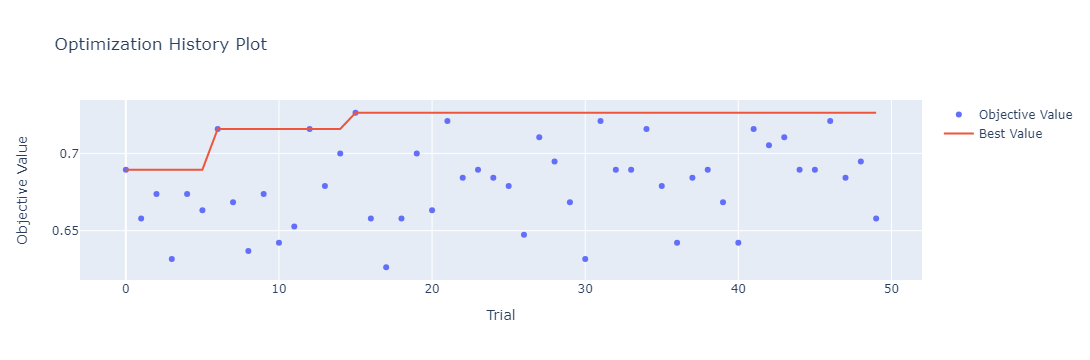

In [222]:
optuna.visualization.plot_optimization_history(study_cat)

In [223]:
# Train the final model using the best hyperparameters
final_model_cat = CatBoostClassifier(**best_params_cat)
final_model_cat.fit(X_train, y_train)

# Evaluate the final model on the validation set
final_preds = final_model_cat.predict(X_val)
final_accuracy = accuracy_score(y_val, final_preds)

print(f'Final Model Accuracy: {final_accuracy}')

0:	learn: 0.6878533	total: 2.41ms	remaining: 1.27s
1:	learn: 0.6833804	total: 4.8ms	remaining: 1.26s
2:	learn: 0.6786558	total: 7.33ms	remaining: 1.28s
3:	learn: 0.6745578	total: 9.77ms	remaining: 1.28s
4:	learn: 0.6705545	total: 12.4ms	remaining: 1.3s
5:	learn: 0.6668105	total: 14.9ms	remaining: 1.3s
6:	learn: 0.6630912	total: 17.2ms	remaining: 1.28s
7:	learn: 0.6598033	total: 19.7ms	remaining: 1.28s
8:	learn: 0.6572928	total: 22.2ms	remaining: 1.28s
9:	learn: 0.6550368	total: 24.9ms	remaining: 1.29s
10:	learn: 0.6526764	total: 27.5ms	remaining: 1.29s
11:	learn: 0.6502167	total: 30.2ms	remaining: 1.3s
12:	learn: 0.6474990	total: 32.4ms	remaining: 1.29s
13:	learn: 0.6451530	total: 35.1ms	remaining: 1.29s
14:	learn: 0.6431390	total: 37.5ms	remaining: 1.28s
15:	learn: 0.6406626	total: 40ms	remaining: 1.28s
16:	learn: 0.6376420	total: 42.6ms	remaining: 1.28s
17:	learn: 0.6360873	total: 44.9ms	remaining: 1.27s
18:	learn: 0.6345162	total: 47.3ms	remaining: 1.27s
19:	learn: 0.6327827	total: 

In [224]:
train_preds_cat = final_model_cat.predict(X_train)
accuracy_score(y_train, train_preds_cat)

0.8271767810026385

In [225]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(CatBoostClassifier(**best_params_cat), X,y, cv= 10, scoring = 'accuracy'))

0:	learn: 0.6892250	total: 2.92ms	remaining: 1.54s
1:	learn: 0.6843309	total: 5.8ms	remaining: 1.53s
2:	learn: 0.6791454	total: 8.9ms	remaining: 1.56s
3:	learn: 0.6747499	total: 11.6ms	remaining: 1.53s
4:	learn: 0.6714056	total: 14.4ms	remaining: 1.51s
5:	learn: 0.6677825	total: 17.3ms	remaining: 1.51s
6:	learn: 0.6641765	total: 20.4ms	remaining: 1.52s
7:	learn: 0.6610702	total: 23.2ms	remaining: 1.51s
8:	learn: 0.6576050	total: 26ms	remaining: 1.5s
9:	learn: 0.6543860	total: 28.6ms	remaining: 1.48s
10:	learn: 0.6510674	total: 31.7ms	remaining: 1.49s
11:	learn: 0.6487857	total: 34.4ms	remaining: 1.48s
12:	learn: 0.6462859	total: 37.1ms	remaining: 1.47s
13:	learn: 0.6438400	total: 39.9ms	remaining: 1.47s
14:	learn: 0.6416404	total: 42.5ms	remaining: 1.46s
15:	learn: 0.6393433	total: 45ms	remaining: 1.44s
16:	learn: 0.6374592	total: 47.9ms	remaining: 1.44s
17:	learn: 0.6353368	total: 50.6ms	remaining: 1.44s
18:	learn: 0.6332072	total: 53.2ms	remaining: 1.43s
19:	learn: 0.6315242	total: 5

0.6645912653975363

In [239]:
r2_test_data['y_pred_01'] = catboost.predict(r2_X_test)

In [260]:
train_data['win_pred_score'] = catboost_best.predict_proba(X)[:,1]
test_data['win_pred_score'] = catboost_best.predict_proba(X_test)[:,1]

In [241]:
r2_test_data['win_pred_score'] = catboost.predict_proba(r2_X_test)[:,1]

In [261]:
train_data['win_pred_score'] = np.where( (train_data['y_pred_01']==0), (1-train_data['win_pred_score']), train_data['win_pred_score'])
test_data['win_pred_score'] = np.where( (test_data['y_pred_01']==0), (1-test_data['win_pred_score']), test_data['win_pred_score'])

In [262]:
train_data['win_pred_team_id'] = np.where( (train_data['y_pred_01']==0), (train_data['team1_id']), train_data['team2_id'])
test_data['win_pred_team_id'] = np.where( (test_data['y_pred_01']==0), (test_data['team1_id']), test_data['team2_id'])

In [242]:
r2_test_data['win_pred_team_id'] = np.where( (r2_test_data['y_pred_01']==0), (r2_test_data['team1_id']), r2_test_data['team2_id'])
r2_test_data['win_pred_score'] = np.where( (r2_test_data['y_pred_01']==0), (1-r2_test_data['win_pred_score']), r2_test_data['win_pred_score'])

In [263]:
X.columns

Index(['ground_avg_runs_last15', 'team_count_135_strike_rate',
       'team_economy_7', 'team_winp_last5_ground',
       'team_avg_win_amount_wicket', 'team_avg_win_amount_runs',
       'team_top5_avg_wickets_last10', 'team_winp_bowling_first',
       'team_avg_boundaries_conceded', 'team_avg_sixes',
       'team_avg_boundaries_per_ball', 'team_avg_wickets_fallen',
       'team_avg_balls_per_wicket', 'team_first3_avg_balls_faced',
       'team_count_30runs_last15'],
      dtype='object')

In [243]:
df_feat_importance = pd.DataFrame({'feat_name':X.columns.tolist(), 'model_feat_imp_train':catboost.feature_importances_}).sort_values(by='model_feat_imp_train', ascending=False)\
                                                                                                                        .reset_index(drop=True).head(30)
df_feat_importance

,feat_name,model_feat_imp_train
0,team_top5_avg_wickets_last10,20.112860
1,team_avg_boundaries_per_ball,12.443200
2,team_count_135_strike_rate,8.749137
3,team_winp_last5_ground,8.544646
4,team_economy_7,8.271931
5,team_first3_avg_balls_faced,7.315530
6,team_winp_bowling_first,6.398081
7,team_avg_balls_per_wicket,5.738477
8,team_count_30runs_last15,4.081136
9,team_avg_boundaries_conceded,4.033790


In [246]:
train_data['dataset_type'] = 'train'
test_data['dataset_type'] = 'r1'
r2_test_data['dataset_type'] = 'r2'

In [266]:
best_params_cat

{'iterations': 529,
 'learning_rate': 0.03759688293948012,
 'depth': 2,
 'subsample': 0.7459843722579319,
 'l2_leaf_reg': 1.937864674406293,
 'random_strength': 0.060166971811574585,
 'early_stopping_rounds': 17}

In [267]:
## refactor

df_file1 = pd.concat([test_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))], \
                     train_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))]])

renaming_dict = {}
for i,col in enumerate(list(df_feat_importance['feat_name'].head(10))):
    renaming_dict[col] = f'indep_feat_id{i+1}'
df_file1.rename(columns=renaming_dict, inplace=True)

for i in range(1,11):
    if f'indep_feat_id{i}' not in df_file1.columns:
        df_file1[f'indep_feat_id{i}'] = np.nan
#{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
df_file1['train_algorithm'] = 'catboost'
df_file1['is_ensemble'] = 'no'
df_file1['train_hps_trees'] = 100
df_file1['train_hps_depth'] = 4
df_file1['train_hps_lr'] = 0.05

In [268]:
df_file1.shape
df_file1.head(10)

,match id,dataset_type,win_pred_team_id,win_pred_score,indep_feat_id1,indep_feat_id2,indep_feat_id3,indep_feat_id4,indep_feat_id5,indep_feat_id6,indep_feat_id7,indep_feat_id8,indep_feat_id9,indep_feat_id10,train_algorithm,is_ensemble,train_hps_trees,train_hps_depth,train_hps_lr
0,9250275,r1,90,0.621700,0.000000,NaN,1.980392,0.333333,1.000000,101.000000,NaN,4.666667,0.000000,0.111111,catboost,no,100,4,0.05
1,9262189,r1,36084,0.611123,0.979592,0.859632,1.000000,0.888889,1.038462,3.884615,0.700300,1.165272,0.880000,0.636364,catboost,no,100,4,0.05
2,9128776,r1,48334,0.598087,0.838235,0.943977,1.000000,0.818182,1.000000,101.000000,1.017041,0.985366,0.931034,1.500000,catboost,no,100,4,0.05
3,9586919,r1,36112,0.689627,1.051282,1.458785,0.673203,0.866667,0.800000,1.000000,0.932718,0.607815,0.451613,1.692308,catboost,no,100,4,0.05
4,9128538,r1,48341,0.570441,0.847458,1.386865,0.009901,1.000000,1.375000,101.000000,0.849465,1.083882,1.037037,8.000000,catboost,no,100,4,0.05
5,9516653,r1,30407,0.746599,7.625000,0.929410,1.000000,10.000000,1.888889,51.000000,1.151664,1.923729,1.000000,0.600000,catboost,no,100,4,0.05
6,9516534,r1,30414,0.637285,0.757143,0.819450,0.257426,1.076923,1.095238,1.000000,0.962454,0.811127,1.000000,1.500000,catboost,no,100,4,0.05
7,9085474,r1,9701,0.705710,2.060606,0.938806,61.000000,1.916667,1.000000,0.504950,0.667976,1.180974,1.047619,0.100000,catboost,no,100,4,0.05
8,9433752,r1,7727,0.749759,1.260870,0.750857,101.000000,1.812500,1.500000,101.000000,0.800976,1.921260,2.000000,7.750000,catboost,no,100,4,0.05
9,9516359,r1,36014,0.823192,0.285714,1.681562,1.000000,0.222222,0.375000,101.000000,1.563786,1.336207,0.375000,1.111111,catboost,no,100,4,0.05


In [258]:
## refactor

df_file3 = r2_test_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))]

#{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
df_file3['train_algorithm'] = 'catboost'
df_file3['is_ensemble'] = 'no'
df_file3['train_hps_trees'] = 100
df_file3['train_hps_depth'] = 4
df_file3['train_hps_lr'] = 0.05


C:\Users\ayush\AppData\Local\Temp\ipykernel_5456\3844600419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_file3['train_algorithm'] = 'catboost'
C:\Users\ayush\AppData\Local\Temp\ipykernel_5456\3844600419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_file3['is_ensemble'] = 'no'
C:\Users\ayush\AppData\Local\Temp\ipykernel_5456\3844600419.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [259]:
renaming_dict = {}
for i,col in enumerate(list(df_feat_importance['feat_name'].head(10))):
    renaming_dict[col] = f'indep_feat_id{i+1}'
df_file3.rename(columns=renaming_dict, inplace=True)

for i in range(1,11):
    if f'indep_feat_id{i}' not in df_file3.columns:
        df_file3[f'indep_feat_id{i}'] = np.nan

C:\Users\ayush\AppData\Local\Temp\ipykernel_5456\745552752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_file3.rename(columns=renaming_dict, inplace=True)


In [261]:
df_file3.shape

(207, 19)

File 2

In [272]:
feature_desc = {'team_count_50runs_last15':'Ratio of number of 50s by players in team1 to number of 50s by players in team2 in last 15 games',\
               'team_winp_last5':'Ratio of team1\'s win % to team2\'s win % in last 5 games',\
               'ground_avg_runs_last15':'average runs scored in the ground in last 15 games',\
               'team1_winp_team2_last15':'Team1\'s win percentage against Team2 in last 15 games',\
               'team1only_avg_runs_last15':'team1\'s avg inning runs in last 15 games',\
                'team2only_avg_runs_last15':'team2\'s avg inning runs in last 15 games',\
               'team_economy_7':'Ratio of number of bowlers with <7.5 economy in the last 10 games in team 1 to that in team 2',\
               'team_count_135_strike_rate':'Ratio of number of players with strike rate >135 and min 10 ball faced in last 10 games in team 1 to that in team 2',\
               'team_winp_last5_ground':'Ratio of win percentage of team 1 in last 5 games in a ground to win percentage of team 2 in last 5 games in that ground',\
               'team_avg_win_amount_wicket':'Ratio of average win amount by wickets in last 10 games by team 1 to that by team 2',\
                'team_avg_win_amount_runs':'Ratio of average win amount by runs in last 10 games by team 1 to that by team 2',\
                'toss_winner_01' : 'Toss winner to numerical - 1 if team2 wins, else 0',\
                'toss_decision_01' : 'Toss decision - categorical - 1 if winner bats, 0 otherwise',\
                'team_top5_avg_wickets_last10':'Ratio of sum of wickets taken by top 5 bowlers in last n games of team 1 to that of team 2',\
                'team_avg_boundaries':'Ratio of average no. of boundaries hit in last n games by players of team1 to that of team2',\
                'team_winp_batting_first': 'Ratio of percentage of wins while batting first of team1 to that of team2',\
                'team_winp_bowling_first': 'Ratio of percentage of wins while bowling first of team1 to that of team2',\
                'team_dot_balls_last10' : 'Ratio of average no. of dot balls bowled in last 10 games by bowlers of team1 to that of team2',\
                'team_first4_avg_balls_faced':'Ratio of average number of balls faced by first 4 batsman in last 10 games of team 1 to that of team2',\
                'team_avg_boundaries_conceded':'Ratio of average number of boundaries conceded in last 10 games by bowlers of team1 to that of team 2',\
                'team2only_avg_wickets_last15': 'average wickets taken by team 2 in last 15 games',\
                'team_avg_balls_per_wicket': 'Ratio of average number of balls taken to take a wicket in last 10 games by team 1 to that by team 2',\
                'team_avg_boundaries_per_ball':'Ratio of average no. of balls taken to hit a boundary in last 10 games by team1 to that by team2 ',\
                'team_count_30runs_last15':'Ratio of number of 30s by players in team1 to number of 30s by players in team2 in last 15 games',\
                'team_avg_sixes':'Ratio of average no. of sixes hit in last 10 games by team 1 to that by team2',\
                'team_avg_wickets_fallen':'Ratio of average number of wickets fallen per inning in the last 15 games of team1 to that of team2',\
                'team_first3_avg_balls_faced':'Ratio of number of balls faced by top 3 batsmen of team 1 in last 15 games to that of team 2',\
               'team1only_avg_wickets_last15': 'average wickets taken by team 1 in last 15 games'}

In [273]:
# df_feat_importance.rename(index={0:'feat_id'}, inplace=True)
df_file2 = df_feat_importance
df_file2['feat_id'] = [i+1 for i in df_file2.index]
df_file2['feat_rank_train'] = [i+1 for i in df_file2.index]
df_file2 = df_file2.set_index('feat_id')
df_file2['feat_description'] = df_file2['feat_name'].map(feature_desc)

In [274]:
df_file2

,feat_name,model_feat_imp_train,feat_rank_train,feat_description
feat_id,,,,
1,team_top5_avg_wickets_last10,18.173672,1,Ratio of sum of wickets taken by top 5 bowlers...
2,team_avg_boundaries_per_ball,11.351357,2,Ratio of average no. of balls taken to hit a b...
3,team_winp_last5_ground,9.774851,3,Ratio of win percentage of team 1 in last 5 ga...
4,team_economy_7,8.929907,4,Ratio of number of bowlers with <7.5 economy i...
5,team_count_135_strike_rate,8.464793,5,Ratio of number of players with strike rate >1...
6,team_winp_bowling_first,7.412918,6,Ratio of percentage of wins while bowling firs...
7,team_avg_balls_per_wicket,7.408781,7,Ratio of average number of balls taken to take...
8,team_first3_avg_balls_faced,7.133233,8,Ratio of number of balls faced by top 3 batsme...
9,team_count_30runs_last15,4.214116,9,Ratio of number of 30s by players in team1 to ...


In [264]:
df_file3.to_csv('Round2_sub.csv', index=False)